In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as plt
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

%matplotlib inline

# Data inspection

In [2]:
def read_train():
    return pd.read_csv("x_train.csv"), pd.read_csv("y_train.csv")

In [3]:
def read_test():
    return pd.read_csv("x_test.csv")

In [4]:
def read_merged():
    train = pd.read_csv("x_train.csv")
    test = pd.read_csv("x_test.csv")
    return pd.concat([train, test], axis=0).reset_index()

In [5]:
x_merged = read_merged()

In [6]:
x_train, y_train = read_train()

In [7]:
x_test = read_test()

In [8]:
def get_interesting_feature_names(x):
    return x.columns[:73]

In [9]:
def get_categorical_features_mask(x):
#     print x.dtypes
    return  np.logical_and(
                x.dtypes != np.int64,
                x.dtypes != np.float64
            )

In [10]:
list(x_merged.columns)

['index',
 'm',
 'k',
 'n',
 'cacheL1IsShared',
 'cacheL1Size',
 'cacheL2IsShared',
 'cacheL2Size',
 'cacheL3IsShared',
 'cacheL3Size',
 'cacheL1Threads',
 'cacheL2Threads',
 'cacheL3Threads',
 'winPerfIndex',
 'memFreq',
 'memChanels',
 'memSize_MB',
 'memType',
 'memtRFC',
 'memtCL',
 'memtRCD',
 'memtRP',
 'memtRAS',
 'os',
 'cpuFull',
 'cpuArch',
 'cpuCores',
 'cpuFreq',
 'cpuBusFreq',
 'cpuTurbo',
 'cpuHT',
 'cpuCount',
 'cpuIsMobile',
 'IA.64_Technology',
 'AVX',
 'FPU128',
 'SSE5',
 'SSE4a',
 'SSE4.2',
 'SSE4.1',
 'S.SSE3',
 'SSE3',
 'SSE2',
 'SSE',
 'AES',
 'Extended_3DNow_Technology',
 'X3DNow_Technology',
 'X3DNOW_Prefetch',
 'X3DNow_Pro_Technology',
 'AMD_MMX_Technology',
 'MMX_Technology',
 'Cyrix_MMX_Technology',
 'FMA',
 'FMA4',
 'OSXSAVE',
 'XSAVE',
 'XOP',
 'F16C',
 'RDRAND',
 'FXSR.FXSAVE.FXRSTOR',
 'MOVBE',
 'PCLMULQDQ',
 'CLF_._Cache_Line_Flush',
 'CX8_._CMPXCHG8B',
 'CX16_._CMPXCHG16B',
 'CMOV_._Conditionnal_Move_Inst.',
 'MON_._Monitor.Mwait',
 'POPCNT',
 'RDTSCP',

In [11]:
get_interesting_feature_names(x_merged)

Index([u'index', u'm', u'k', u'n', u'cacheL1IsShared', u'cacheL1Size',
       u'cacheL2IsShared', u'cacheL2Size', u'cacheL3IsShared', u'cacheL3Size',
       u'cacheL1Threads', u'cacheL2Threads', u'cacheL3Threads',
       u'winPerfIndex', u'memFreq', u'memChanels', u'memSize_MB', u'memType',
       u'memtRFC', u'memtCL', u'memtRCD', u'memtRP', u'memtRAS', u'os',
       u'cpuFull', u'cpuArch', u'cpuCores', u'cpuFreq', u'cpuBusFreq',
       u'cpuTurbo', u'cpuHT', u'cpuCount', u'cpuIsMobile', u'IA.64_Technology',
       u'AVX', u'FPU128', u'SSE5', u'SSE4a', u'SSE4.2', u'SSE4.1', u'S.SSE3',
       u'SSE3', u'SSE2', u'SSE', u'AES', u'Extended_3DNow_Technology',
       u'X3DNow_Technology', u'X3DNOW_Prefetch', u'X3DNow_Pro_Technology',
       u'AMD_MMX_Technology', u'MMX_Technology', u'Cyrix_MMX_Technology',
       u'FMA', u'FMA4', u'OSXSAVE', u'XSAVE', u'XOP', u'F16C', u'RDRAND',
       u'FXSR.FXSAVE.FXRSTOR', u'MOVBE', u'PCLMULQDQ',
       u'CLF_._Cache_Line_Flush', u'CX8_._CMPXCHG8B', u'CX

In [12]:
def plot_mnk_stat(x):
    sb.distplot(x_train["m"])
    sb.distplot(x_train["k"])
    sb.distplot(x_train["n"])
    

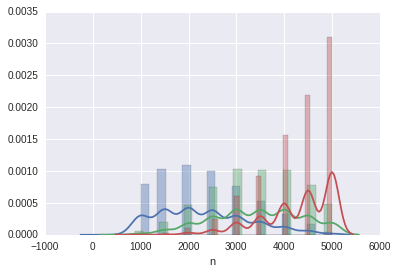

In [13]:
plot_mnk_stat(x_merged)

In [14]:
def get_stat(x):
    tmp = x[get_interesting_feature_names(x)]
    print tmp.min(axis=0) 
    print 
    print
    print tmp.max(axis=0)
    
    print tmp.max(axis=0) == tmp.min(axis=0)

In [15]:
def get_const_feature_list(x):
    return x.max(axis=0) == x.min(axis=0)

In [16]:
get_const_feature_list(x_merged).nonzero()

(array([ 8, 33, 37, 42, 43, 48, 50, 59, 62, 63, 65, 69, 70, 71]),)

In [17]:
def get_const_feature_names(x):
    return x.columns[x.max(axis=0) == x.min(axis=0)]

In [18]:
get_const_feature_names(x_merged)

Index([u'cacheL3IsShared', u'IA.64_Technology', u'SSE4a', u'SSE2', u'SSE',
       u'X3DNow_Pro_Technology', u'MMX_Technology', u'FXSR.FXSAVE.FXRSTOR',
       u'CLF_._Cache_Line_Flush', u'CX8_._CMPXCHG8B',
       u'CMOV_._Conditionnal_Move_Inst.', u'SEP_._Fast_System_Call', u'TBM',
       u'BMI'],
      dtype='object')

In [19]:
y_train.min(), y_train.max()

(time    1.000083
 dtype: float64, time    547.859176
 dtype: float64)

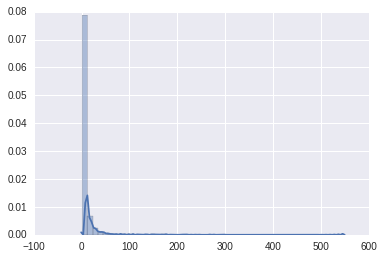

In [20]:
sb.distplot(y_train)

In [21]:
def plot_lapses(y, lapse):
    sb.distplot(y[y.values < lapse])

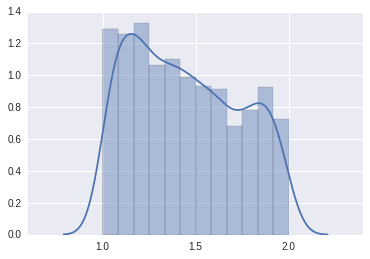

In [22]:
plot_lapses(y_train, 2)

In [215]:
def plot_ratio(x_train, y_train, color='b'):
    prod = x_train["m"]* x_train["n"]* x_train["k"]
    plt.scatter( prod, y_train, c=color)
    

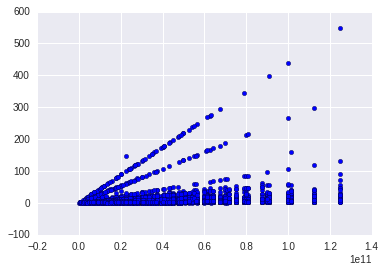

In [216]:
plot_ratio(x_train, y_train)

In [226]:
def plot_ratio_constrained(x_train, y_train, limit, color='b'):
    prod = x_train["m"]* x_train["n"]* x_train["k"]/1e6
    new_df = pd.concat([prod, y_train], axis=1)
    new_df = new_df[new_df[0] < limit]
#     new_df = new_df[new_df["prod"]]
#     
    plt.scatter(new_df[0], new_df["time"], c=color)

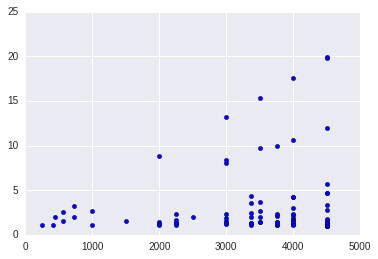

In [227]:
plot_ratio_constrained(x_train, y_train, limit=5000)

In [217]:
def plot_ratio_equals(x_train, y_train, limit, color='b'):
    prod = x_train["m"]* x_train["n"]* x_train["k"]/1e6
    new_df = pd.concat([prod, y_train, x_train], axis=1)
    new_df = new_df[new_df[0] == limit]
#     print new_df
    plt.scatter(new_df[0], new_df["time"], c=color)

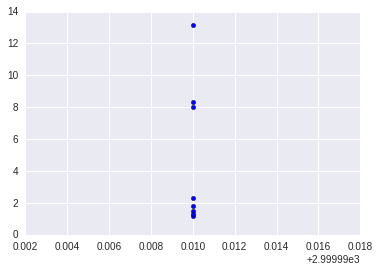

In [218]:
plot_ratio_equals(x_train, y_train, limit=3000)

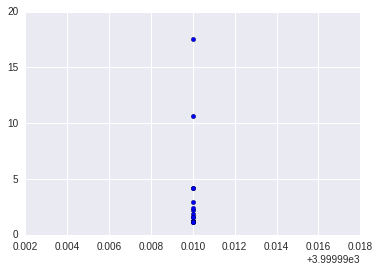

In [29]:
plot_ratio_equals(x_train, y_train, limit=4000)

# Data transformation & clusterization

In [294]:
from sklearn.cluster import MiniBatchKMeans, KMeans, Birch, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, maxabs_scale, StandardScaler, FunctionTransformer
from sklearn.feature_extraction import DictVectorizer

In [31]:
# def encode_onehot(df, cols):
#     """
#     One-hot encoding is applied to columns specified in a pandas DataFrame.
    
#     Modified from: https://gist.github.com/kljensen/5452382
    
#     Details:
    
#     http://en.wikipedia.org/wiki/One-hot
#     http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
    
#     @param df pandas DataFrame
#     @param cols a list of columns to encode
#     @return a DataFrame with one-hot encoding
#     """
#     vec = DictVectorizer()
    
#     vec_data = pd.DataFrame(vec.fit_transform(df.loc[:, cols].to_dict(outtype='records')).toarray())
#     vec_data.columns = vec.get_feature_names()
#     vec_data.index = df.index
    
#     df = df.drop(cols, axis=1)
#     df = df.join(vec_data)
#     return df

In [32]:
def add_features(x):
    x = x.copy()
    x = x["m"]* x["n"]* x["k"]/1e6

In [33]:
def encode_features(x, features_to_encode):
#     return encode_onehot(x, features_to_encode)
    x_old = x
    x = x.copy()
#     print x.loc[:, features_to_encode].shape, 
    encoder = LabelEncoder()
    x.loc[:, features_to_encode] = x.loc[:, features_to_encode].apply(encoder.fit_transform)
#     x = pd.DataFrame(x, columns=x_old.columns)
#     ohe = OneHotEncoder(sparse=False, categorical_features=features_to_encode)
#     x = ohe.fit_transform(x)
    return x, encoder

In [34]:
def use_encoder(x, encoder, features_to_encode):
    x_old = x
    x = x.copy() 
#     encoder = LabelEncoder()
    x.loc[:, features_to_encode] = x.loc[:, features_to_encode].apply(encoder.fit_transform)
    return x

In [35]:
def train_transformer(x_merged):
    
#     print x_merged.columns
    x_merged = x_merged.copy()
    
#     x_merged["mnk"] = x_merged["m"] * x_merged["n"] * x_merged["k"]
    
    scaler = StandardScaler()
    ohe = OneHotEncoder(categorical_features=get_categorical_features_mask(x_merged), sparse=False)
#     x_merged =  ohe.fit_transform(x_merged.copy().loc[:, get_interesting_feature_names(x_merged)].drop(["n", "m", "k"], axis=1))
    x_merged = ohe.fit_transform(x_merged.drop(["index", "m", "n", "k"], axis=1))
#     print x_merged.loc[:,get_categorical_features_mask(x_merged)].shape # = ohe.fit_transform(x_merged)
#     print x_merged.shape
#     print x_merged
    scaler.fit_transform(x_merged)
#     print x_merged.shape
        
    
    
    return FunctionTransformer(lambda x: scaler.transform(ohe.transform(x.copy())))
    

In [288]:
x_tmp, encoder = encode_features(x_train, get_categorical_features_mask(x_merged))

In [289]:
transformer = train_transformer(use_encoder(x_merged, encoder, get_categorical_features_mask(x_merged)))

In [290]:
# transformer.transform(use_encoder(x_merged, encoder, get_categorical_features_mask(x_merged)))

In [303]:
def train_clusterer(x, Cl, features, transformer):
    x_old = x
    x = x.copy()
#     clusterer = Cl(n_clusters=n_clusters)
    clusterer = sklearn.base.clone(Cl)
#     x = x.loc[:, features].drop(["n", "m", "k"], axis=1)
#     x = maxabs_scale(x)
#     print x.drop(["n", "m", "k"], axis=1).shape
#     x = transformer.transform(x.drop(["n", "m", "k"], axis=1))#.loc[:, features]
    x = x[features].drop(["n", "m", "k"], axis=1)
#     clusterer.fit(x)
#     x_old["clust"] = clusterer.predict(x)
    x_old["clust"] = clusterer.fit_predict(x)
    return x_old, clusterer

In [344]:
def use_clusterer(x, clusterer, features, transformer):
    x_old = x
    x = x.copy()
#     x = x.loc[:, features].drop(["n", "m", "k"], axis=1)
#     x = maxabs_scale(x)
#     x = transformer.transform(x)
#     print x.shape
#     x = transformer.transform(x.drop(["n", "m", "k"], axis=1))#.loc[:, features]
    x = x[features].drop(["n", "m", "k"], axis=1)
#     x = OneHotEncoder(categorical_features=get_categorical_features_mask(x_merged), sparse=False).fit_transform(x)
    x_old["clust"] = clusterer.predict(x)
    return x_old

In [345]:
# def my_hamming(x1):
# #     print x1.shape
#     return np.count_nonzero(x1 == x2) * 1.0/x1.shape[1]

In [346]:
x_tmp, clusterer = train_clusterer(x_tmp, Birch(n_clusters=100), get_interesting_feature_names(x_tmp), transformer)

(4993, 949)


In [347]:
def plot_ratio_constrained_clustered(x_train, y_train, limit, n_clusters):
    
    def get_color(x):
        return ['b','r','green', 'grey', 'black', 'yellow', 'pink', 'brown'][x % 8]
    
    def get_cmap(N):
        '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
        RGB color.'''
        color_norm  = colors.Normalize(vmin=0, vmax=N-1)
        scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
        def map_index_to_rgb_color(index):
            return scalar_map.to_rgba(index)
        return map_index_to_rgb_color
    
    get_color = get_cmap(n_clusters)
    prod = x_train["m"]* x_train["n"]* x_train["k"]/1e6
    new_df = pd.concat([prod, y_train, x_train], axis=1)
    new_df = new_df[new_df[0] < limit]
    
#     for i in range(n_clusters):
#         print get_color(i)

#     print 
#     print new_df.loc[:, ["time", "clust"] + list(get_interesting_feature_names(x_train))]
    plt.scatter(new_df[0], new_df["time"], c = new_df["clust"].apply(get_color))

In [348]:
x_tmp.groupby(["clust"]).size()

clust
0     36
1     69
2     46
3     44
4     51
5     27
6     42
7     40
8     44
9     75
10    30
11    56
12    51
13    27
14    48
15    66
16    70
17    56
18    21
19    37
20    70
21    58
22    54
23    50
24    39
25    45
26    56
27    69
28    54
29    57
      ..
61    80
62    73
63    61
64    65
65    81
66    82
67    72
68    85
69    77
70    68
71    94
72    79
73    75
74    39
75    31
76    28
77    35
78    45
79    11
80    21
81    31
82    26
83    30
84    40
85    19
86    68
87    32
88    24
89    29
90    42
dtype: int64

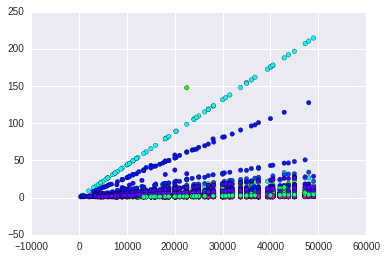

In [349]:
plot_ratio_constrained_clustered(x_tmp, y_train, 50000, clusterer.n_clusters)

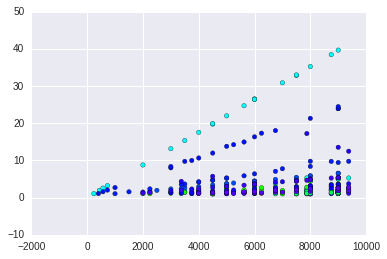

In [330]:
plot_ratio_constrained_clustered(x_tmp, y_train, 10000, clusterer.n_clusters)

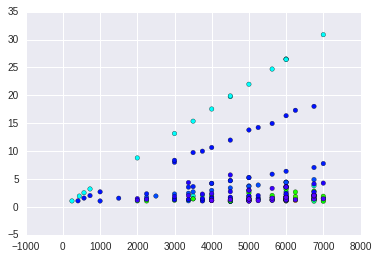

In [331]:
plot_ratio_constrained_clustered(x_tmp, y_train, 7500, clusterer.n_clusters)

In [71]:
def plot_ratio_equals_clustered(x_train, y_train, limit, n_clusters):
    
    def get_color(x):
        return ['b','r','green', 'grey', 'black', 'yellow', 'pink', 'brown'][x % 8]
    
    def get_cmap(N):
        '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
        RGB color.'''
        color_norm  = colors.Normalize(vmin=0, vmax=N-1)
        scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
        def map_index_to_rgb_color(index):
            return scalar_map.to_rgba(index)
        return map_index_to_rgb_color
    
    get_color = get_cmap(n_clusters)
    prod = x_train["m"]* x_train["n"]* x_train["k"]/1e6
    new_df = pd.concat([prod, y_train, x_train], axis=1)
    new_df = new_df[new_df[0] == limit]

#     print new_df.shape
    print new_df.loc[:, ["time", "clust"] + list(get_interesting_feature_names(x_train))]
    plt.scatter(new_df[0], new_df["time"], c = new_df["clust"].apply(get_color))

           time  clust     m     k     n  cacheL1IsShared  cacheL1Size  \
57     1.636818      1  1000  1500  5000                0           32   
60     1.624472      1  1000  2500  3000                0           32   
77     1.585416      1  1500  2000  2500                0           32   
200    1.209075     16  1000  1500  5000                0           32   
717    5.261882     50  1000  2500  3000                0           16   
966   32.845096     37  1000  2500  3000                1           24   
981   32.976764     37  1500  2000  2500                1           24   
1280   1.356440      4  1000  2500  3000                0           64   
1293   1.390967      4  1500  2000  2500                0           64   
1693   1.007187     16  1500  2000  2500                0           32   
1810   1.503334     51  1000  2500  3000                1           16   
1818   1.412808     51  1500  2000  2500                1           16   
2258   2.023025      7  1000  2500  30

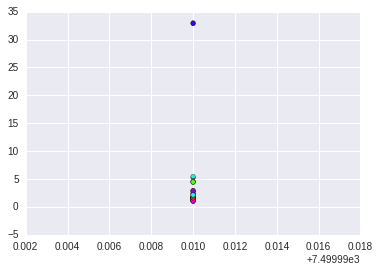

In [72]:
plot_ratio_equals_clustered(x_tmp, y_train, 7500, 53)

In [73]:
def plot_ratio_mnk_clustered(x_train, y_train, m, k, n, n_clusters):
    
    def get_color(x):
        return ['b','r','green', 'grey', 'black', 'yellow', 'pink', 'brown'][x % 8]
    
    def get_cmap(N):
        '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
        RGB color.'''
        color_norm  = colors.Normalize(vmin=0, vmax=N-1)
        scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
        def map_index_to_rgb_color(index):
            return scalar_map.to_rgba(index)
        return map_index_to_rgb_color
    
    get_color = get_cmap(n_clusters)
    prod = x_train["m"]* x_train["n"]* x_train["k"]/1e6
    new_df = pd.concat([prod, y_train, x_train], axis=1)
#     new_df = new_df[new_df[0] < limit]
    mask = new_df["m"] == m
    mask = np.logical_and(mask, new_df["n"] == n)
    mask = np.logical_and(mask, new_df["k"] == k)
#     print mask
    new_df = new_df[mask]

#     print 
    print new_df.loc[:, ["time", "clust"] + list(get_interesting_feature_names(x_train))]
    plt.scatter(new_df[0], new_df["time"], c = new_df["clust"].apply(get_color))

          time  clust     m     k     n  cacheL1IsShared  cacheL1Size  \
57    1.636818      1  1000  1500  5000                0           32   
200   1.209075     16  1000  1500  5000                0           32   
2505  1.731708     21  1000  1500  5000                0           32   
2627  1.633017      1  1000  1500  5000                0           32   
2759  1.712377     52  1000  1500  5000                0           32   
3038  2.493699      2  1000  1500  5000                0           64   
3188  1.026403     28  1000  1500  5000                0           32   
3443  2.874029      4  1000  1500  5000                0           64   
3779  2.892600     40  1000  1500  5000                1            8   
4506  1.085806     44  1000  1500  5000                0           16   
4685  4.417833     15  1000  1500  5000                1            8   

      cacheL2IsShared  cacheL2Size  cacheL3IsShared  ...    CX16_._CMPXCHG16B  \
57                  1         2048        

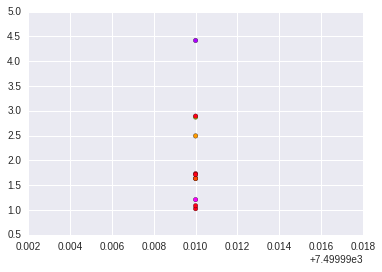

In [74]:
plot_ratio_mnk_clustered(x_tmp, y_train, 1000, 1500, 5000, 20)

           time  clust     m     k     n  cacheL1IsShared  cacheL1Size  \
60     1.624472      1  1000  2500  3000                0           32   
717    5.261882     50  1000  2500  3000                0           16   
966   32.845096     37  1000  2500  3000                1           24   
1280   1.356440      4  1000  2500  3000                0           64   
1810   1.503334     51  1000  2500  3000                1           16   
2258   2.023025      7  1000  2500  3000                0           32   
2842   2.223479      7  1000  2500  3000                0           32   
2966   1.774903      2  1000  2500  3000                0           64   
3042   2.349506      2  1000  2500  3000                0           64   
3554   1.109721     30  1000  2500  3000                0           32   
4001   4.587650     15  1000  2500  3000                1            8   
4410   1.341634     21  1000  2500  3000                0           32   
4690   4.490613     15  1000  2500  30

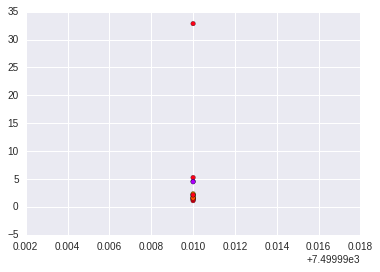

In [75]:
plot_ratio_mnk_clustered(x_tmp, y_train, 1000,  2500,  3000, 20)

           time  clust     m     k     n  cacheL1IsShared  cacheL1Size  \
61     2.184079      1  1000  2500  4000                0           32   
91     2.107623      1  2000  2000  2500                0           32   
203    1.304339     16  1000  2000  5000                0           32   
374    1.051775     45  2000  2000  2500                0           32   
589    1.452466     28  1000  2000  5000                0           32   
591    1.341139     28  1000  2500  4000                0           32   
718    5.642251     50  1000  2500  4000                0           16   
744    6.282407     50  2000  2000  2500                0           16   
874    1.225547     32  1000  2000  5000                0           32   
875    1.215246     32  1000  2500  4000                0           32   
900    1.200075     32  2000  2000  2500                0           32   
965   43.868561     37  1000  2000  5000                1           24   
1278   1.790105      4  1000  2000  50

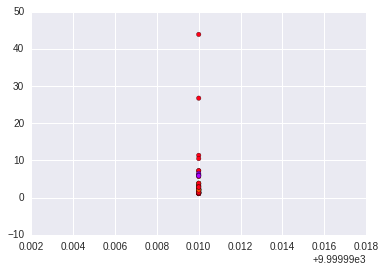

In [76]:
plot_ratio_equals_clustered(x_tmp, y_train, 10000, 20)

           time  clust     m     k     n  cacheL1IsShared  cacheL1Size  \
203    1.304339     16  1000  2000  5000                0           32   
589    1.452466     28  1000  2000  5000                0           32   
874    1.225547     32  1000  2000  5000                0           32   
965   43.868561     37  1000  2000  5000                1           24   
1278   1.790105      4  1000  2000  5000                0           64   
1616   1.738683     16  1000  2000  5000                0           32   
1808   1.968811     51  1000  2000  5000                1           16   
2257   2.225563      7  1000  2000  5000                0           32   
2509   2.379469     21  1000  2000  5000                0           32   
2763   2.223037     52  1000  2000  5000                0           32   
2965   2.365873      2  1000  2000  5000                0           64   
3041   2.844820      2  1000  2000  5000                0           64   
3127   7.226164     25  1000  2000  50

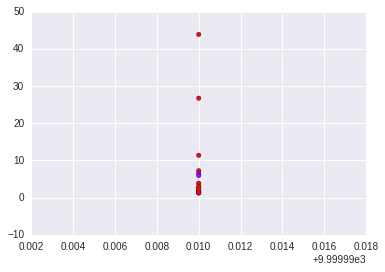

In [77]:
plot_ratio_mnk_clustered(x_tmp, y_train, 1000,  2000,  5000, 20)

In [1206]:
# x_tmp.loc[[4000, 4689]]

In [1207]:
# x_tmp.loc[4000] == x_tmp.loc[4689]

In [1208]:
# x_tmp.groupby(["cpuFreq"]).size()

In [1209]:
# x_tmp.loc[[4000, 4689], np.logical_not(x_tmp.loc[4000] == x_tmp.loc[4689])]

### So let us try an another strategy of clustering, considering features of CPU

In [1210]:
# clusterer_all = train_clusterer(x_tmp, Birch, 53, x_tmp.columns, transformer)

In [1211]:
# x_tmp.groupby(["clust"]).size()

In [1212]:
# plot_ratio_constrained_clustered(x_tmp, y_train, 50000, 53)

In [1213]:
# plot_ratio_constrained_clustered(x_tmp, y_train, 7500, 53)

In [1214]:
# plot_ratio_constrained_clustered(x_tmp, y_train, 5000, 53)

It was a stupid idea, reverting back.

In [1215]:
# x_two_beams = x_tmp[x_tmp["clust"] == 10]

In [1216]:
# x_two_beams

In [1217]:
# x_two_beams.drop(["m", "n", "k"], axis=1).drop_duplicates()

In [337]:
def print_real_clusters(x, n_clusters):
    for i in range(n_clusters):
        cur = x[x["clust"] == i]
        print i, ": ", len(cur), " --> ", len(cur.drop(["m", "n", "k"], axis=1).drop_duplicates())
#         print cur.drop(["m", "n", "k"], axis=1).drop_duplicates()
#         print "===="
        

In [1218]:
# print_real_clusters(x_tmp, clusterer.n_clusters)

# Now it's time to fit my first model

We've chosen to cluster things to 53 clusters and fit a linear regression for each.

In [2032]:
from sklearn.linear_model import  LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

from sklearn.preprocessing import MinMaxScaler

In [2033]:
good_items=y_train.index

In [1996]:
def prepend(to, what):
    what = what.reshape((what.shape[0], 1))
    return np.append(what, to, axis=1)

class SetMaker:
    ess_features = ["kmn", "kmn2", "mk"]
    def add_features(self, x):
        x["kmn"] = x["m"]* x["n"]* x["k"]/1e6
        x["kmn2"] = x["kmn"] * x["kmn"]
        x["mk"] = x["k"]* x["m"]
        x["kn"] = x["k"]* x["n"]
        
        return x
        
    
    def make(self, x_train, x_test, clusterer, encoder):
        x_train = x_train.copy()
        x_test = x_test.copy()
        
        x_train = self.add_features(x_train)
        x_test = self.add_features(x_test)
        
        self.kmn_scaler = MinMaxScaler().fit(x_train[self.ess_features].append(x_test[self.ess_features]))
        
        x_train[self.ess_features] = self.kmn_scaler.transform(x_train[self.ess_features])
        x_test[self.ess_features] = self.kmn_scaler.transform(x_test[self.ess_features])
        
        train_res = self.make_set(x_train, clusterer, encoder)
        test_res = self.make_set(x_test, clusterer, encoder)
        
        return train_res, test_res
        
        
    def make_set(self, x, clusterer, encoder):
        x = x.copy()
        x = use_encoder(x, encoder, get_categorical_features_mask(x))
        x_transformed = x.drop(["k", "m", "n"], axis=1)
        x_clust = use_clusterer(x, clusterer, get_interesting_feature_names(x), transformer)["clust"]
#         x_kmn = x["kmn"].values
        for feature in reversed(self.ess_features):
            cur_feat_vals = x[feature].values
            x_transformed = prepend(x_transformed, cur_feat_vals)
        x_transformed = prepend(x_transformed, x_clust)

        return x_transformed

In [2036]:
maker = SetMaker()

In [2037]:
x_prep_train, x_prep_test = maker.make(x_train.iloc[good_items], x_test, clusterer, encoder)
y_prep_train = y_train.iloc[good_items]
y_prep_train = y_prep_train.values

In [2038]:
x_prep_validate, _ = maker.make(x_train, x_test, clusterer, encoder)
y_prep_validate = y_train
y_prep_validate = y_prep_validate.values

In [2039]:
# x_prep_train[:3, :3]
# y_prep_train.shape

In [2001]:
# x_prep_train = make_set(x_train, clusterer, encoder, transformer)

In [2002]:
# x_prep_train.drop([3457, 3504], axis=0)


In [2003]:
# x_prep[:, [0, 1]]

In [2004]:
# x_prep_test = make_set(x_test, clusterer, encoder, transformer)

In [2005]:
class MyClassifier:
    def __init__(self, n_clusters, base_estimator, n_features):
        self.n_clusters = n_clusters
        self.base_estimator = base_estimator
        self.n_features = n_features
        
    def fit(self, x, y):
        self.estimators = []
        for i in range(self.n_clusters):
#             print "Lololo"
            cur_est = sklearn.base.clone(self.base_estimator)
# #             print x[0] == i
            cur_idx = x[:, 0] == i
            cur_x = x[cur_idx]
            cur_x = cur_x[:, 1:self.n_features + 1]
#             print cur_x.shape
            cur_y = y[cur_idx].ravel()
#             print cur_y.shape
            if cur_x.shape[0] == 0:
                continue
            cur_est.fit(cur_x, cur_y)
            self.estimators.append(cur_est)
#             break
        
        return self
    
    def predict(self, x):
        prediction = []
        
        for row in x:
#             print int(row[0])
            cur_est = self.estimators[int(row[0])]
#             cur_x = x.drop(range(n_to_drop), axis=1)
            cur_x = row[1:self.n_features + 1].reshape(-1, self.n_features)
#             print cur_x.shape
            prediction.append(cur_est.predict(cur_x))
            
        return np.concatenate(prediction).reshape(-1, 1)
    
    def clone(self):
        return MyClassifier(self.n_clusters, self.base_estimator, self.n_features)
            
            

In [2040]:
cls = MyClassifier(clusterer.n_clusters,  LinearRegression(), 1)

In [2041]:
cls.fit(x_prep_train, y_prep_train)

<__main__.MyClassifier instance at 0x7fce8bdde440>

In [2042]:
pred = cls.predict(x_prep_validate)

In [2043]:
mape(pred, y_prep_validate)

0.066648573203138398

In [2044]:
def mape(y_pred, y_true):
    return np.mean(np.abs(y_pred - y_true)/y_true)

In [2045]:
def prediction_plot(x_tmp, y_pred, y_true, lim, n_clusters):
    plot_ratio_constrained_clustered(x_tmp, pd.DataFrame(y_pred, columns=["time"]), lim, n_clusters)
    plot_ratio_constrained_clustered(x_tmp, y_true, lim, n_clusters)
    plt.show()
    
    plot_ratio_constrained_clustered(x_tmp, pd.DataFrame(y_pred, columns=["time"]), lim, n_clusters)
    plt.show()
    plot_ratio_constrained_clustered(x_tmp, y_true, lim, n_clusters)
    plt.show()
    
    plot_ratio_constrained(x_tmp, pd.DataFrame(y_pred, columns=["time"]),lim, color='b')
    plot_ratio_constrained(x_tmp, y_train, lim, color='r')
    
    plt.show()
    

In [2046]:
# prediction_plot(x_tmp, pred, y_train, 500000, clusterer.n_clusters)

In [2047]:
# prediction_plot(x_tmp, pred, y_train, 7500, 53)

In [2048]:
# cross_val_score(MyClassifier(53,  LinearRegression(), 0), x_prep_train, y_train.values, lambda est, x, y: mape(est.predict(x), y))

In [2049]:
def cross_validation(base_estimator, x, y, n_folds=3):
    scores = []
    for train_idx, test_idx in KFold(len(x), n_folds=n_folds, shuffle=True):
        cur_est = base_estimator.clone()
        cur_est.fit(x[train_idx], y[train_idx])
        y_pred = cur_est.predict(x[test_idx])
        scores.append(mape(y_pred, y[test_idx]))
    
    return scores

In [2050]:
cross_validation(MyClassifier(clusterer.n_clusters,  LinearRegression(), 1), x_prep_train, y_prep_train, n_folds=5)

[0.068398923465693803,
 0.061249065848235092,
 0.066993670938853556,
 0.066305721572050474,
 0.068953644517899856]

In [2063]:
result = cls.predict(x_prep_test)

In [2064]:
# result[result <= 0.0]

In [2065]:
np.savetxt("result.txt", result)

In [1762]:
# result[result > 100.0]

In [1763]:
# xx["time"] = pred

In [1764]:
# def get_bad_cluster():
#     return xx[np.logical_and(xx["time"] <= 0.0,  xx["m"] * xx["n"] * xx["k"] <= 4 * 10**9)]["clust"]

In [1765]:
# get_bad_cluster()

In [1766]:
# def get_cluster(x_tmp, clust):
#     bad_df = x_tmp[x_tmp["clust"] == clust].drop(["m", "n", "k"], axis=1).drop_duplicates()
#     bad_df.reset_index().drop(["index"], axis=1)
#     return bad_df

In [1767]:
# bad_df = get_cluster(x_tmp, 37)

In [1768]:
# np.count_nonzero(bad_df.iloc[0] != bad_df.iloc[1])

In [1769]:
# y_train[xx["time"] <= 0.0]

In [1770]:
# pred[xx["time"] <= 0.0].min()

In [1771]:
# x_tmp[pred <= 0]["clust"]

In [1772]:
# y_train[y_train[x_tmp["clust"] == 32]["time"] > 100

In [1773]:
# len(y_train[x_tmp["clust"] == 9]["time"])

In [1774]:
# y_train[x_tmp["clust"] == 40].max()

In [1775]:
# x_prep_train[x_prep_train[:, 0] == 9][:, 1].T

In [1776]:
# mape(pred32, y_prep_train[x_prep_train[:, 0] == 32])

In [1883]:
def get_clust_mape(cls, x_prep_train, y_prep_train):
    res = []
    for i in range(len(cls.estimators)):
        pred = cls.estimators[i].predict(x_prep_train[x_prep_train[:, 0] == i][:, 1:2]).reshape(-1, 1)
        res.append(mape(pred, y_prep_train[x_prep_train[:, 0] == i]))
    return np.array(res)

In [2062]:
get_clust_mape(cls, x_prep_validate, y_prep_validate) > 0.06

array([ True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False, False,  True,  True,
        True, False, False,  True, False, False,  True, False,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False,  True, False,  True, False, False, False, False,  True,  True], dtype=bool)

In [1779]:
# mape(pred, y_prep_train)

In [1780]:
def get_one_clust_mape(cls, x_prep_train, y_prep_train, clusterer, clust):
        y_true = y_prep_train[x_prep_train[:, 0] == clust]
        pred = cls.estimators[clust].predict(x_prep_train[x_prep_train[:, 0] == clust][:, 1:2]).reshape(-1, 1)
        print clust, mape(pred, y_true)
#         print y_true.T
#         print pred.T
        
#         print (np.abs(pred-y_true)/y_true) > 1.0
#         print y_true[np.abs(pred-y_true) > 1.0]
#         print (pred.reshape(-1, 1) - y_true)
#         print ((y_true)).shape

In [1781]:
# get_one_clust_mape(cls, x_prep_train, y_prep_validate, clusterer, 32)

In [1782]:
# tmp = x_test

In [1783]:
# (tmp["m"]*tmp["n"]*tmp["k"]/10.0**6).max()

In [1784]:
# x_prep_train[:, 1].max()

In [2099]:
def plot_cluster(x_prep, y_prep, limit, cluster, item, color='b', draw_number=False):
    idx = np.logical_and(x_prep[:, 0] == cluster, x_prep[:, item] < limit)
    
    x = x_prep[idx, item]
    y = y_prep[idx]
    plt.scatter(x, y, c=color)
    
    
    if draw_number:
        texts = np.where(idx)[0]
        for i in range(len(x)):
                plt.annotate(texts[i], (x[i], y[i]))

In [2100]:
# plot_cluster(x_prep_validate, y_prep_validate, 1.0, 3, 1)

In [2101]:
def draw_clust_pred(x, y_pred, y_true, threshold, clusterer):
    for i in range(clusterer.n_clusters):
        print i
#         plt.set_size_inches(18.5, 10.5)
        plt.figure(figsize=(20,10))
        plot_cluster(x, y_pred, threshold, i, 1, color = 'r')
        plot_cluster(x, y_true, threshold, i, 1, color = 'b', draw_number=True)
        plt.show()

0


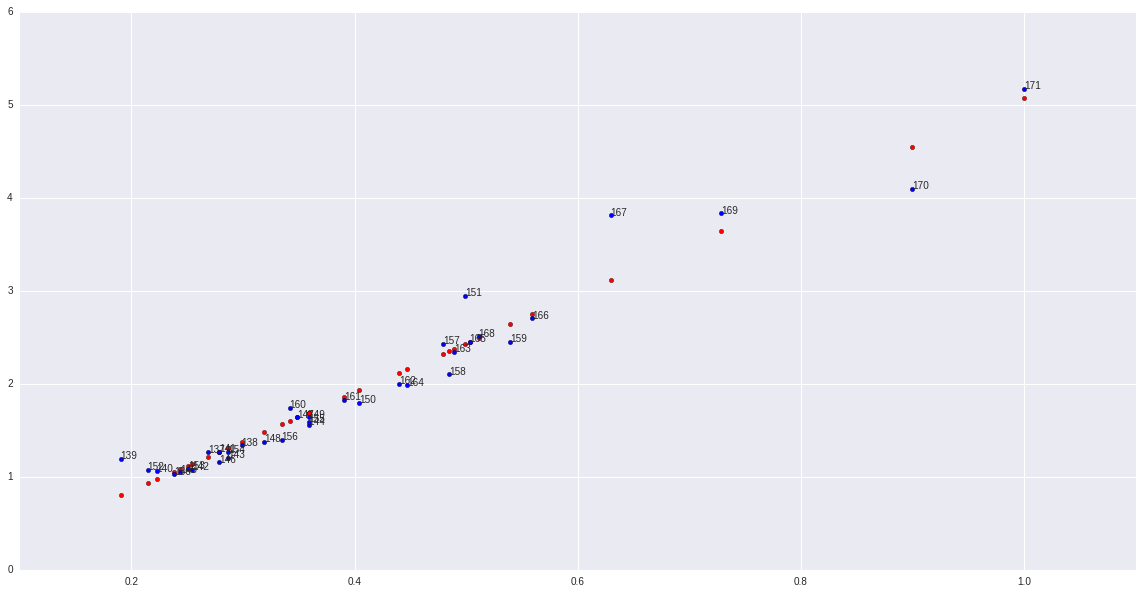

1


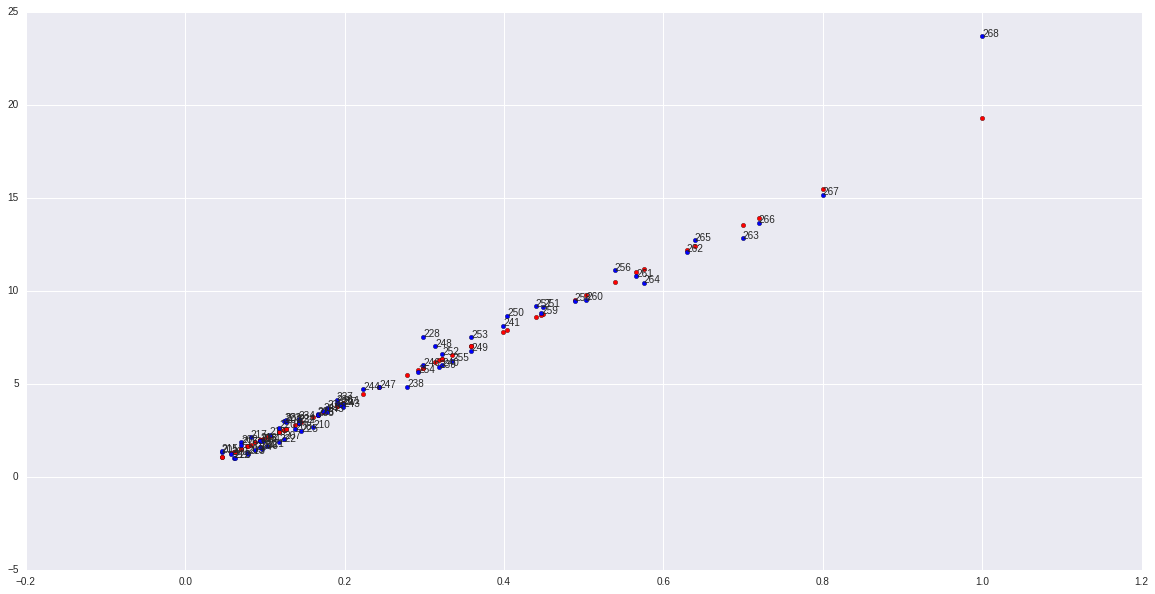

2


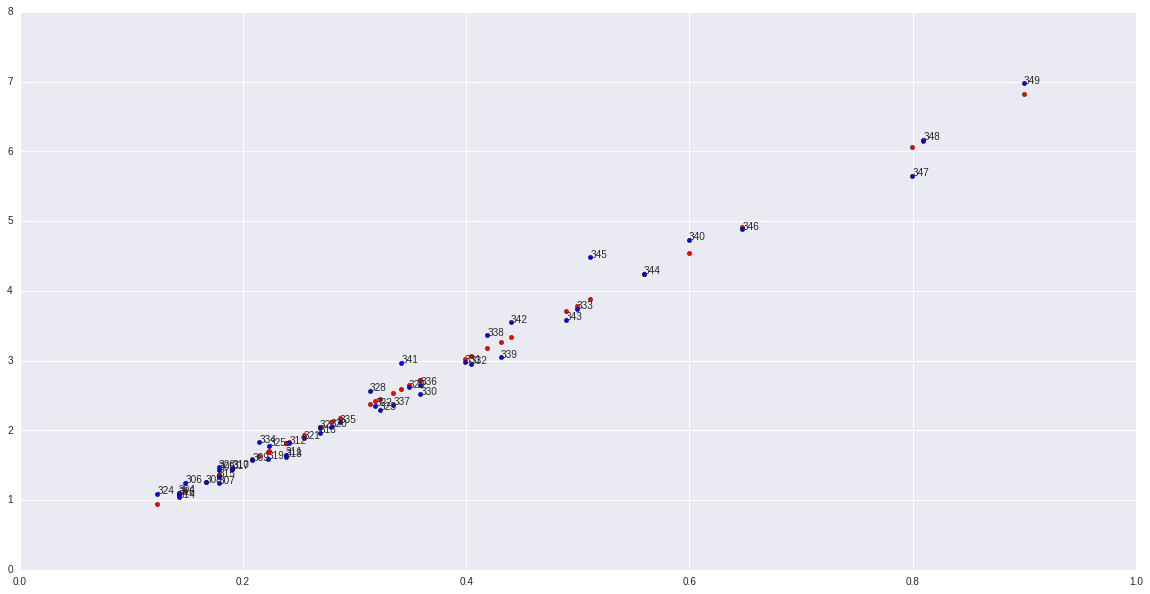

3


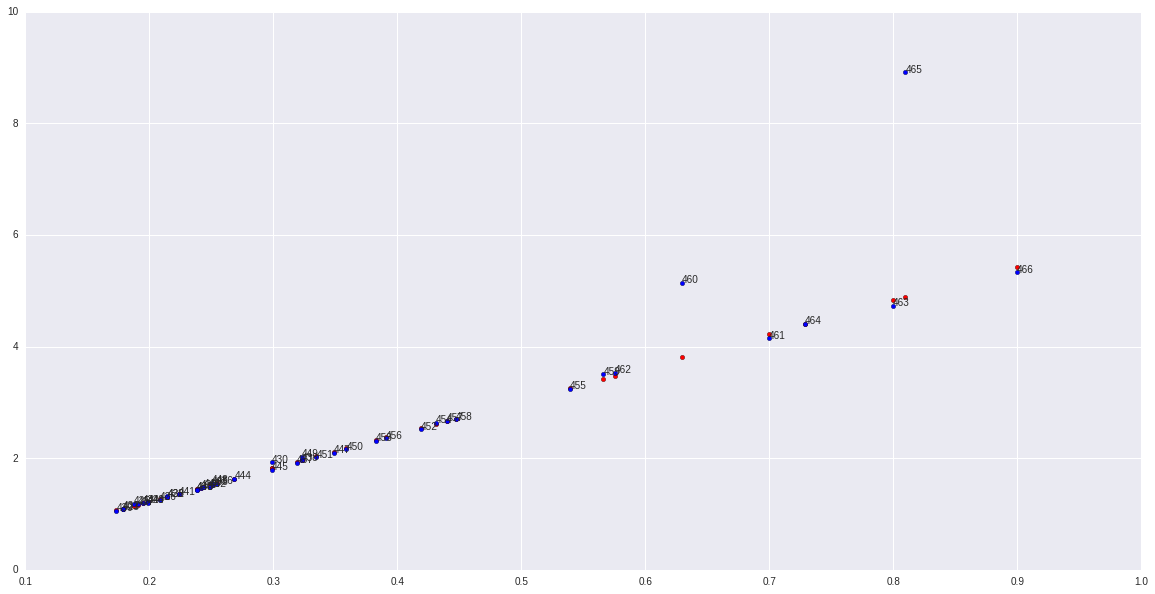

4


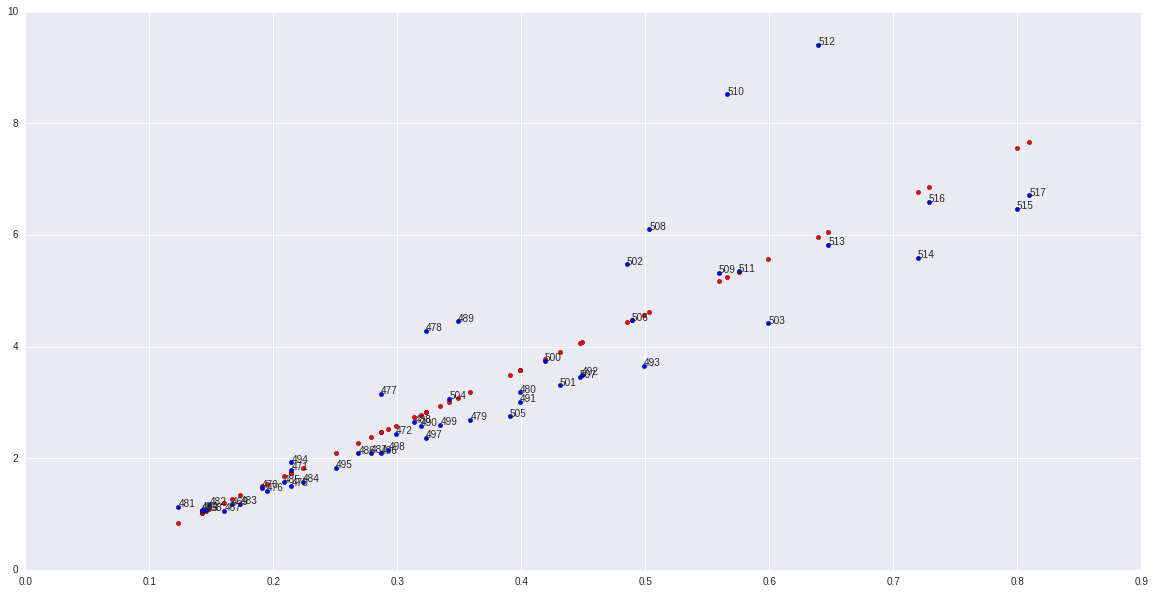

5


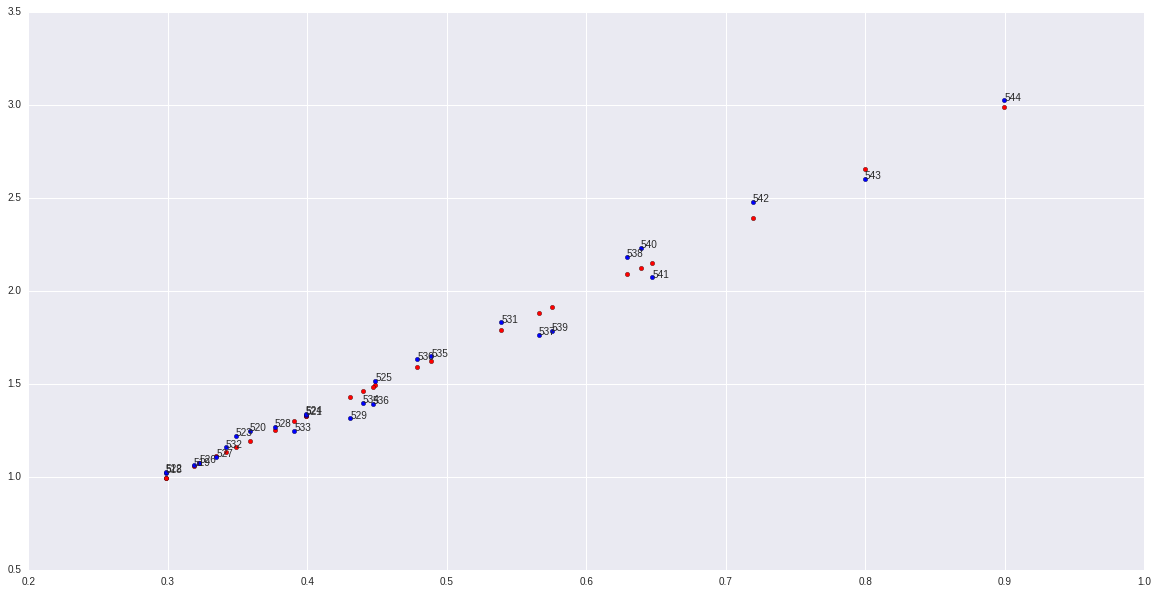

6


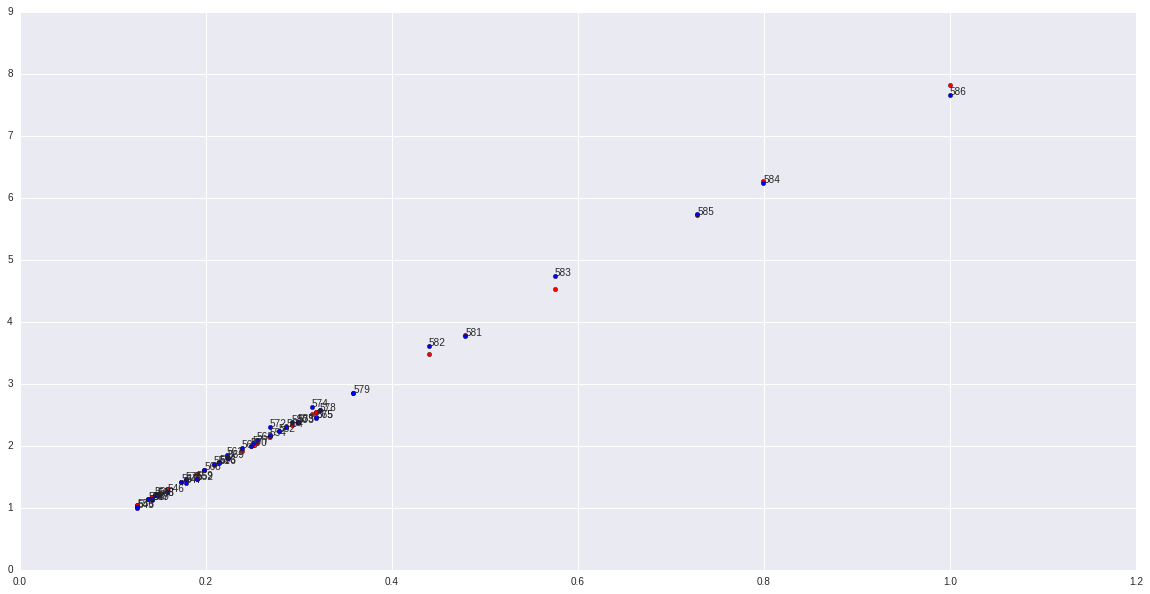

7


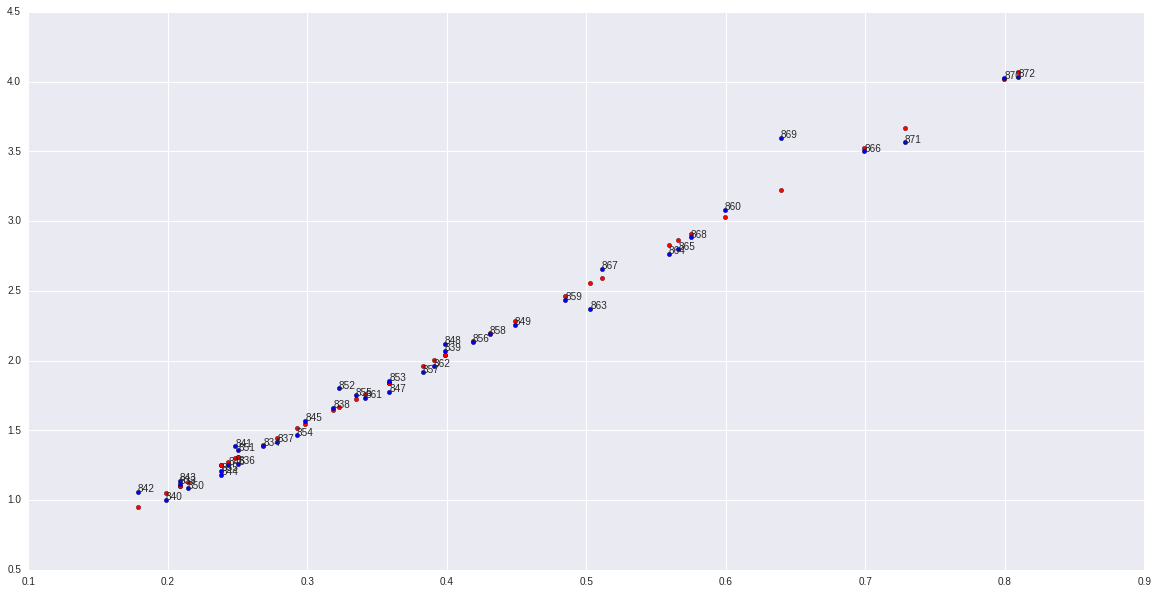

8


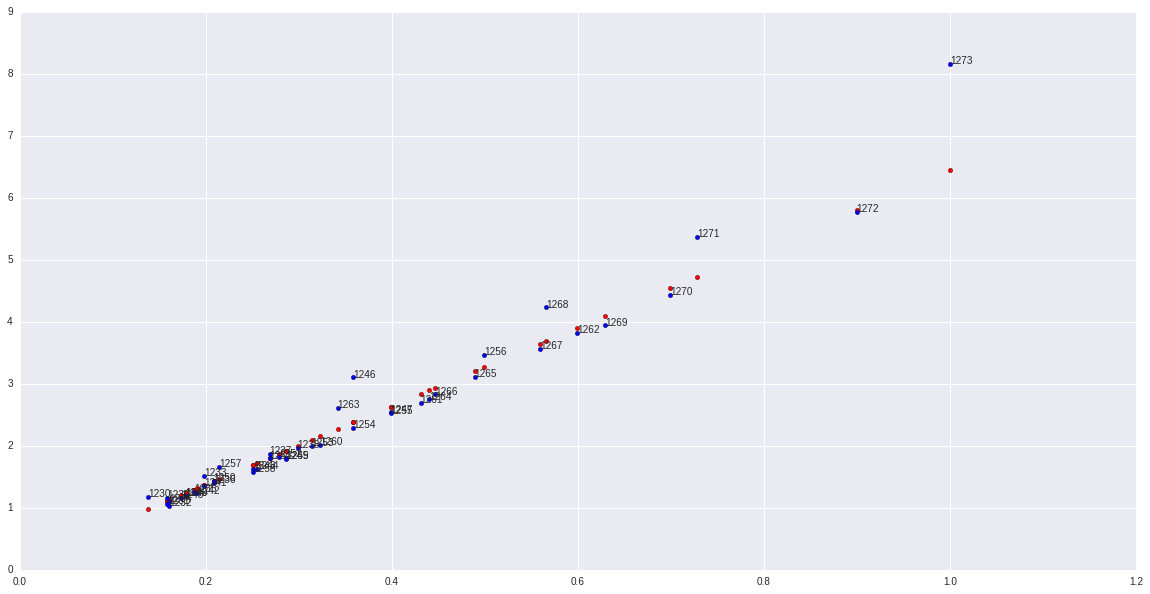

9


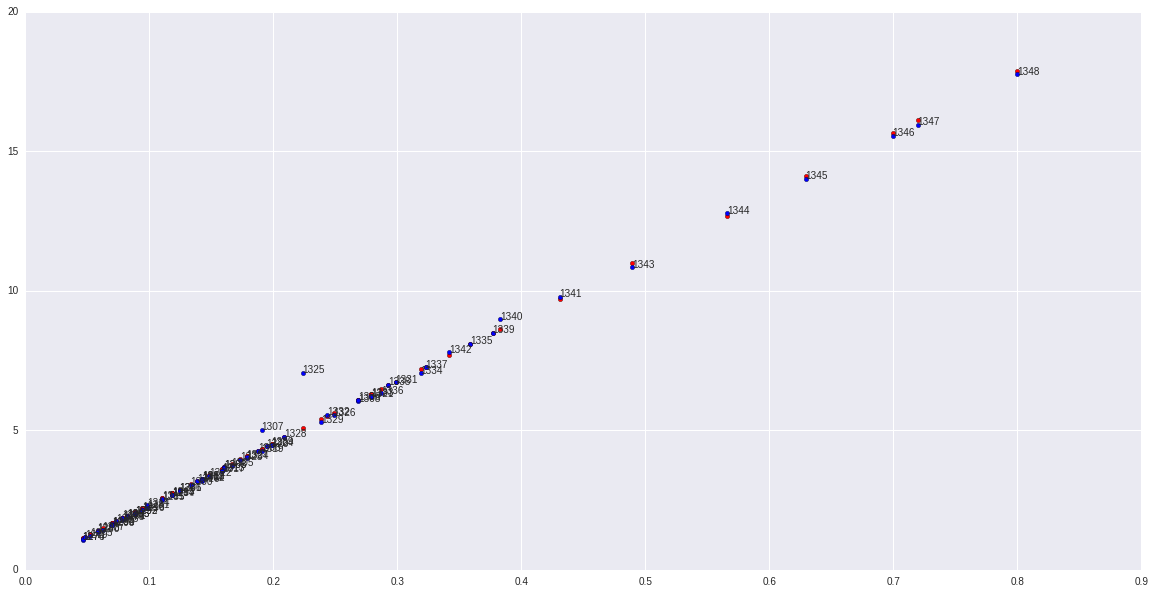

10


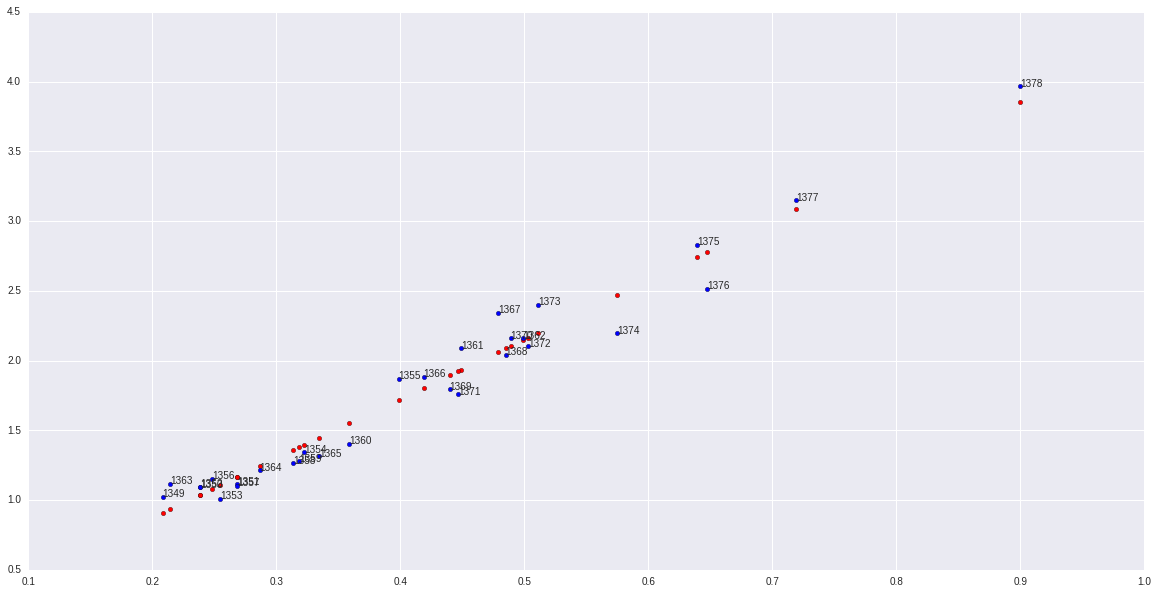

11


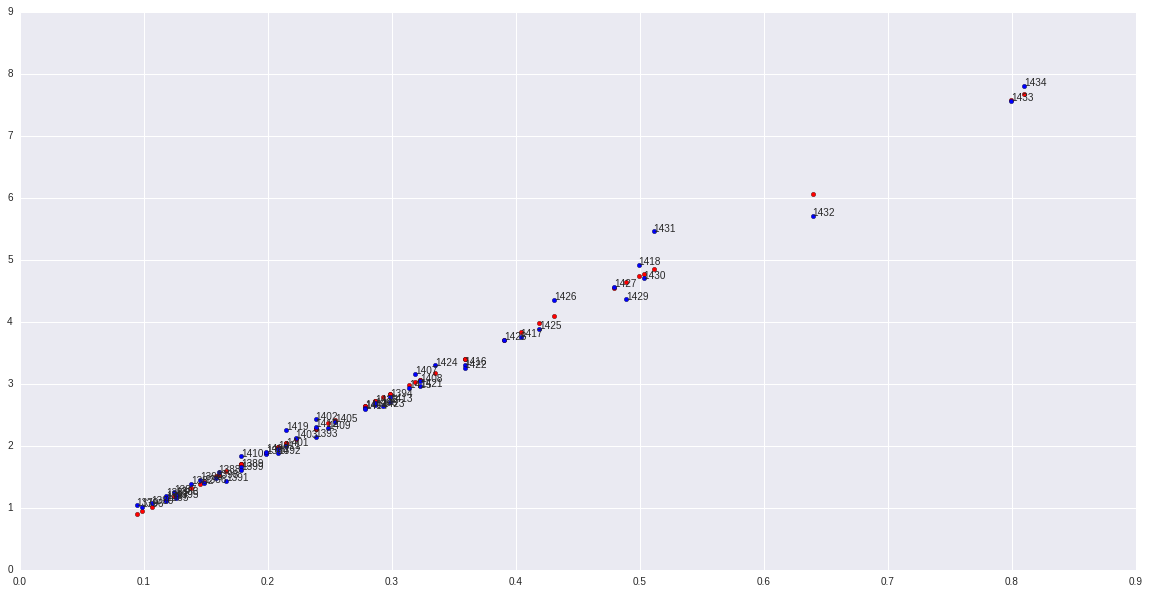

12


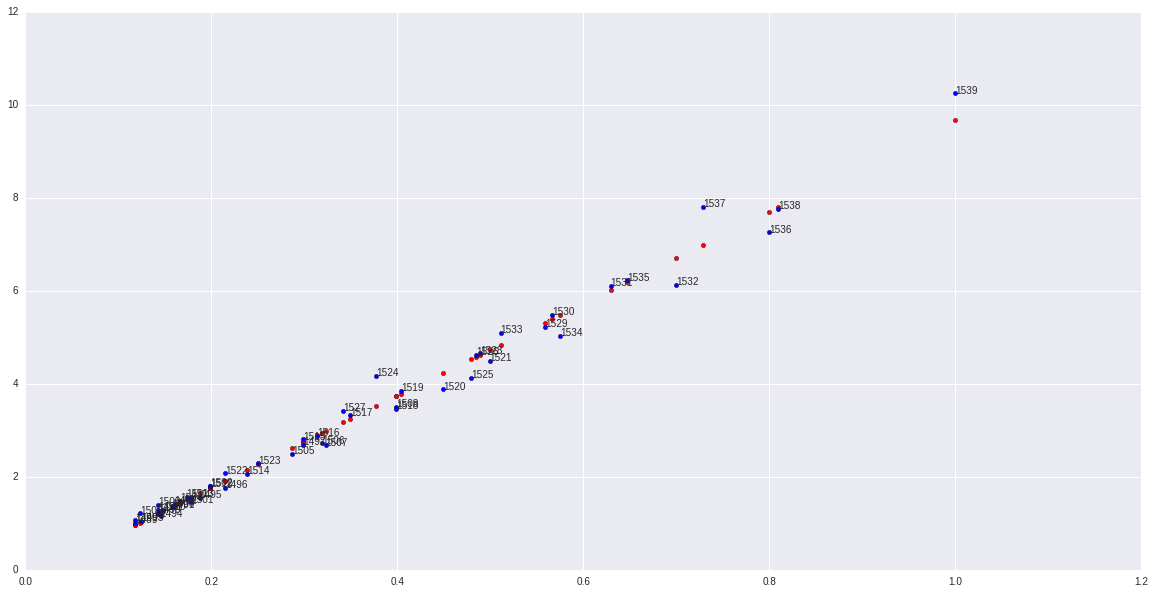

13


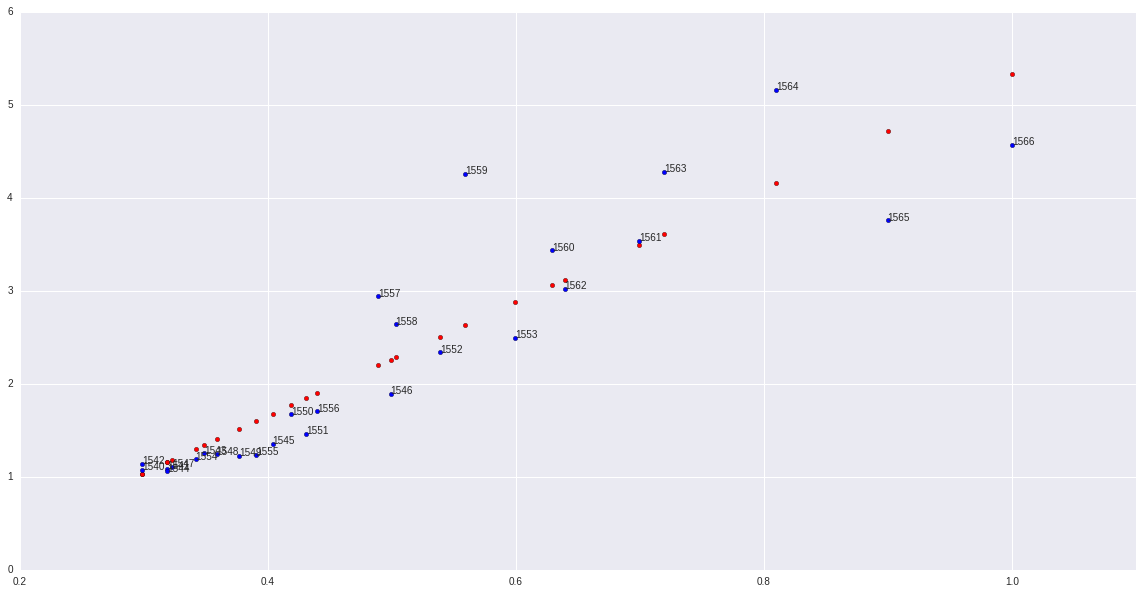

14


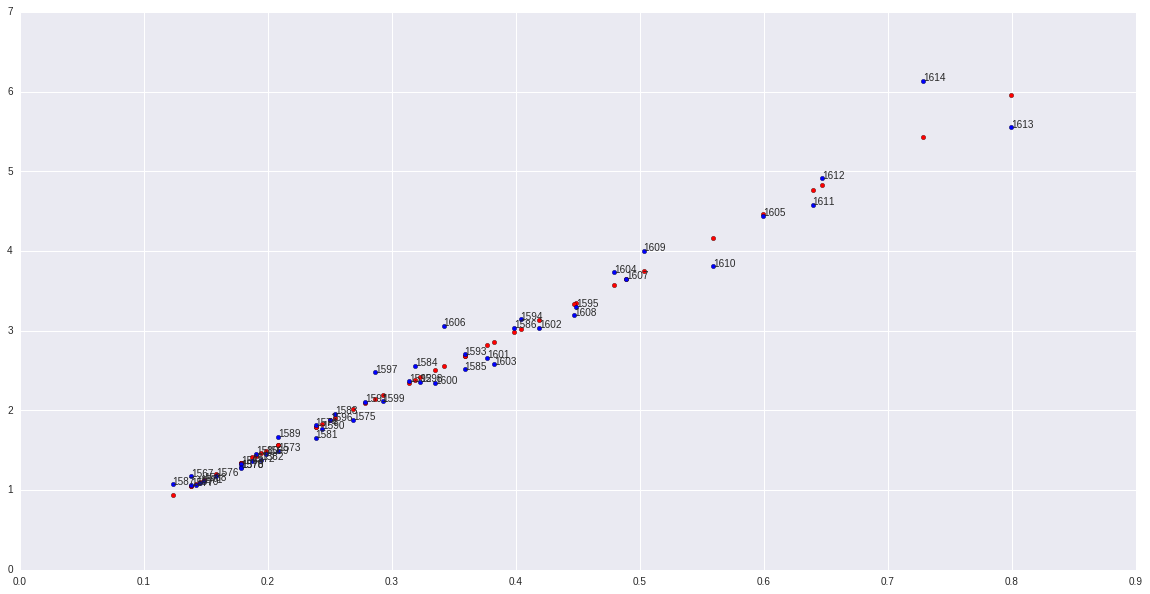

15


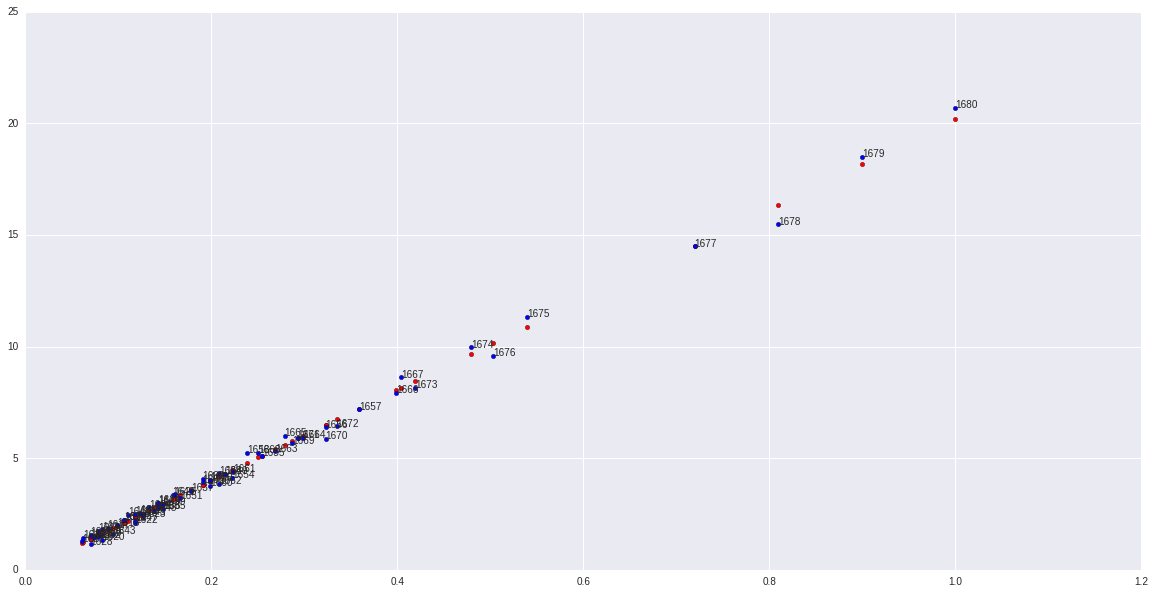

16


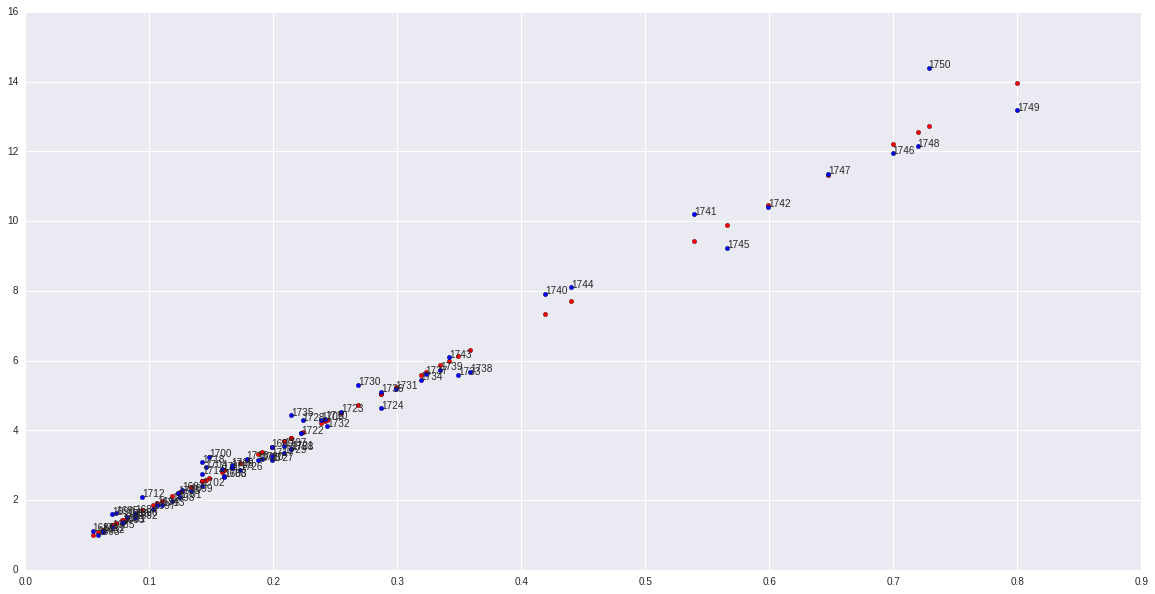

17


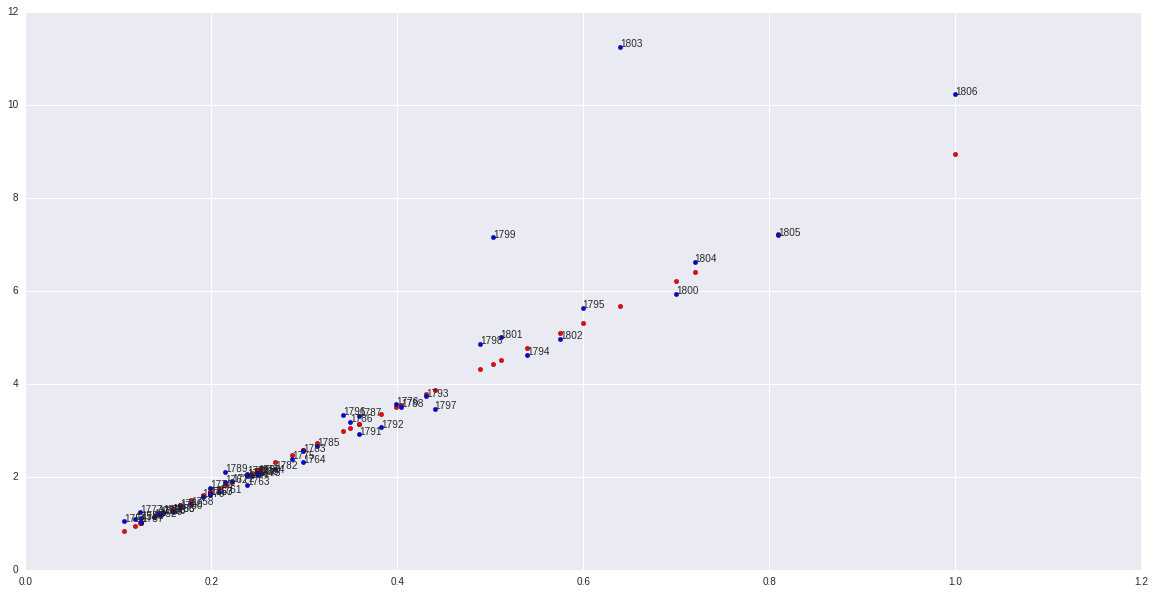

18


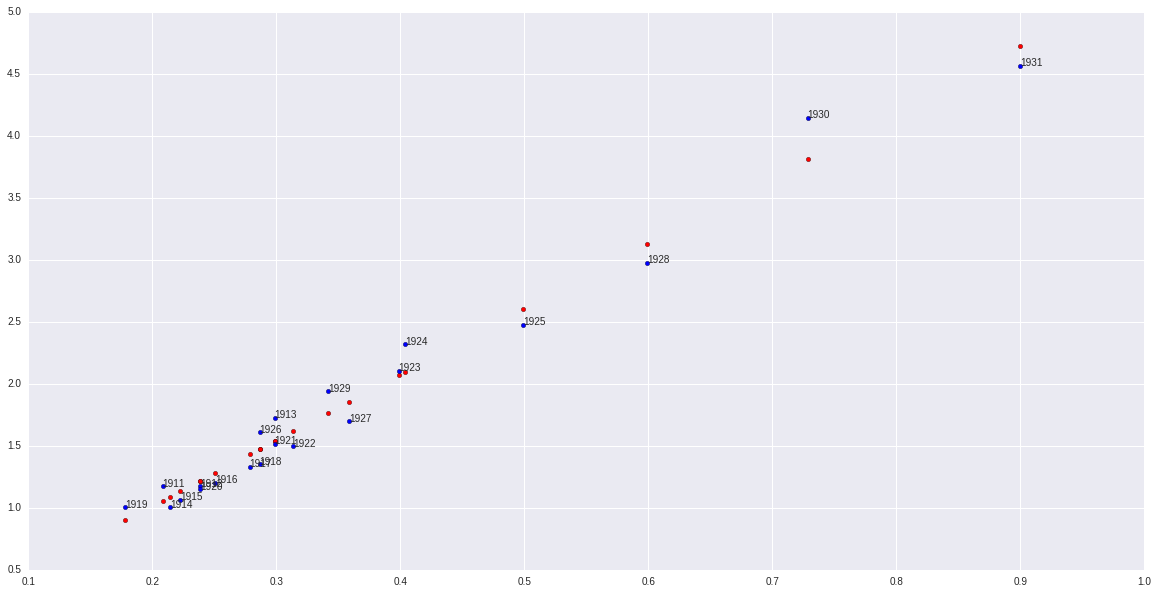

19


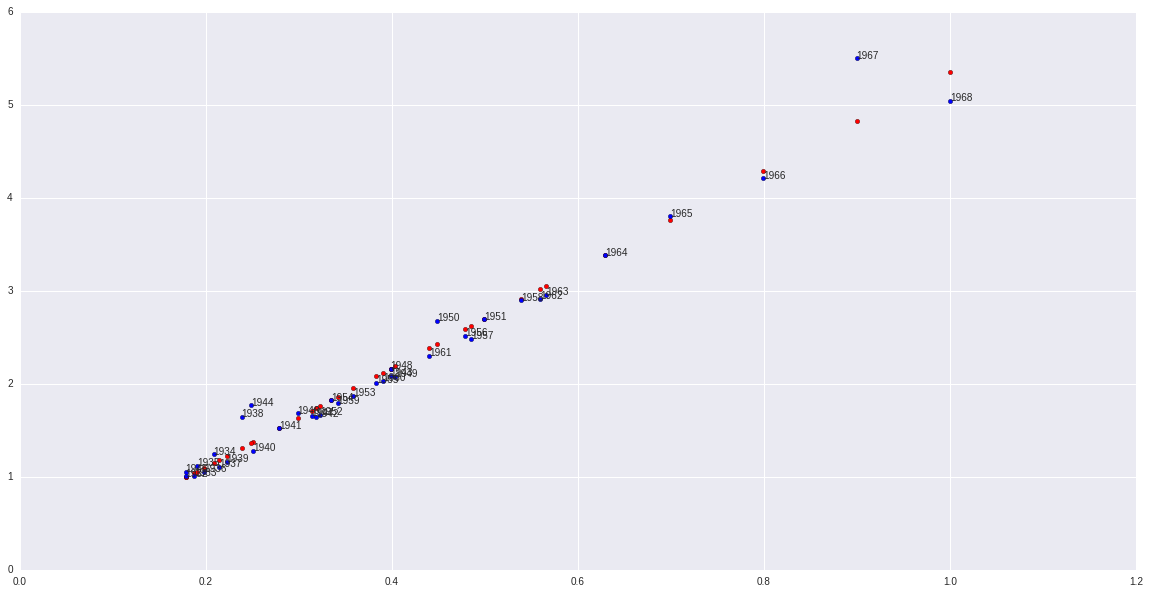

20


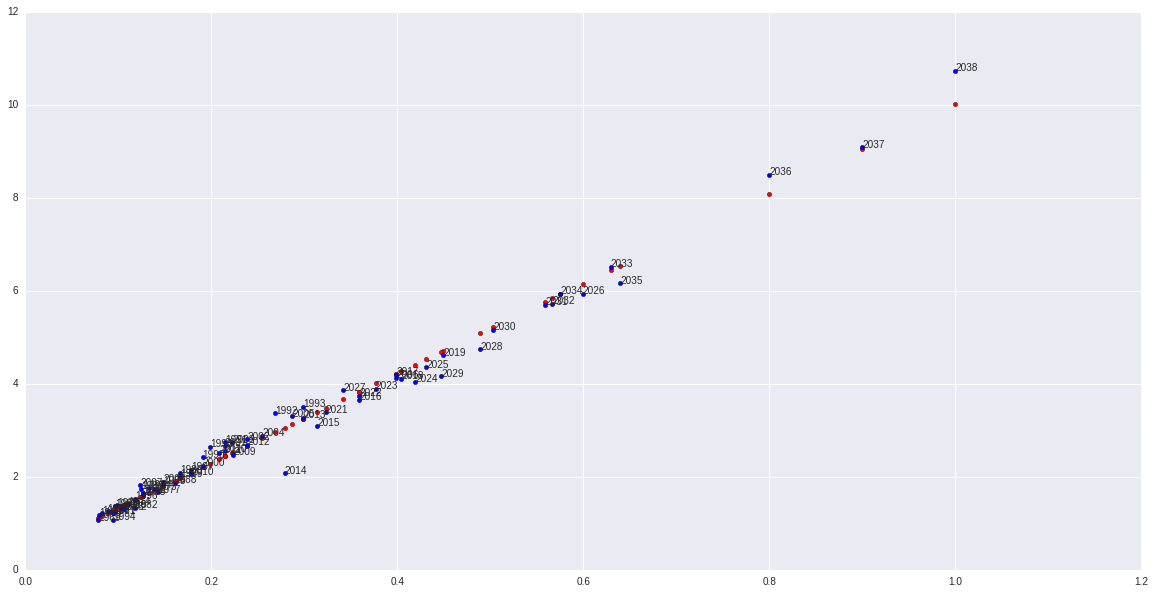

21


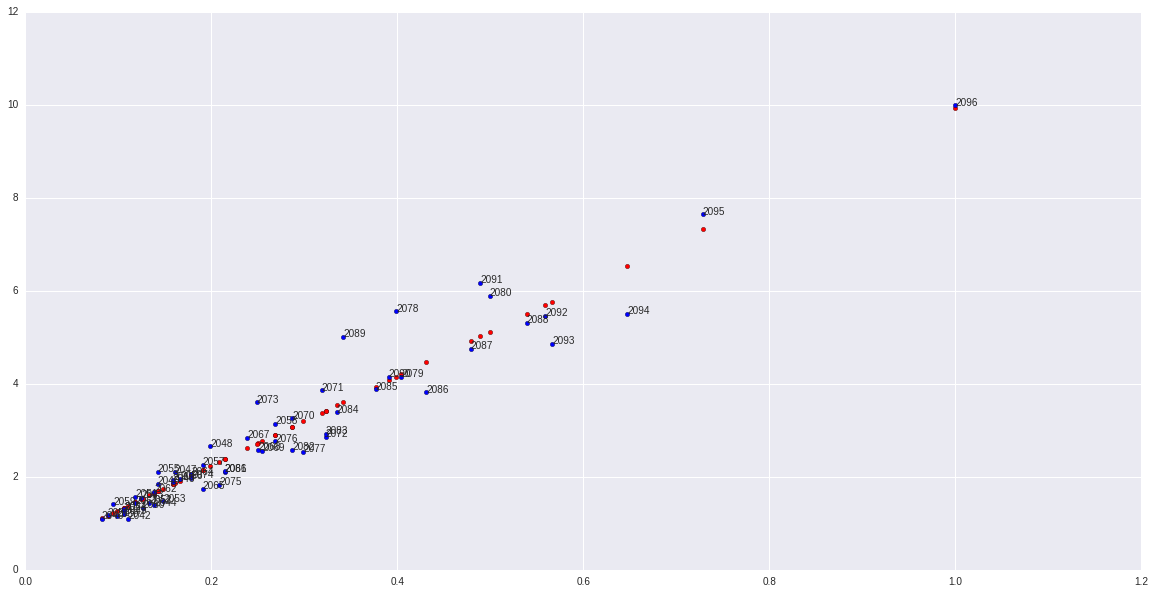

22


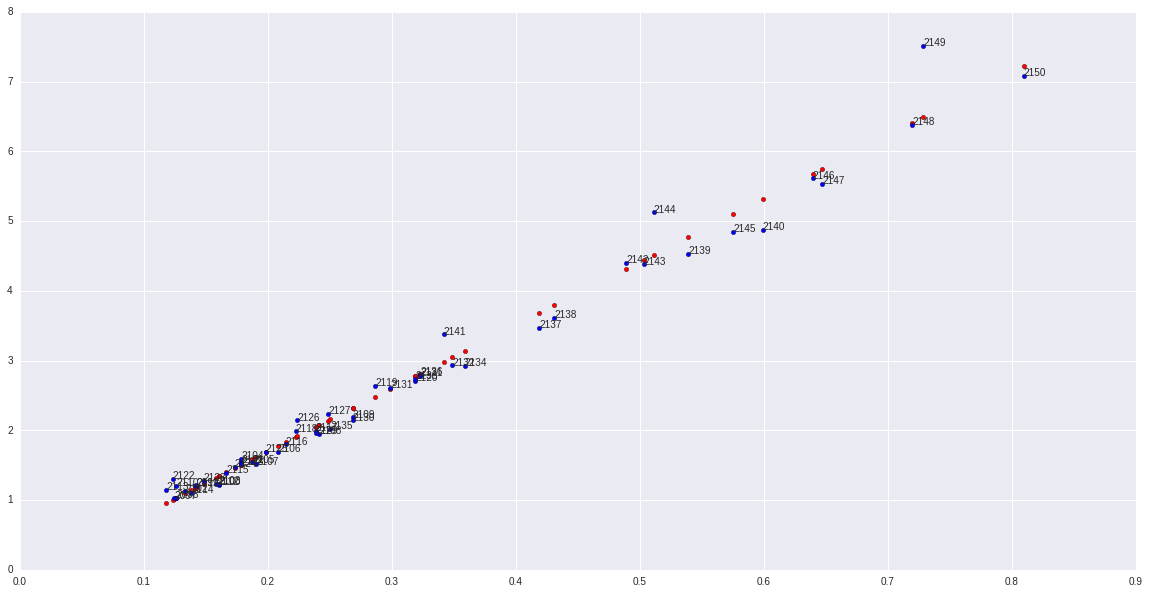

23


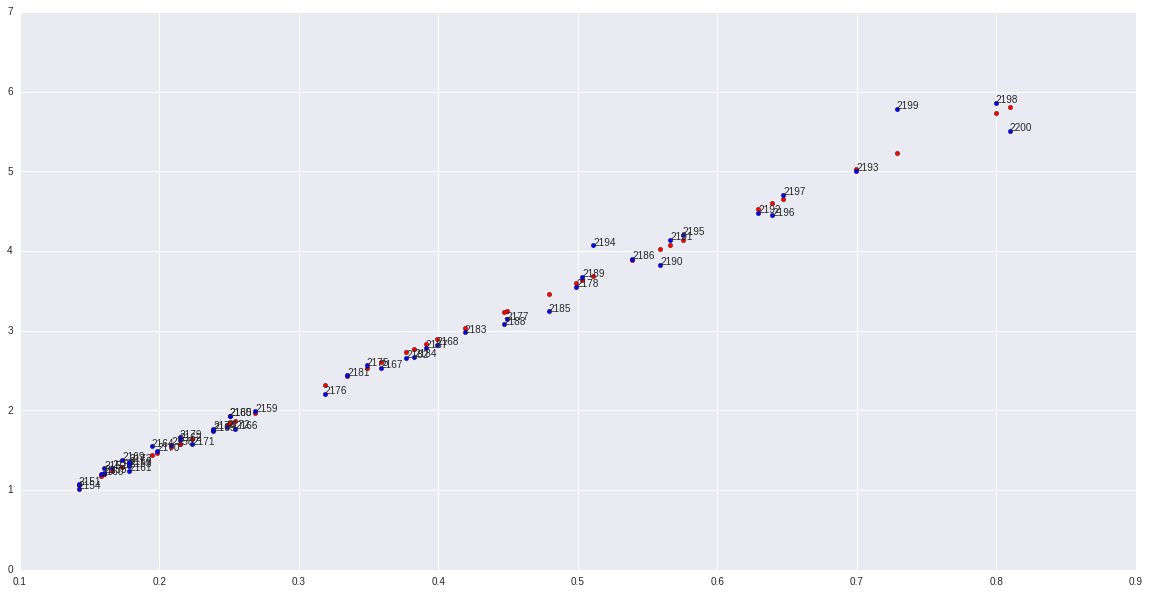

24


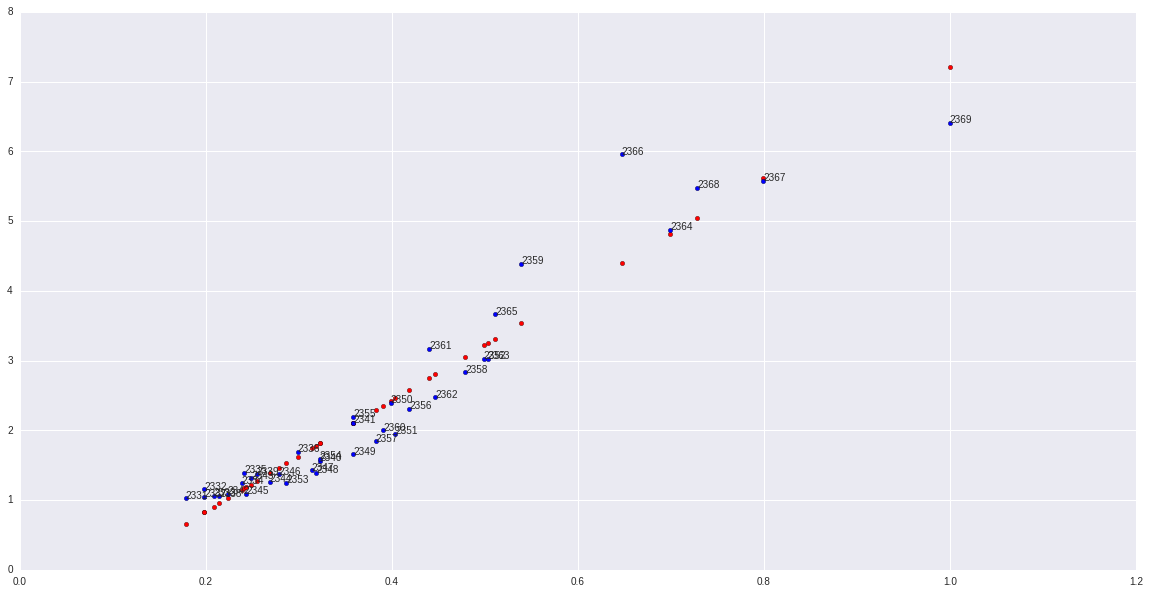

25


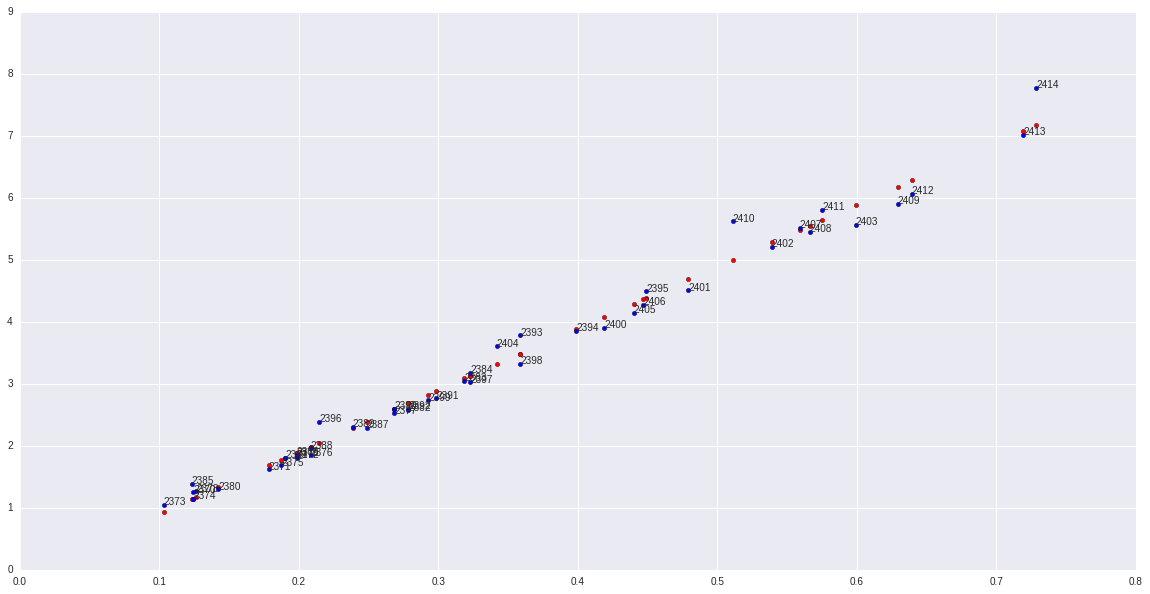

26


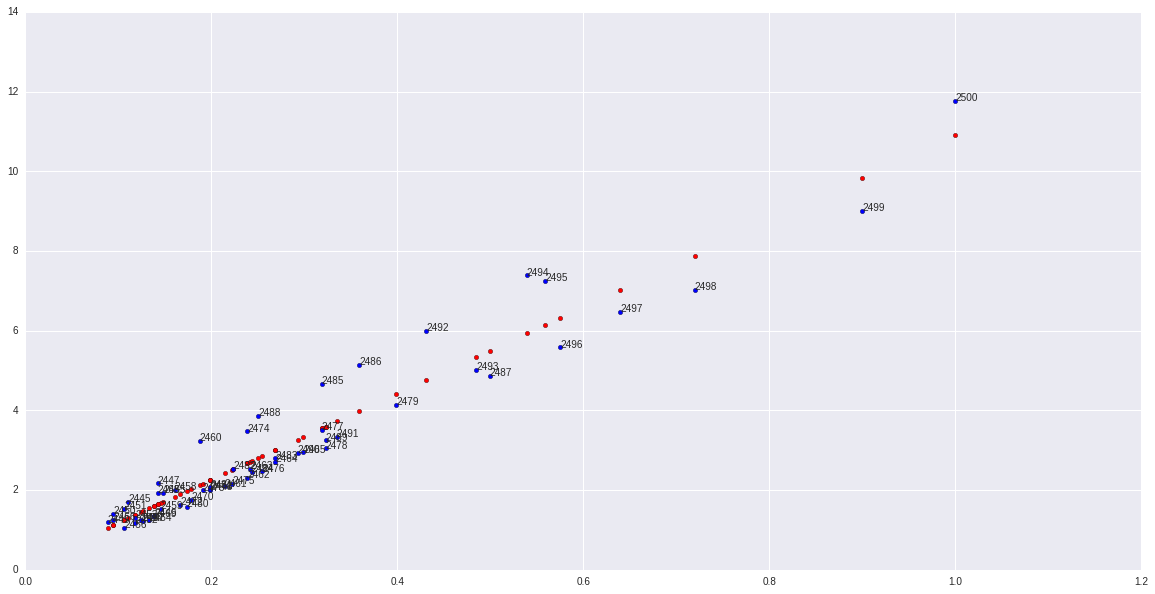

27


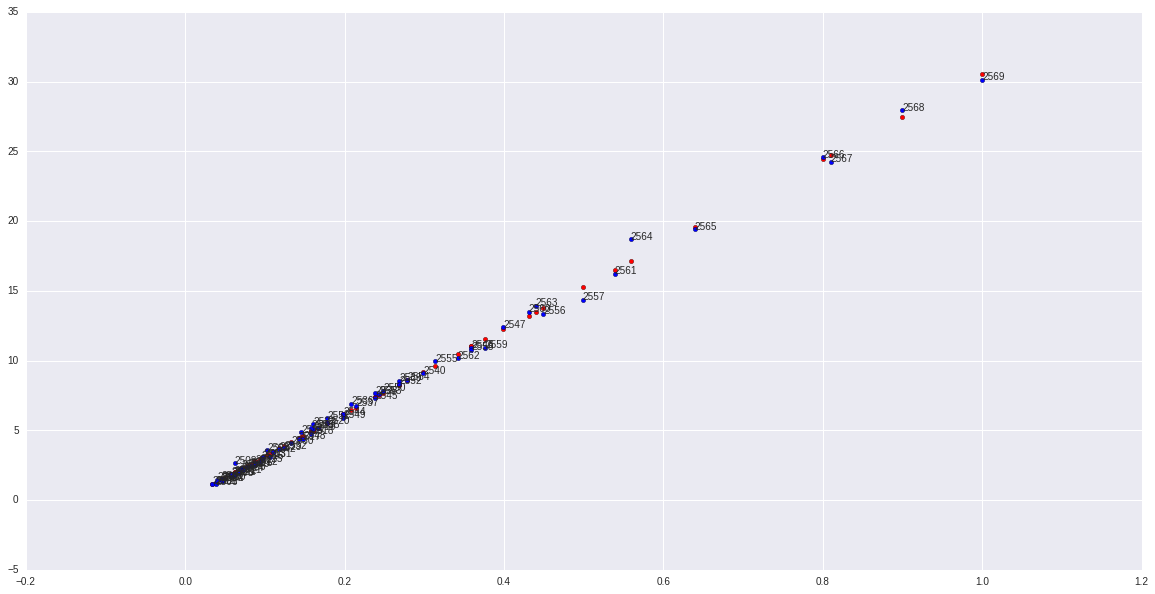

28


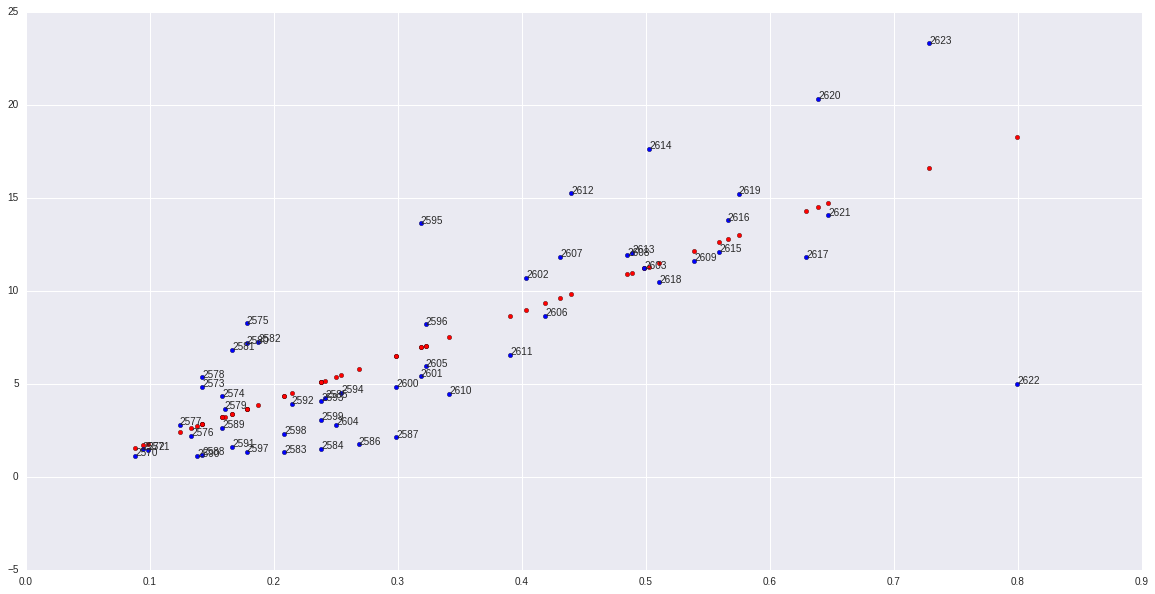

29


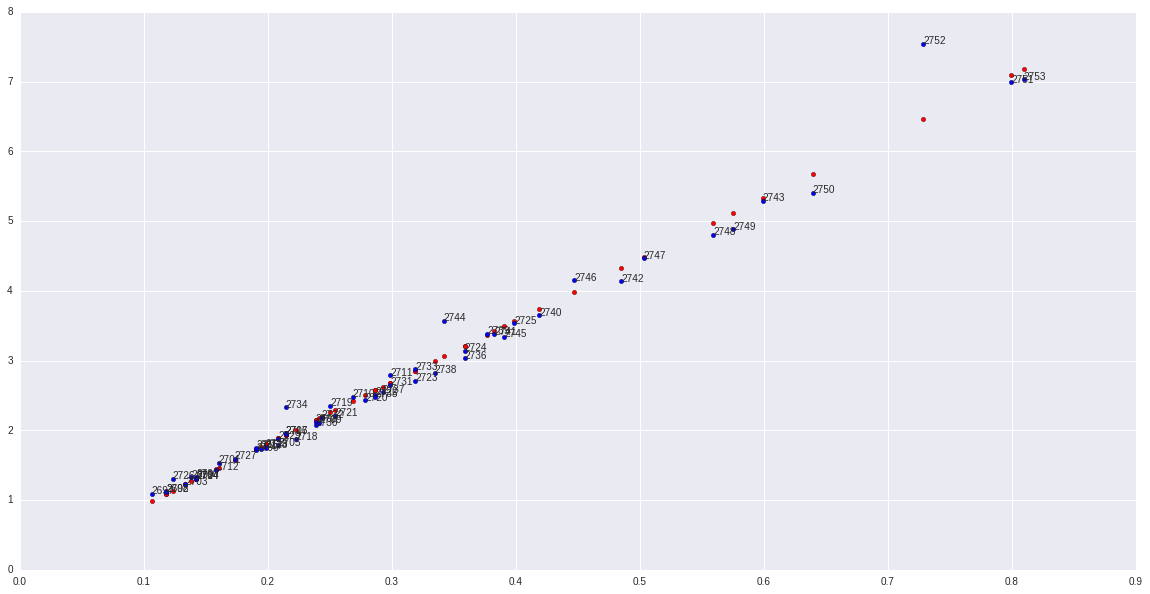

30


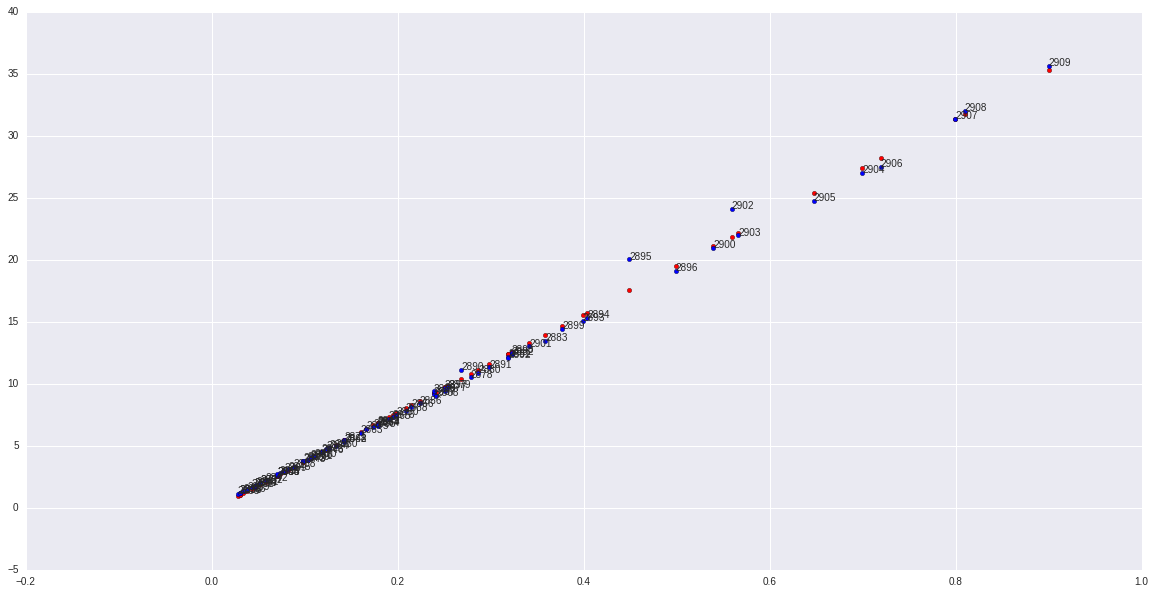

31


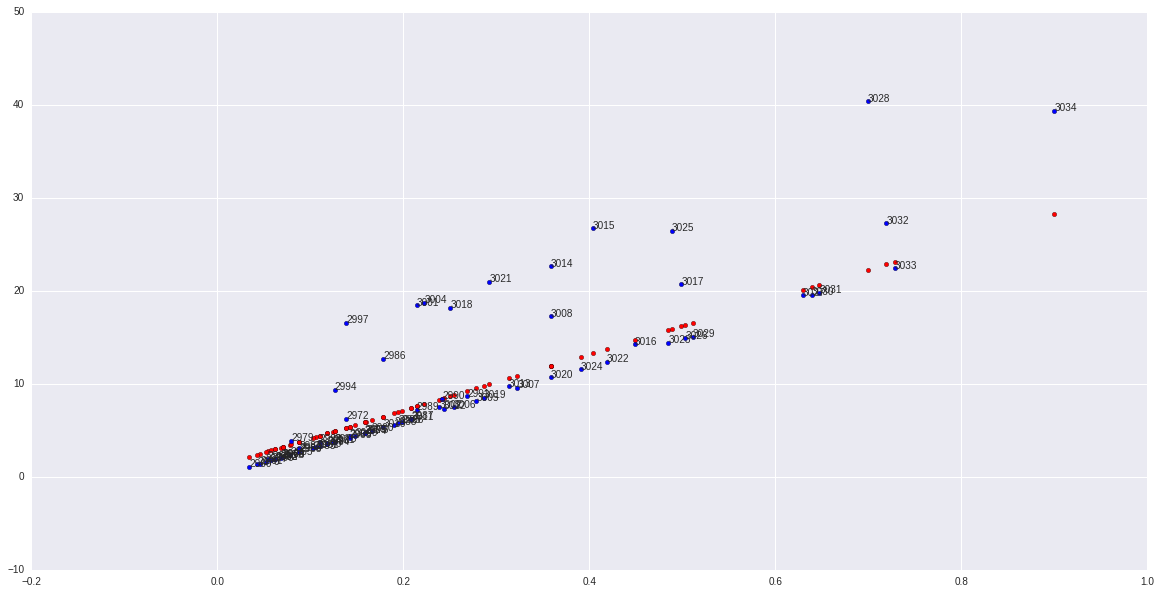

32


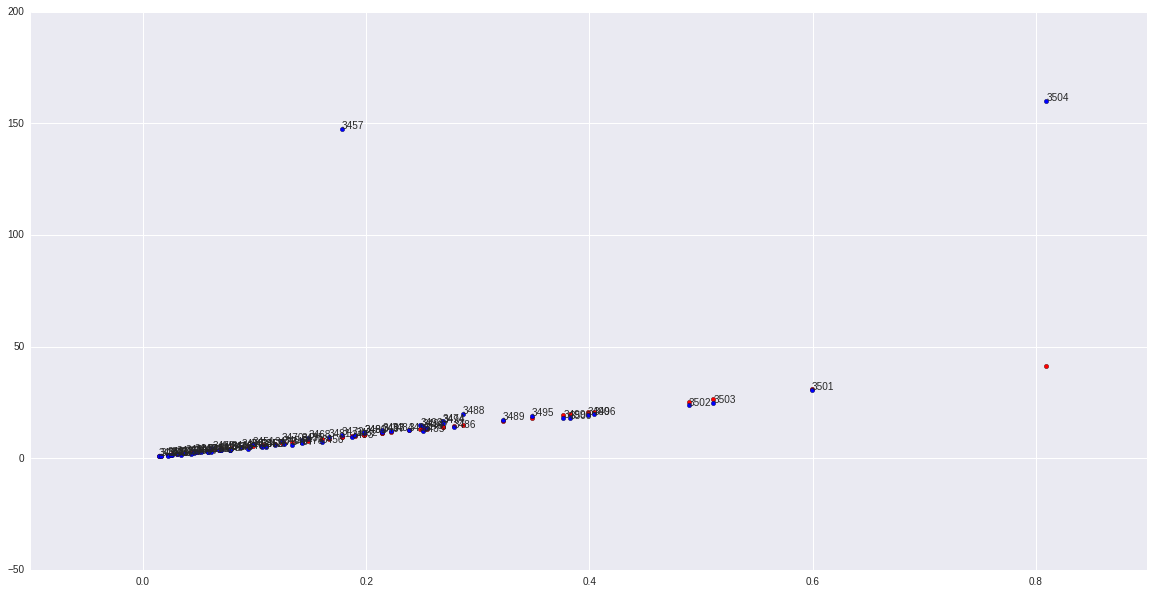

33


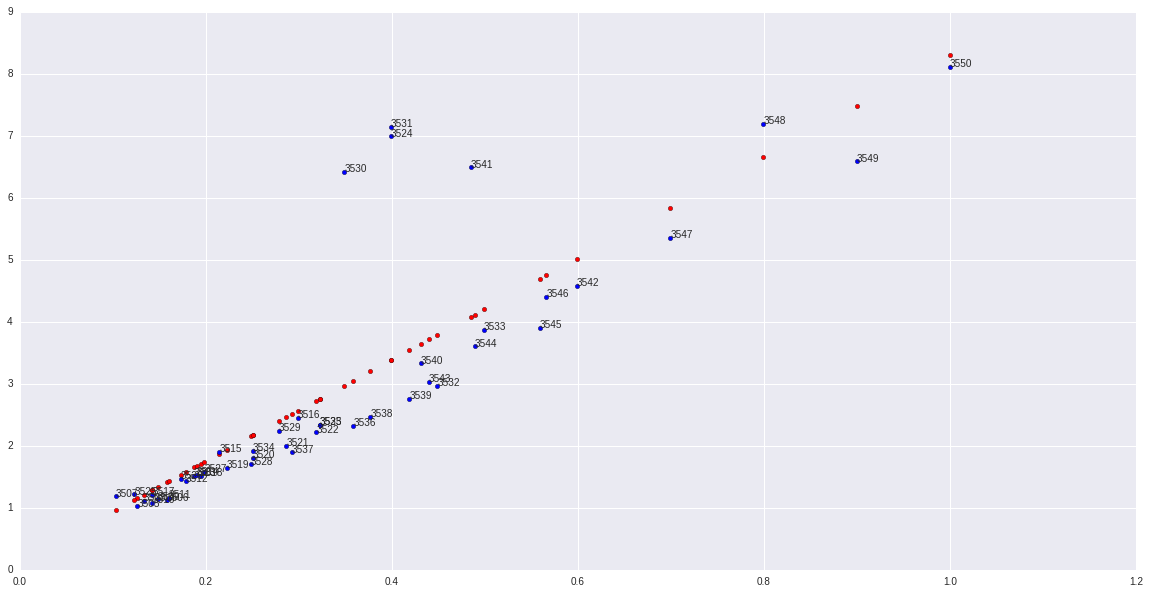

34


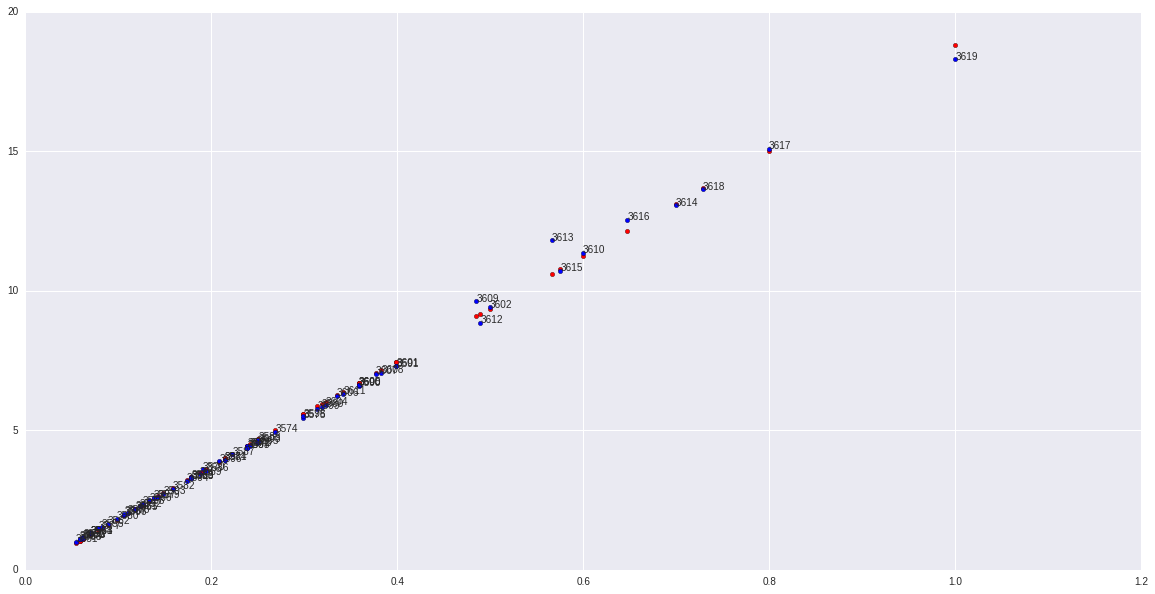

35


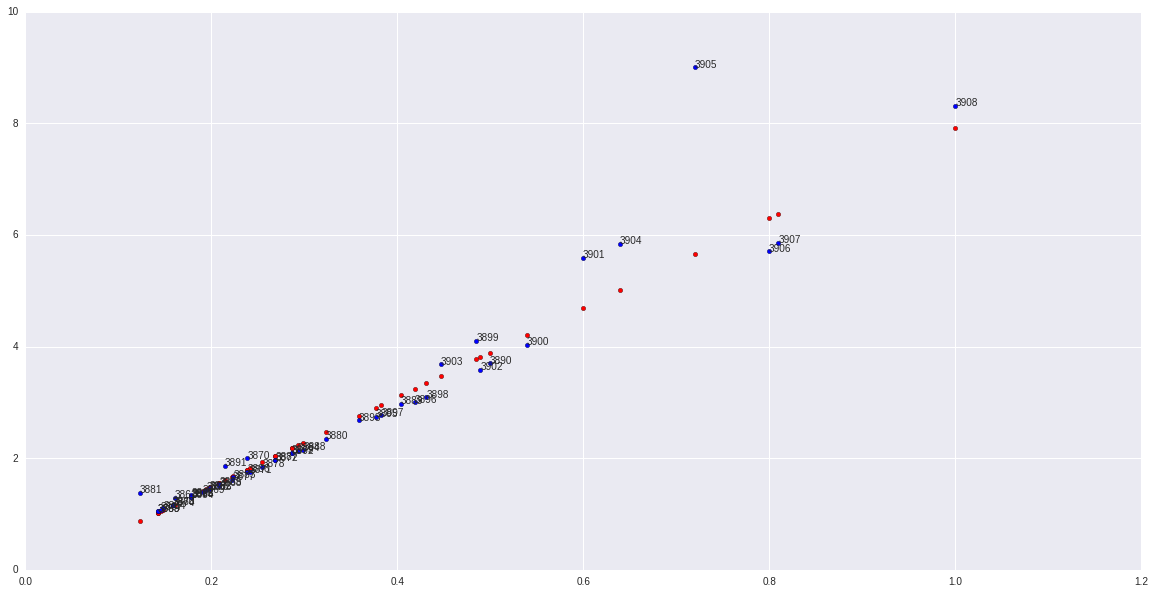

36


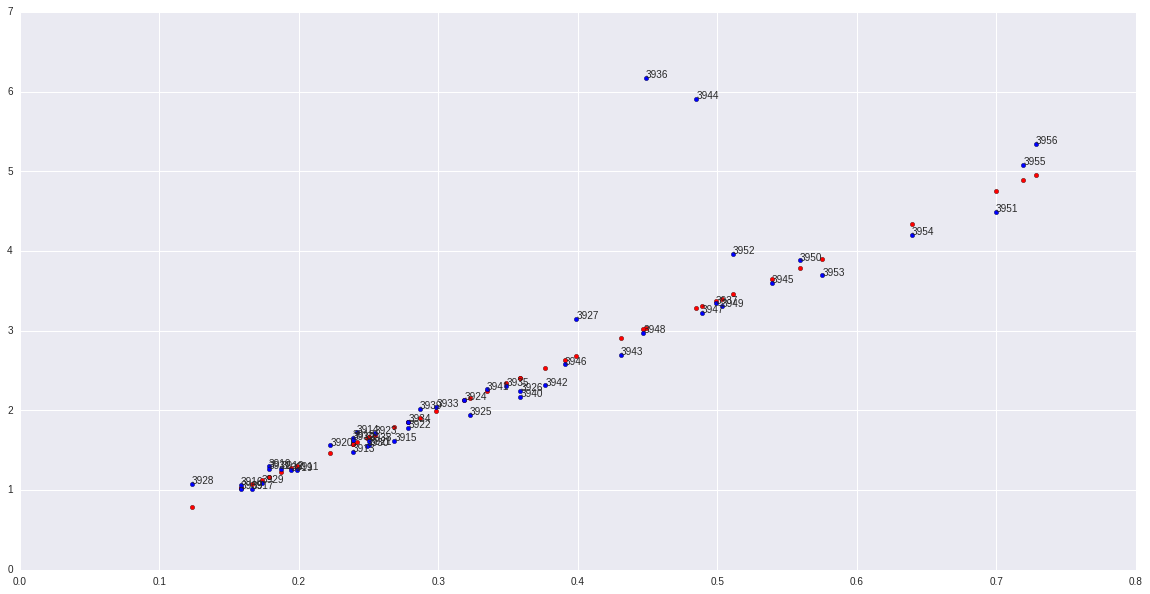

37


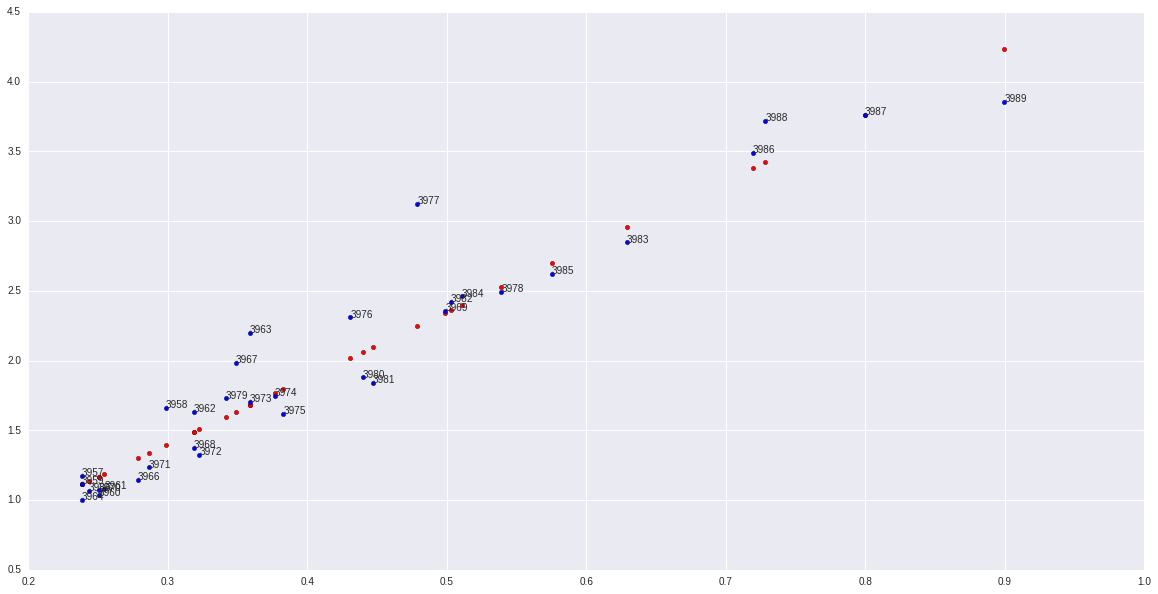

38


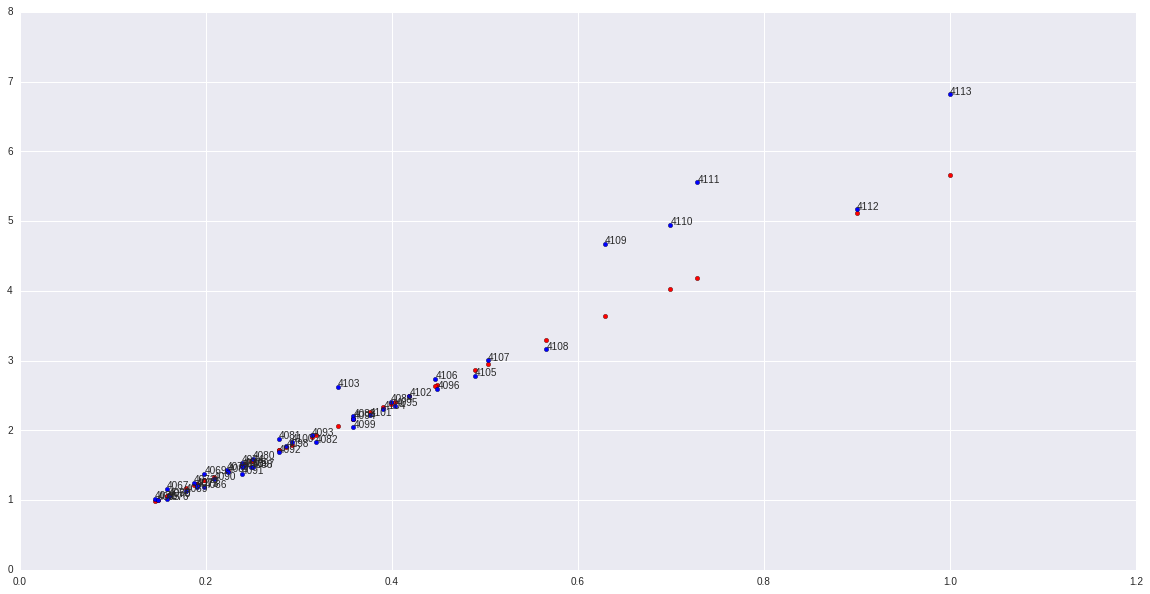

39


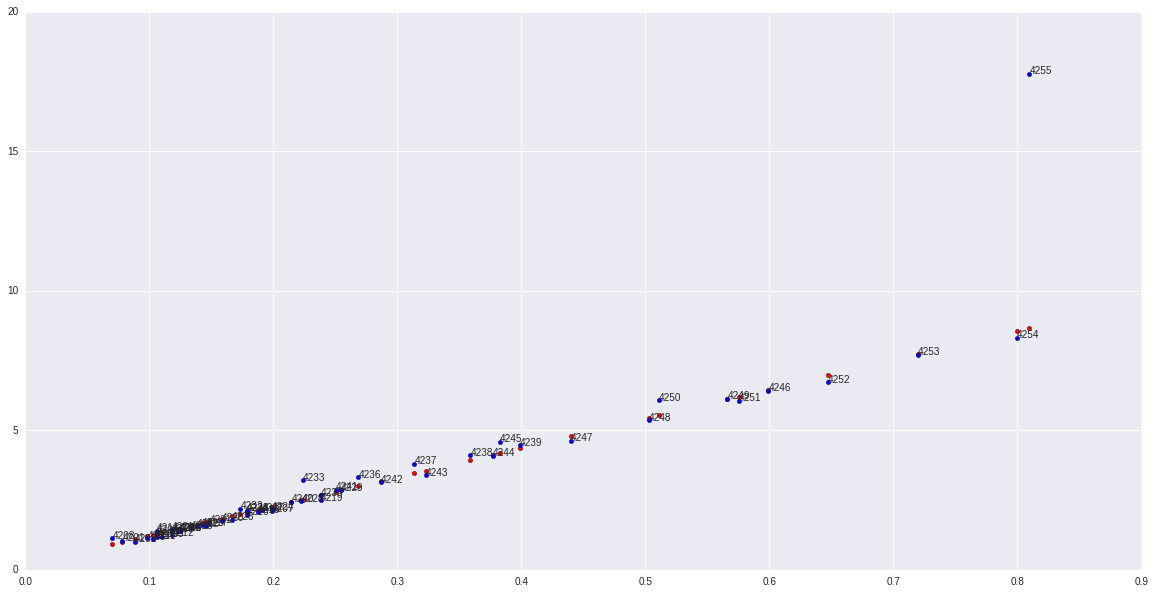

40


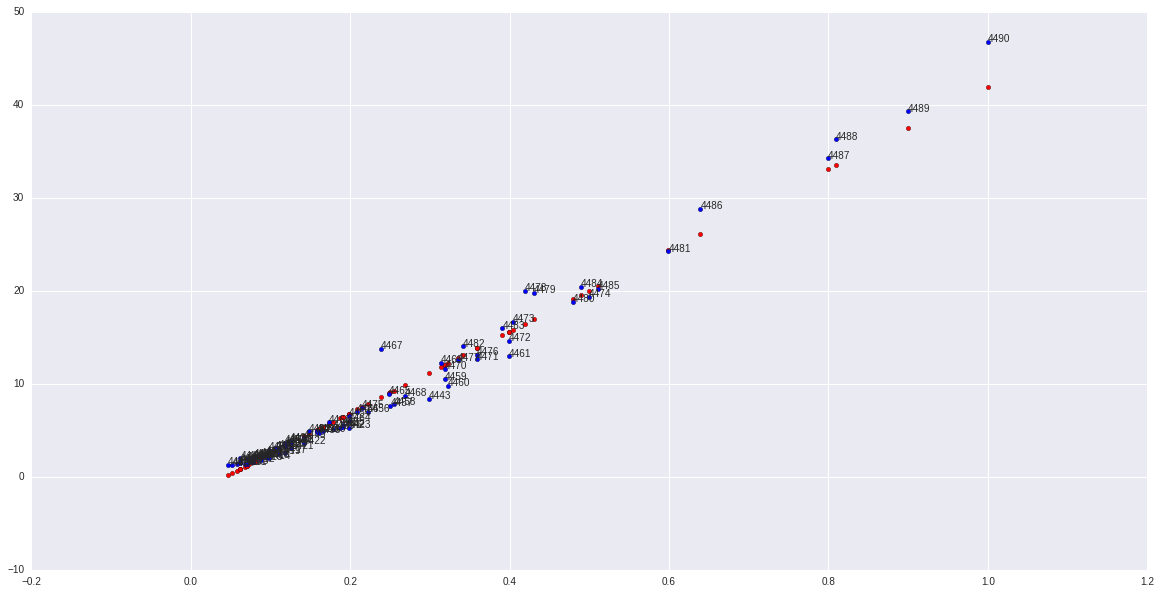

41


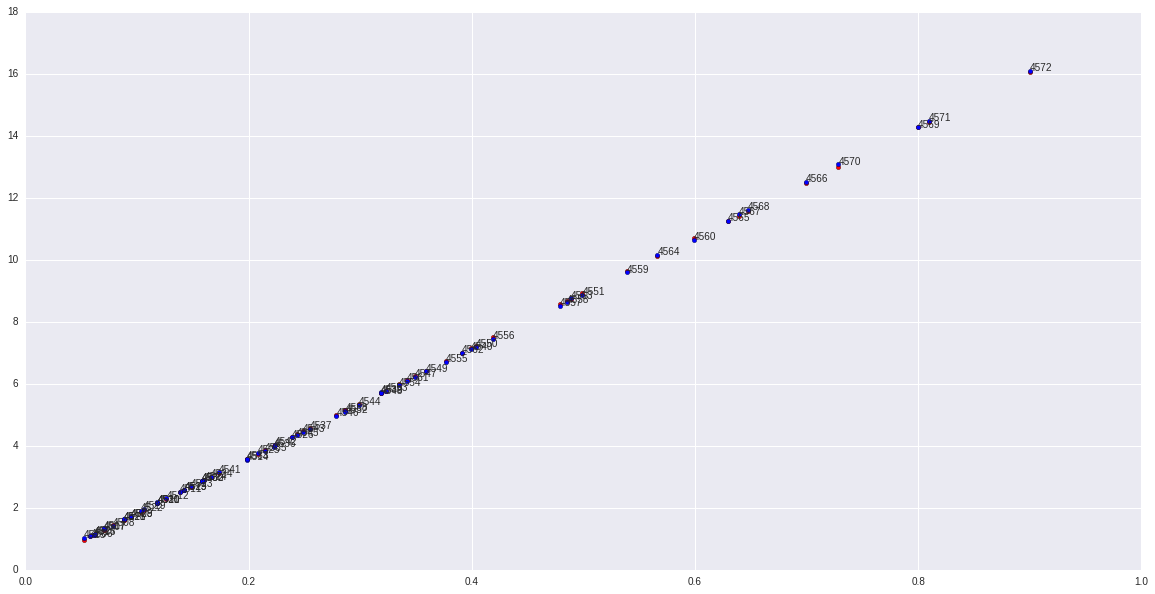

42


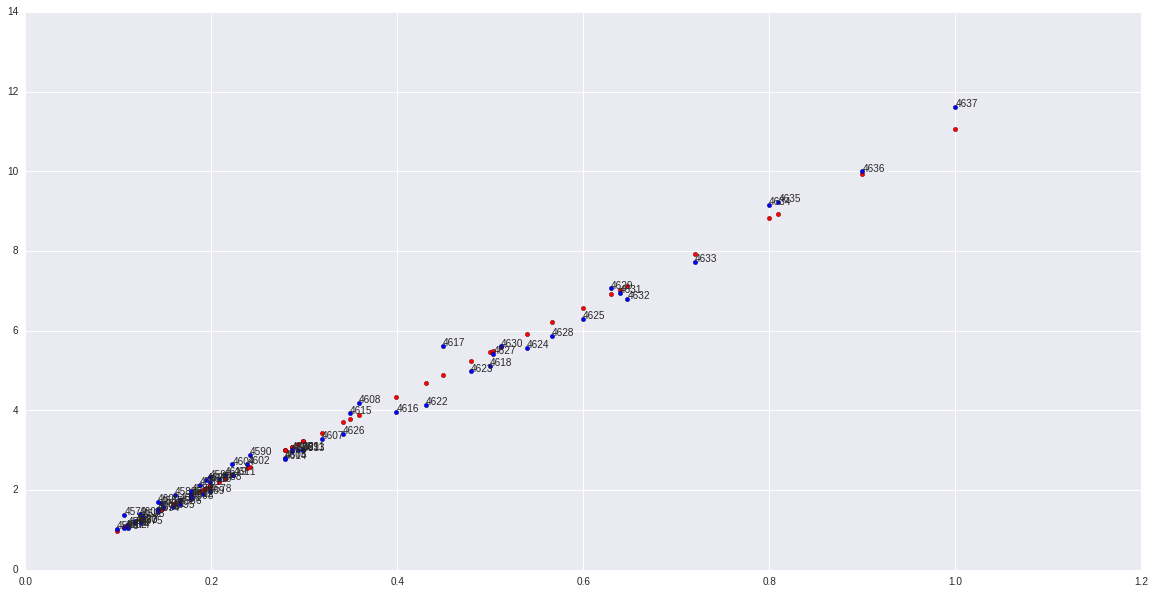

43


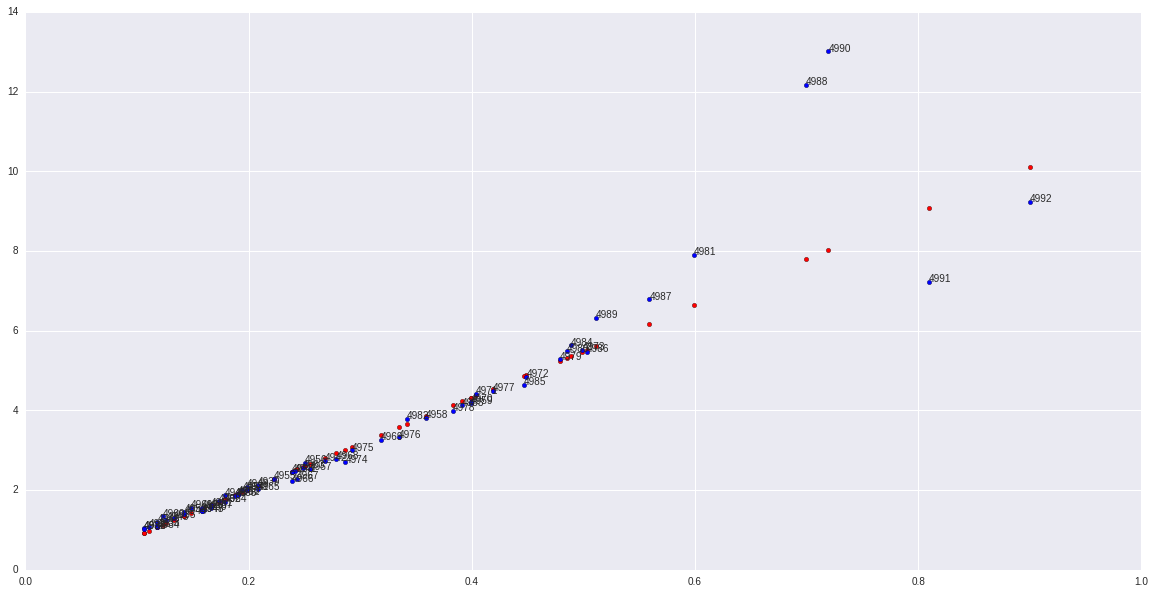

44


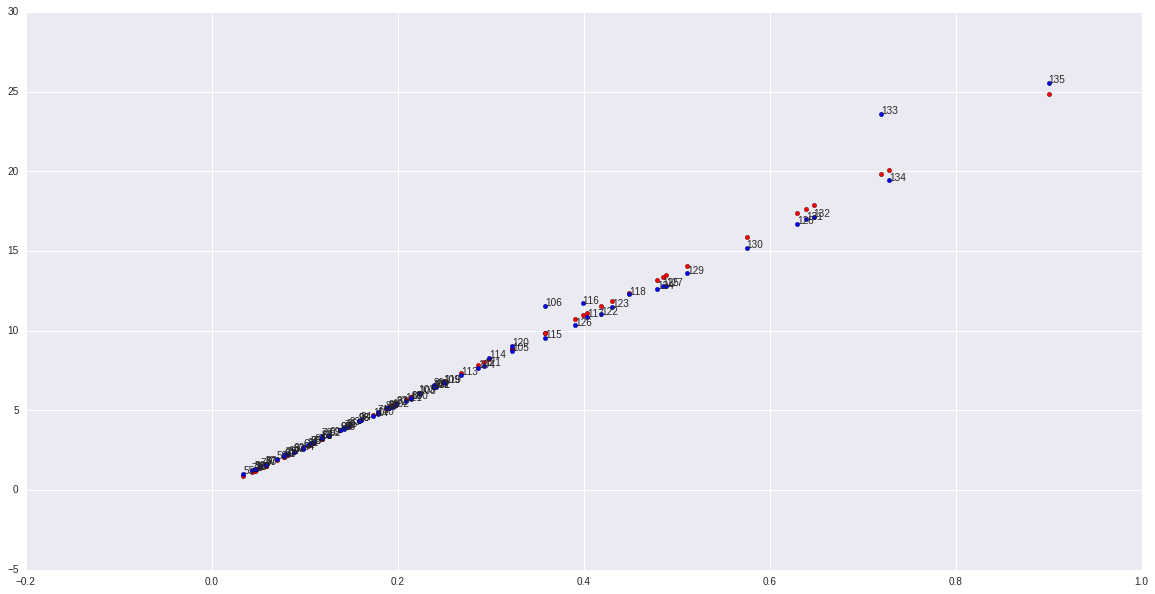

45


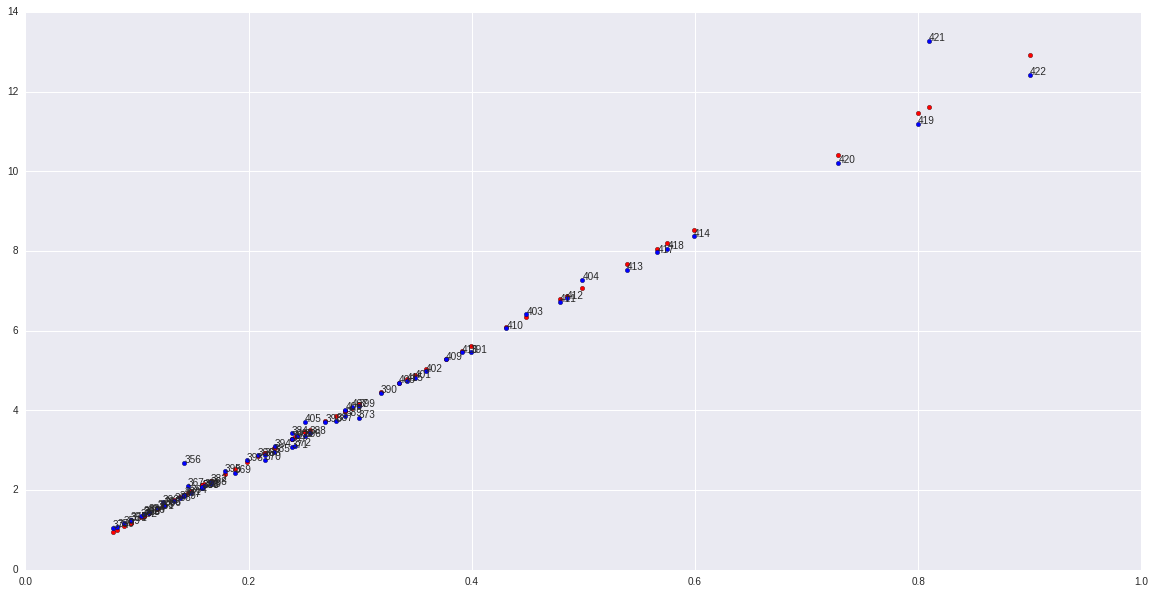

46


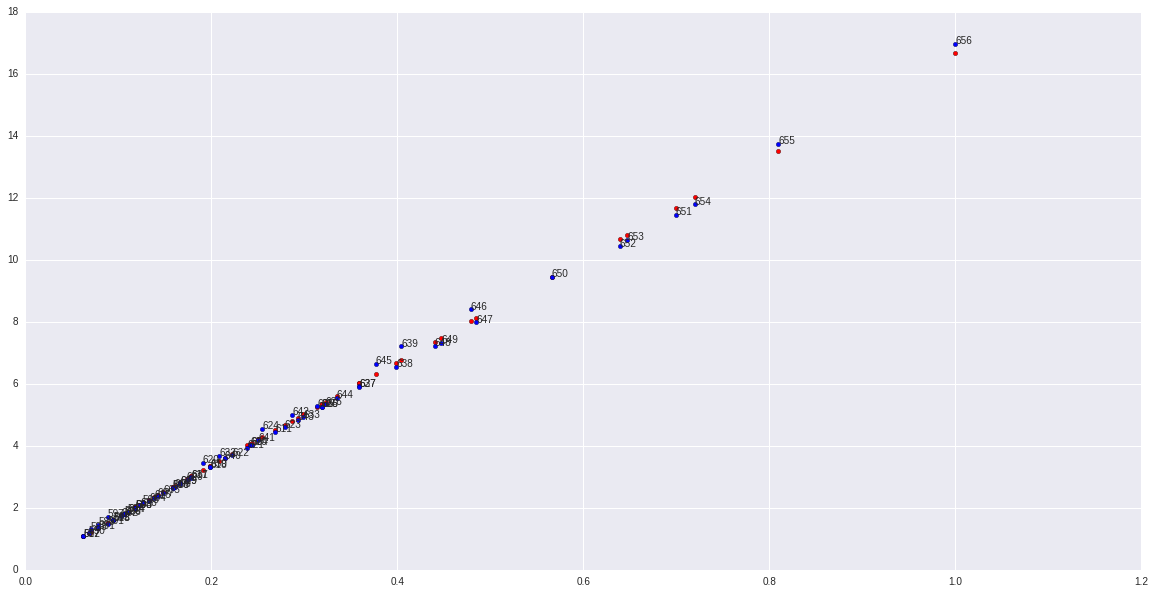

47


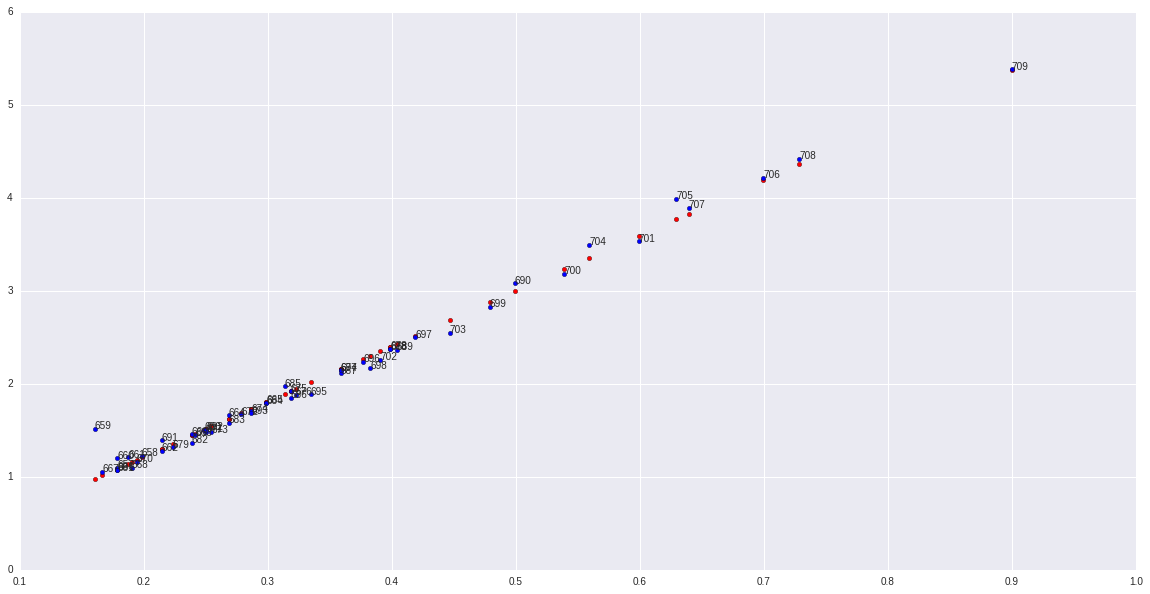

48


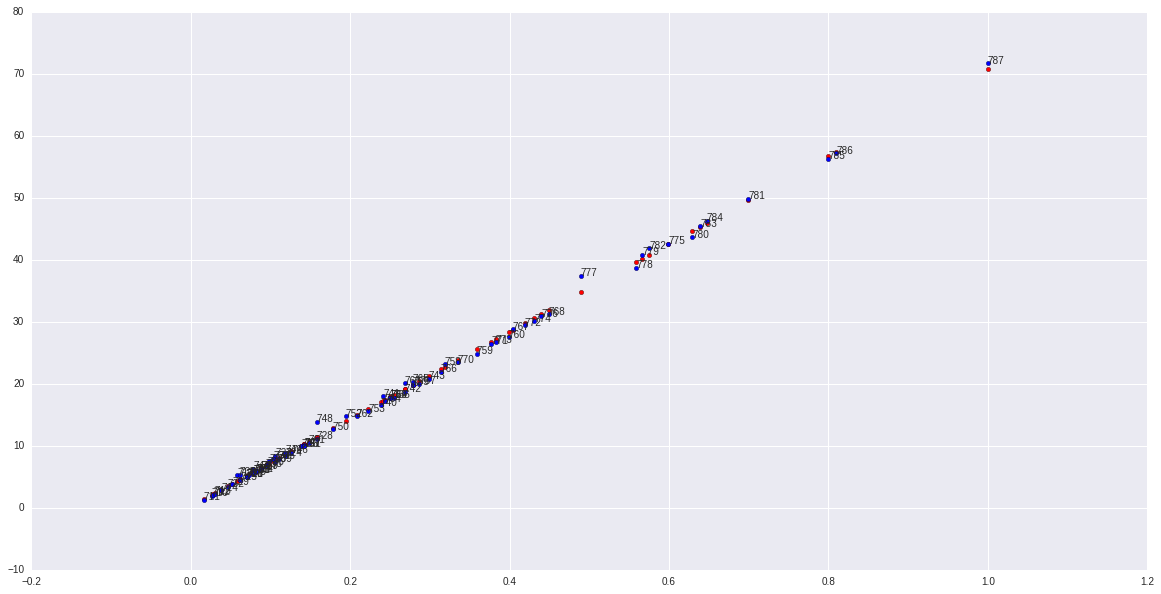

49


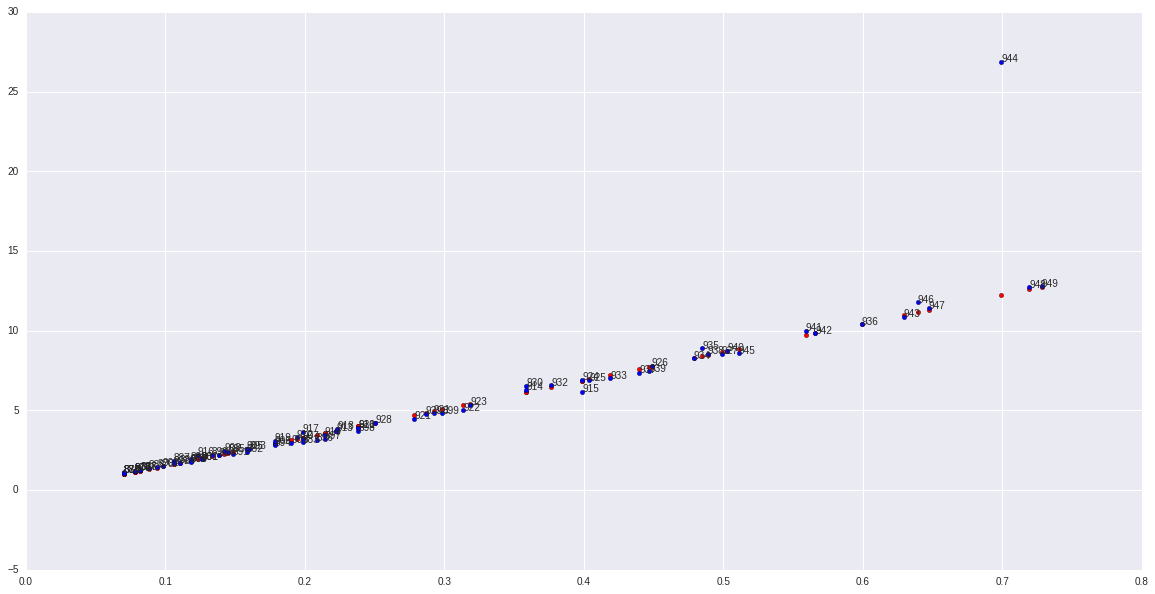

50


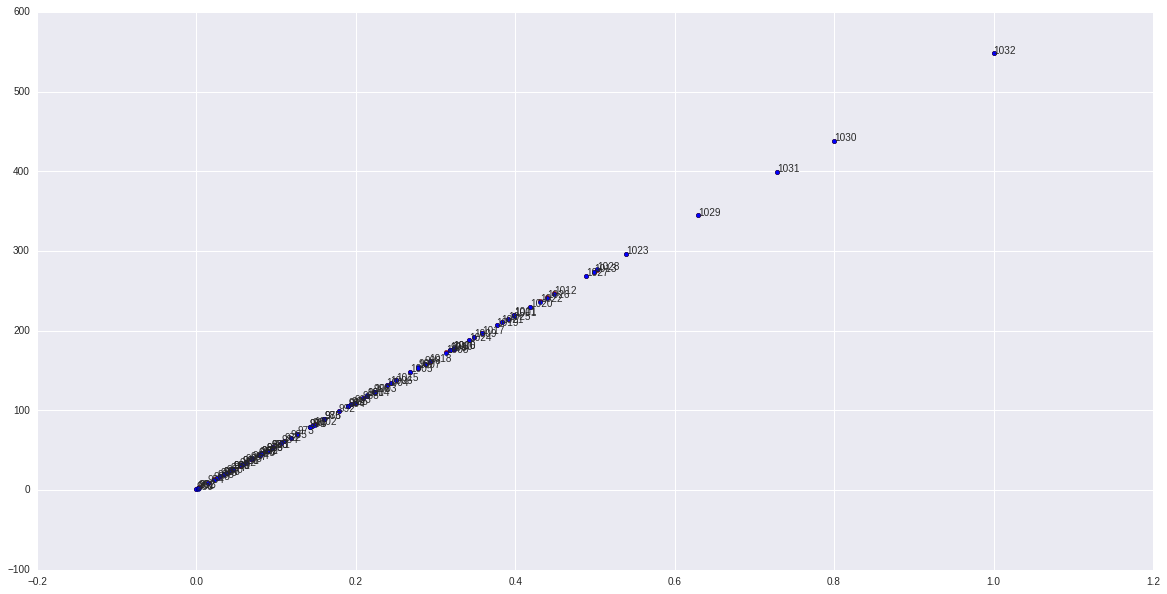

51


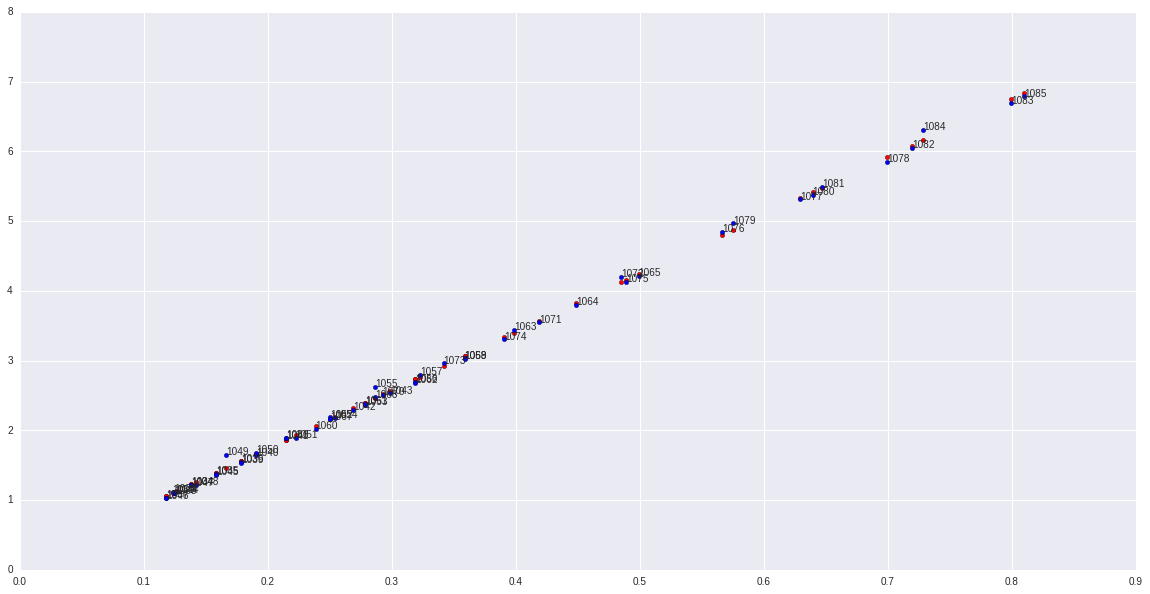

52


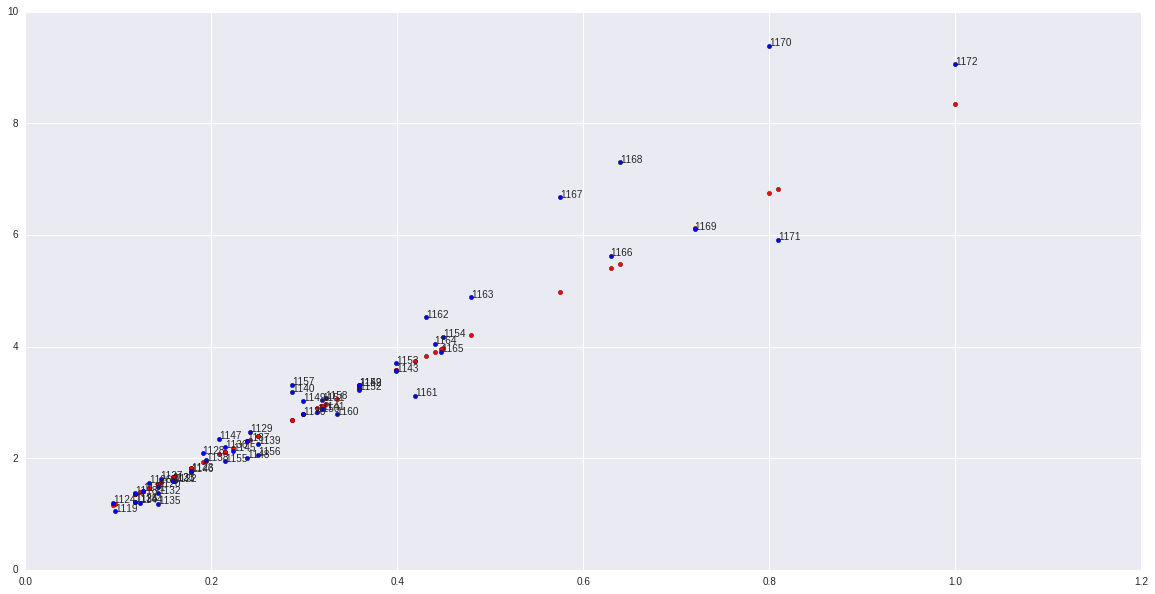

53


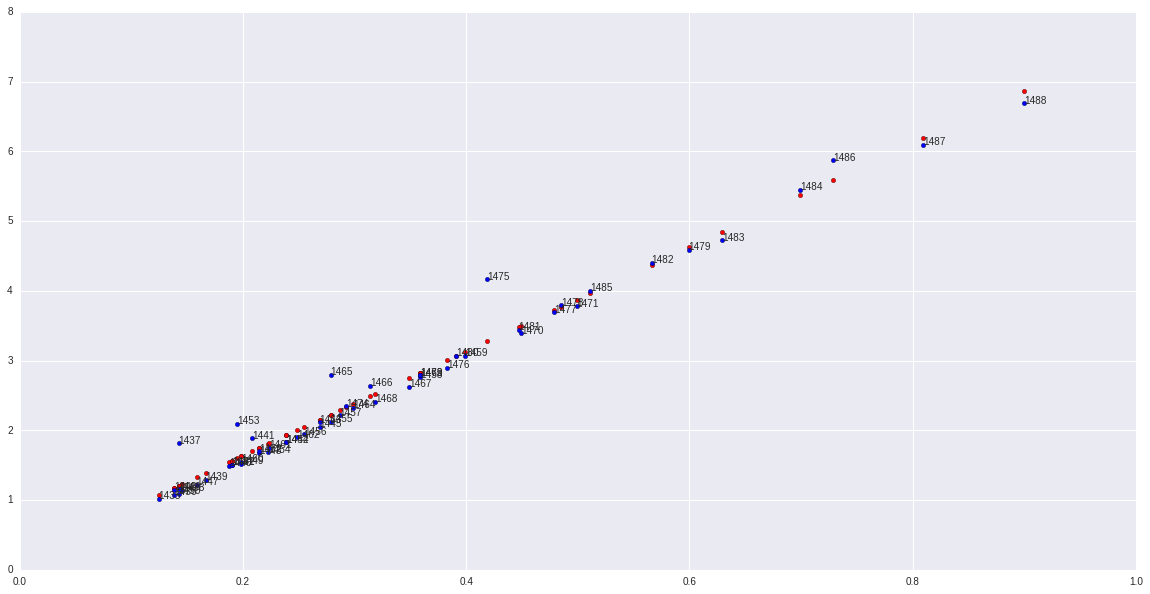

54


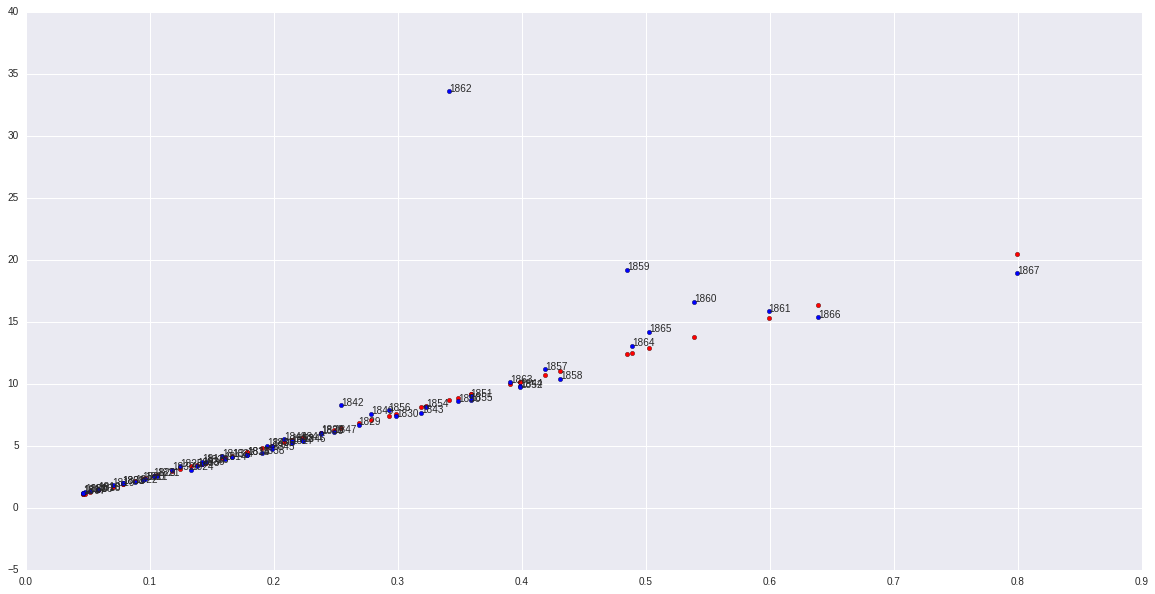

55


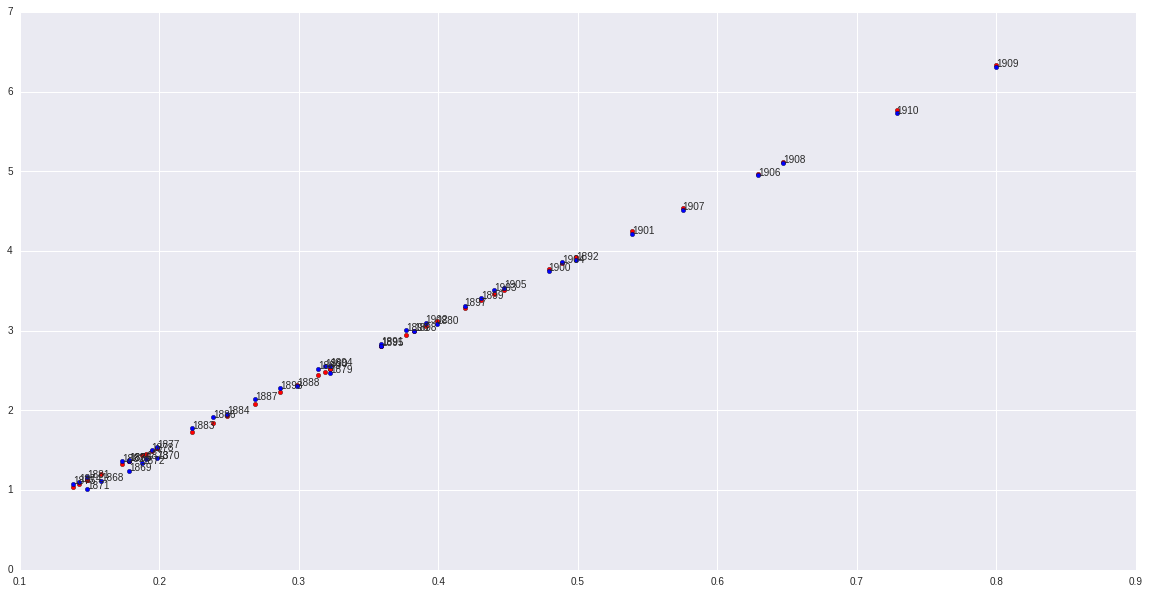

56


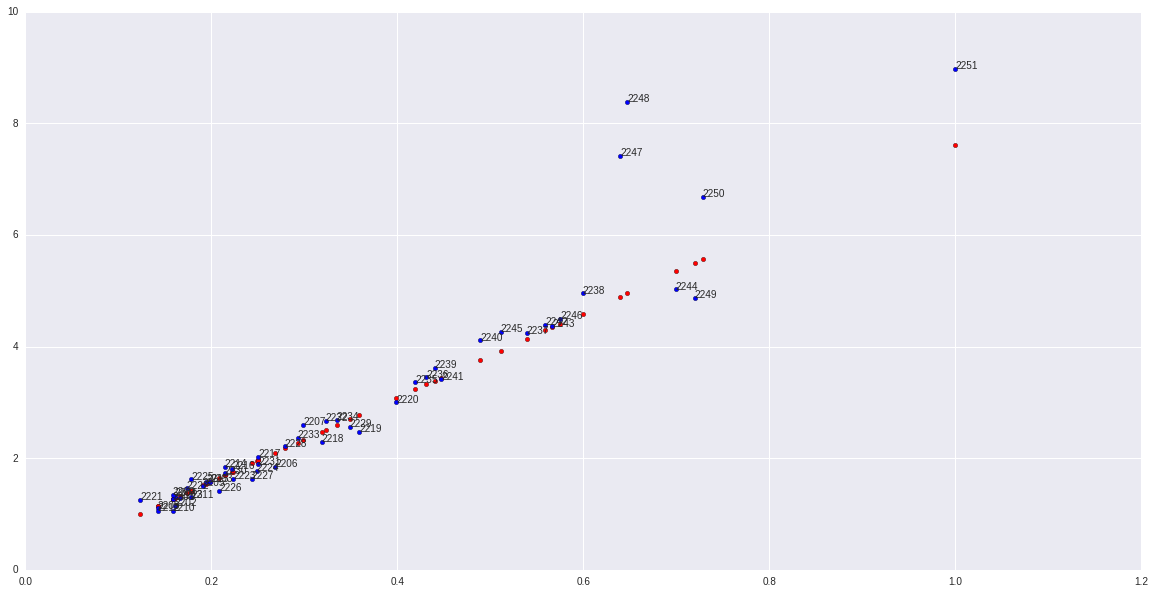

57


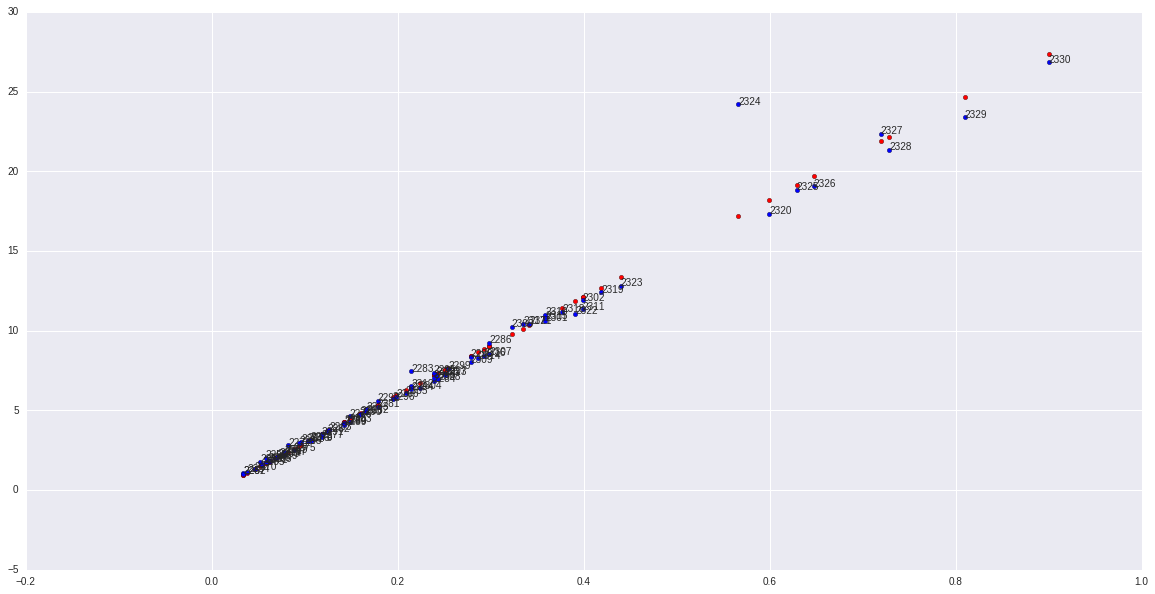

58


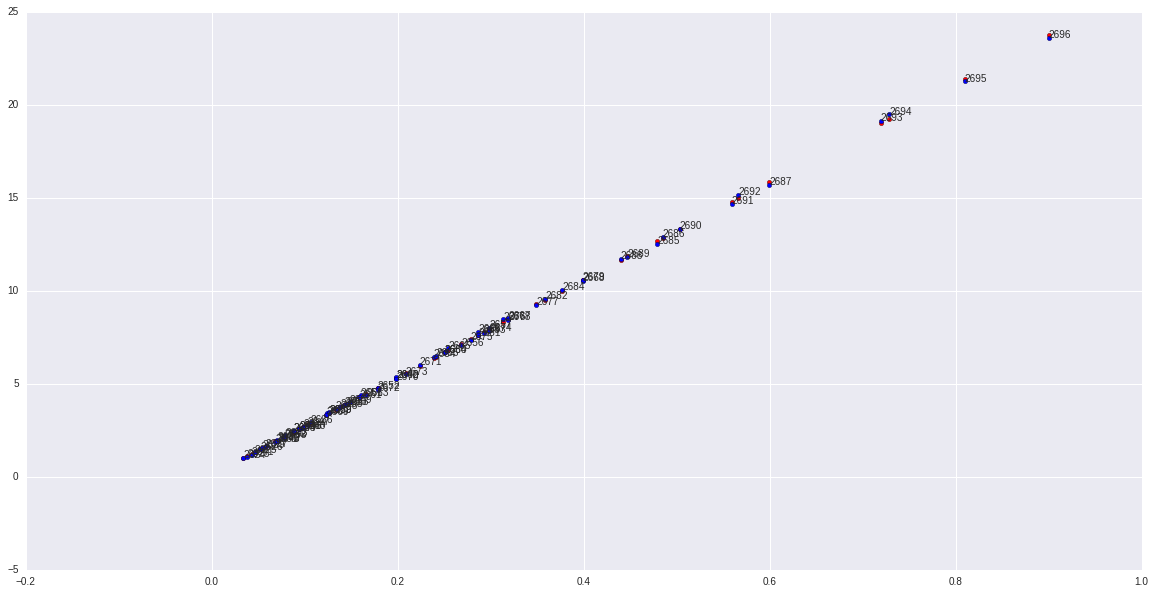

59


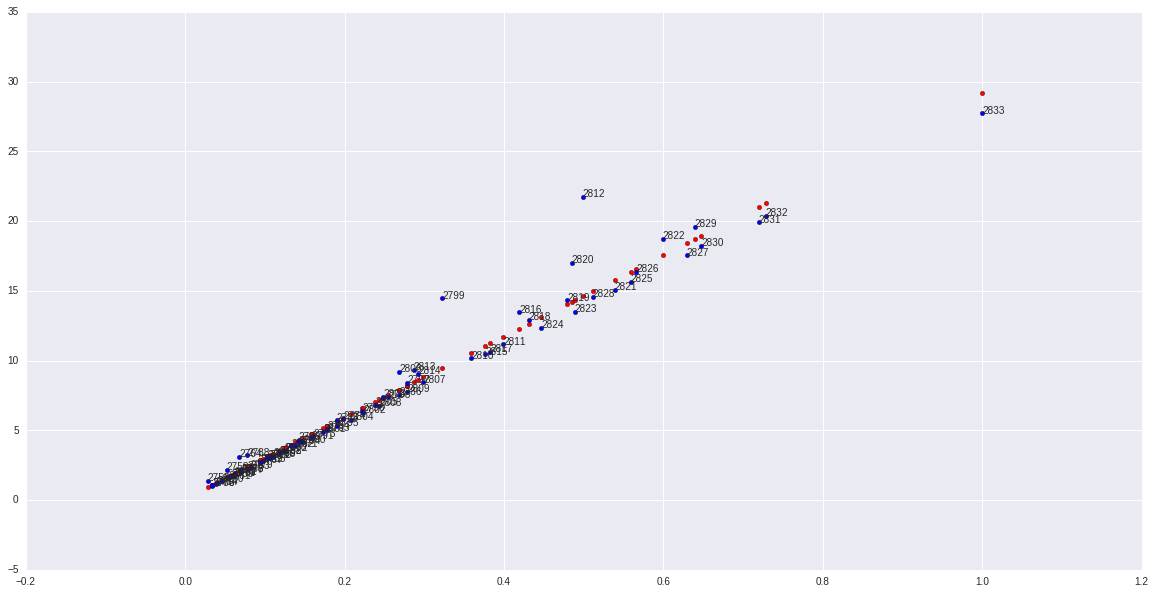

60


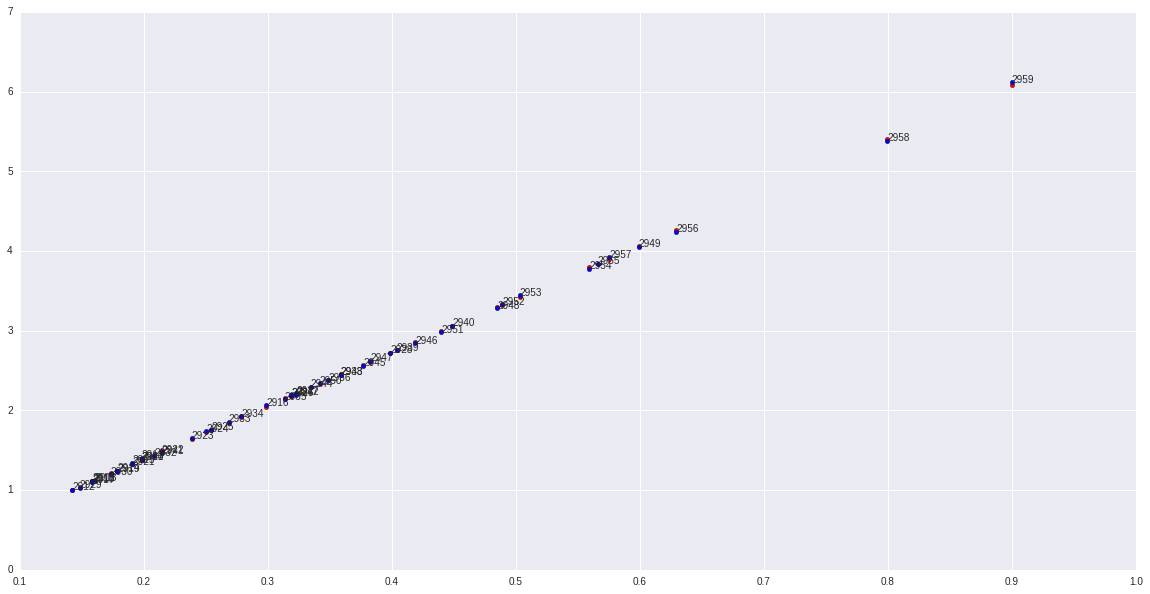

61


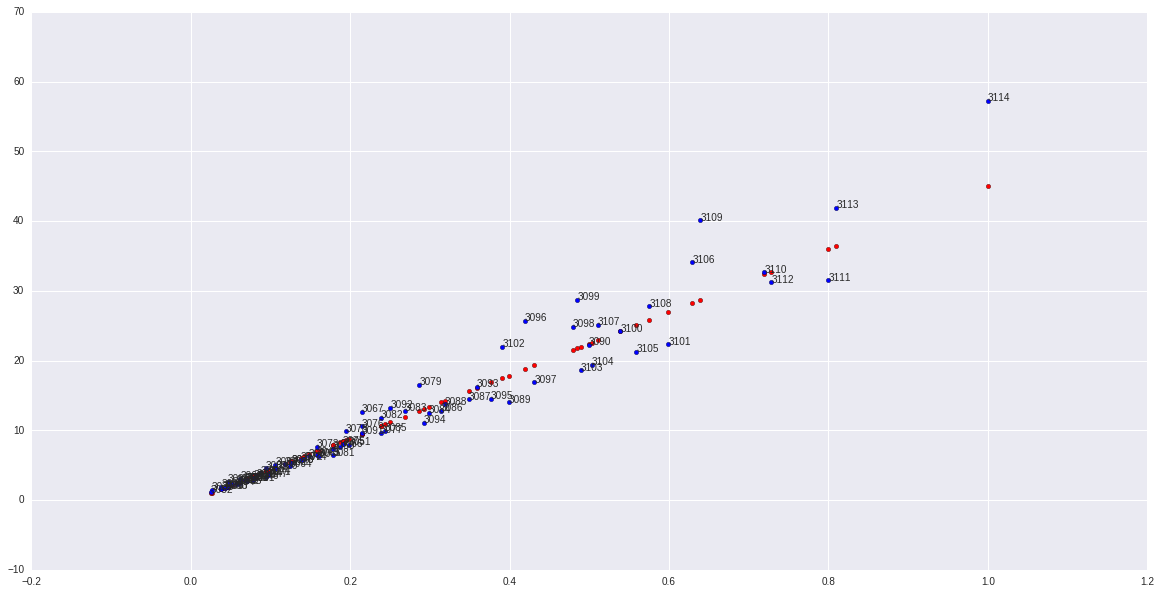

62


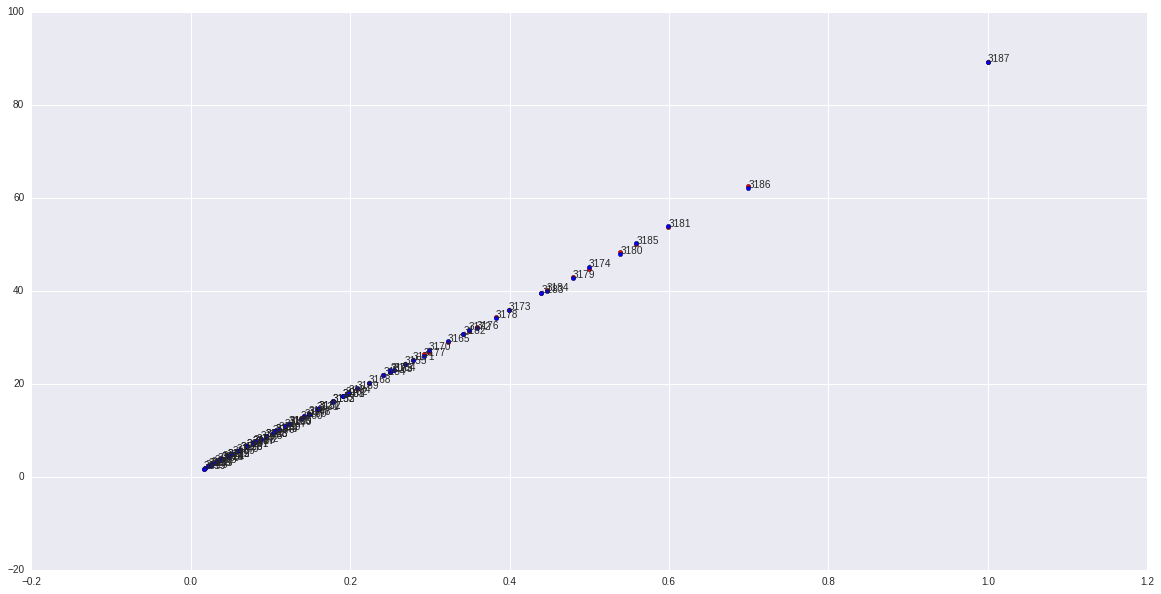

63


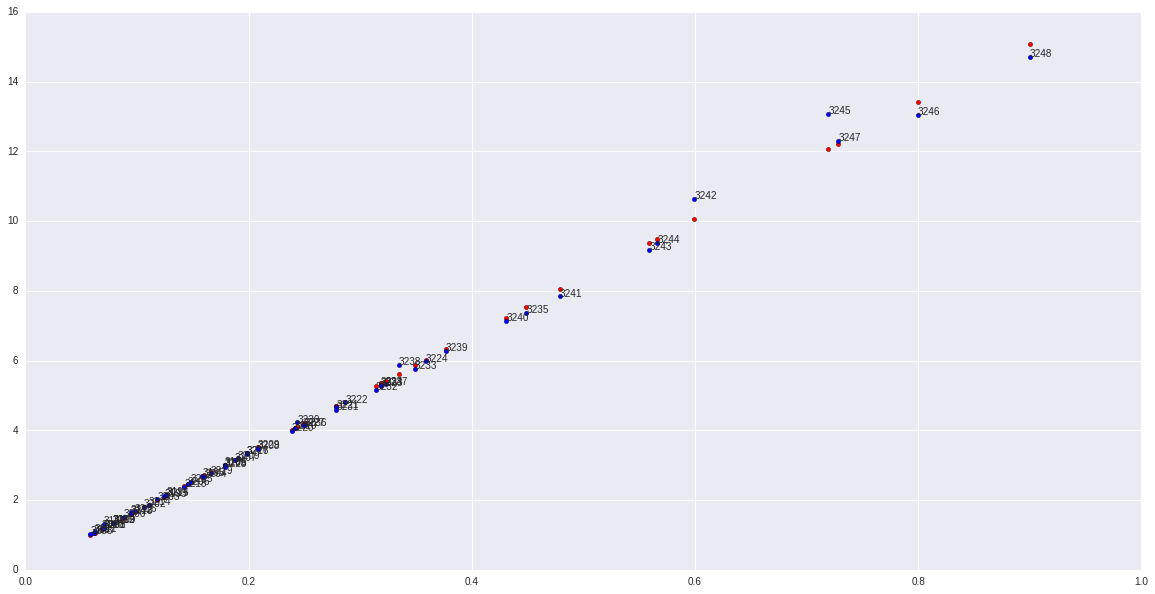

64


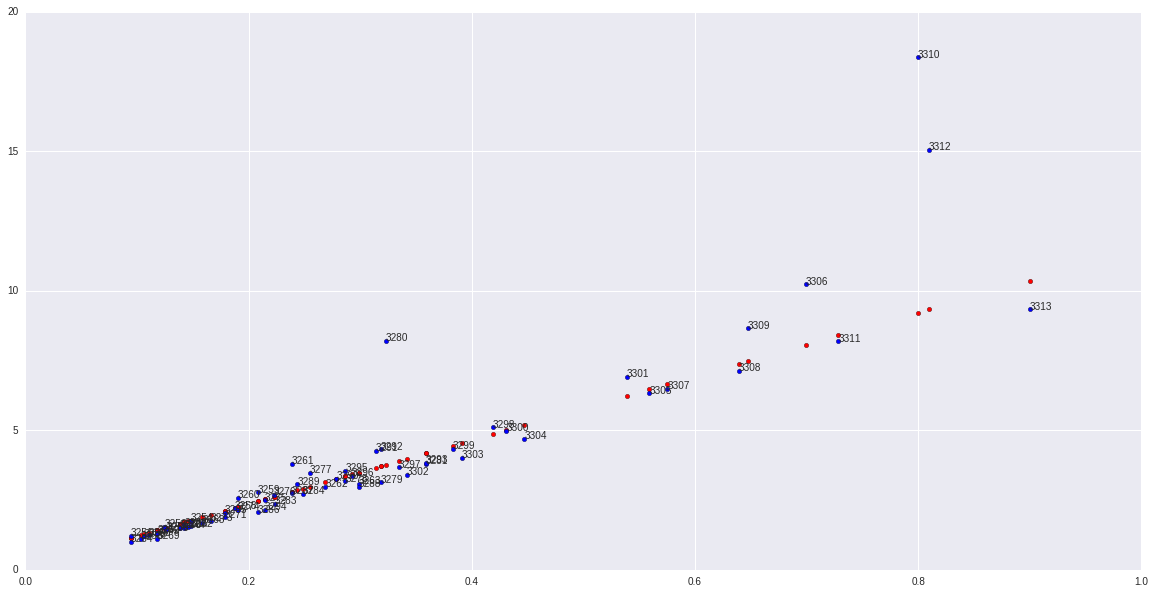

65


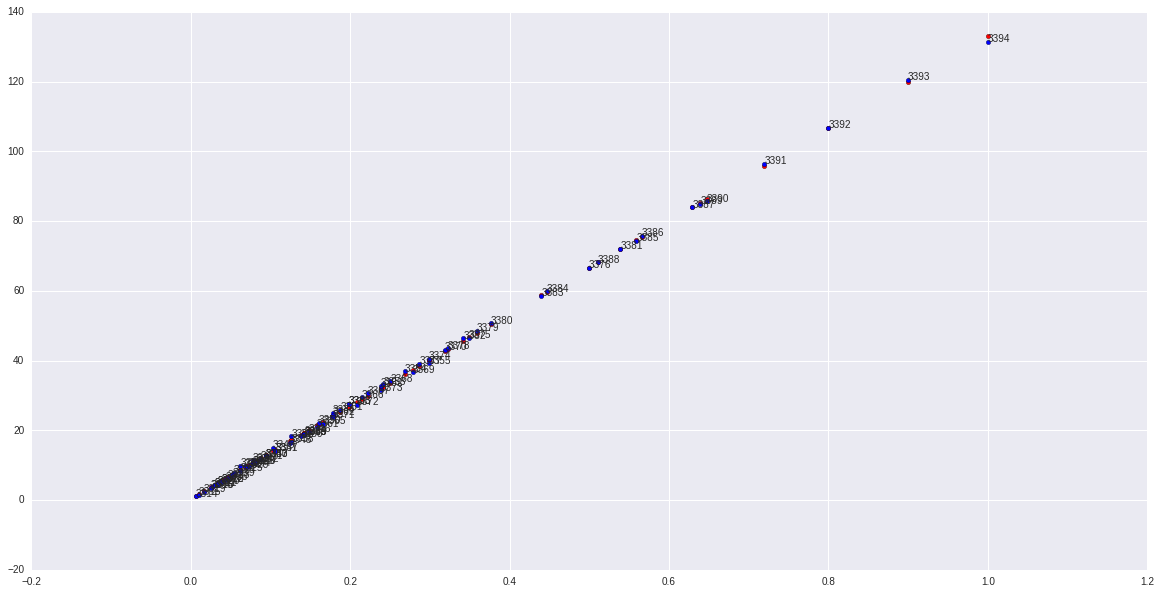

66


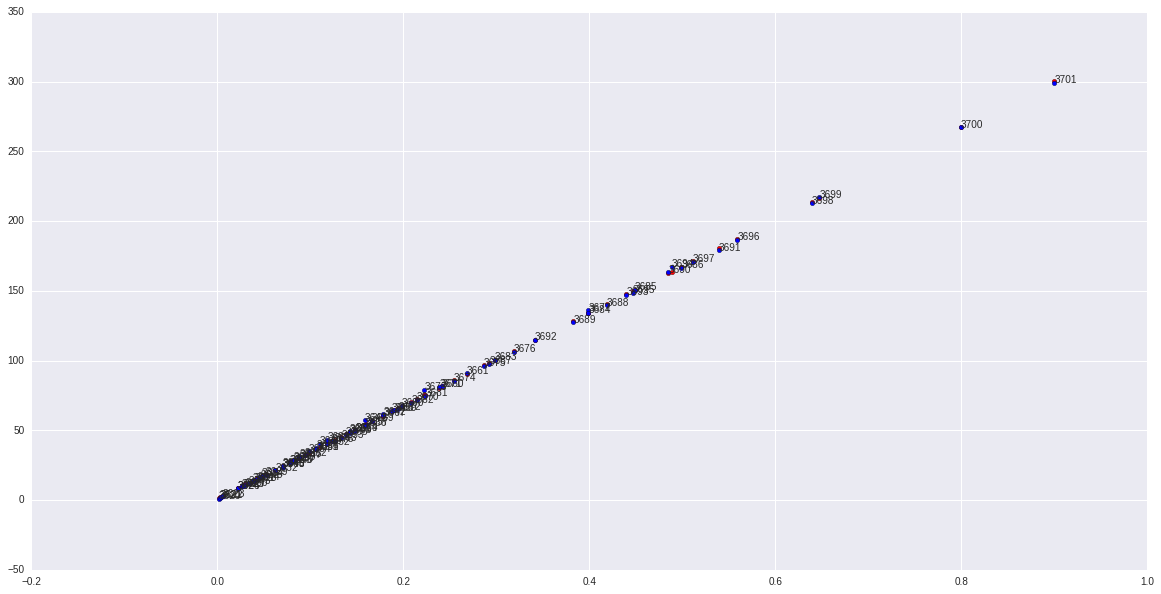

67


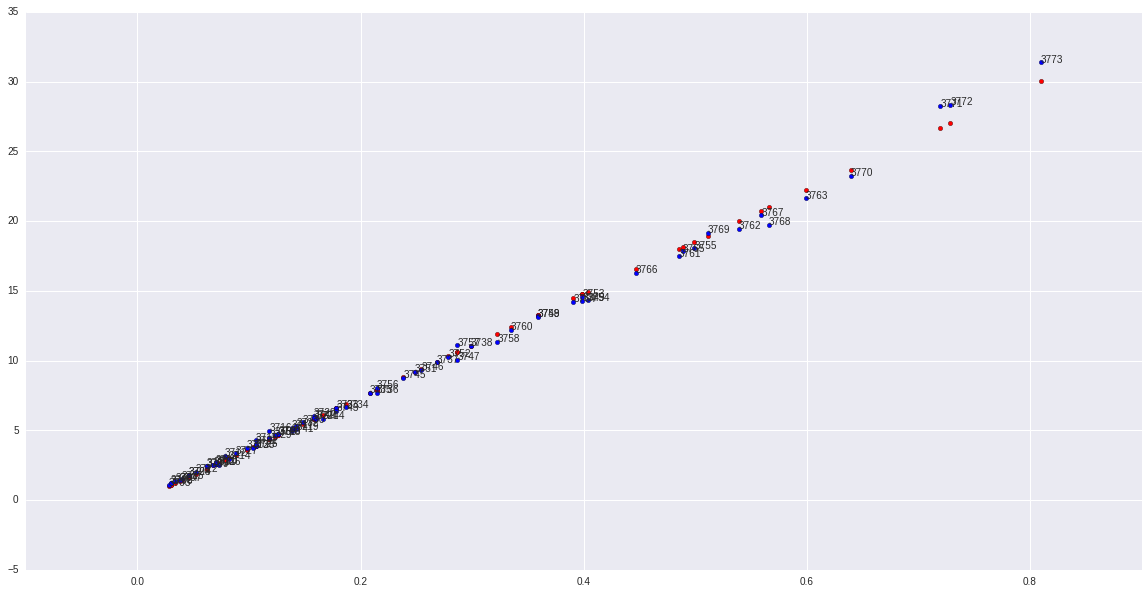

68


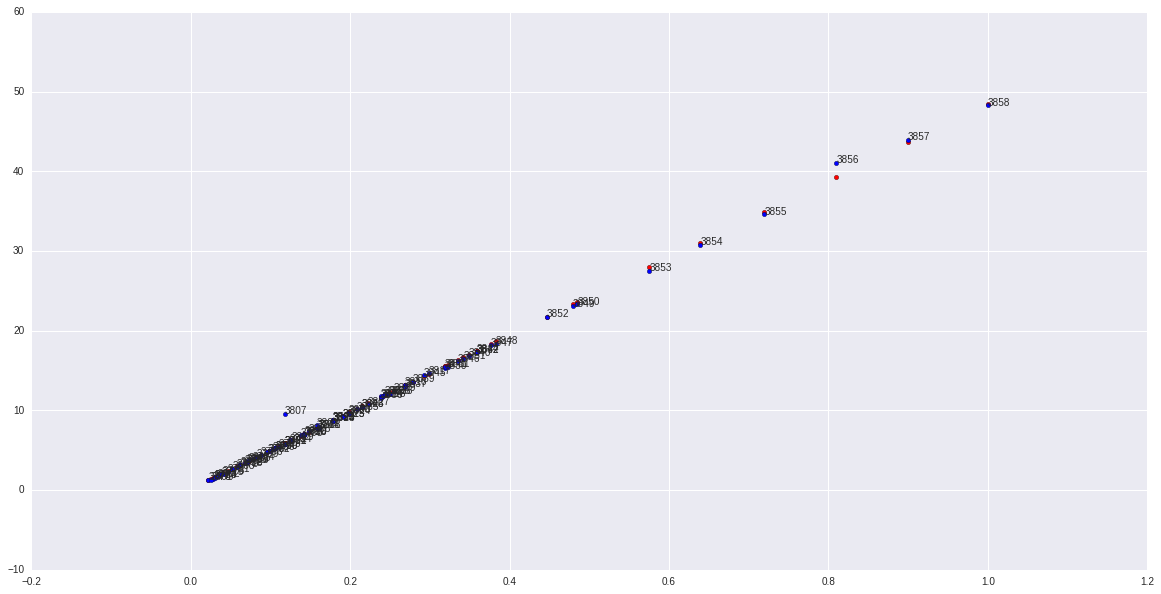

69


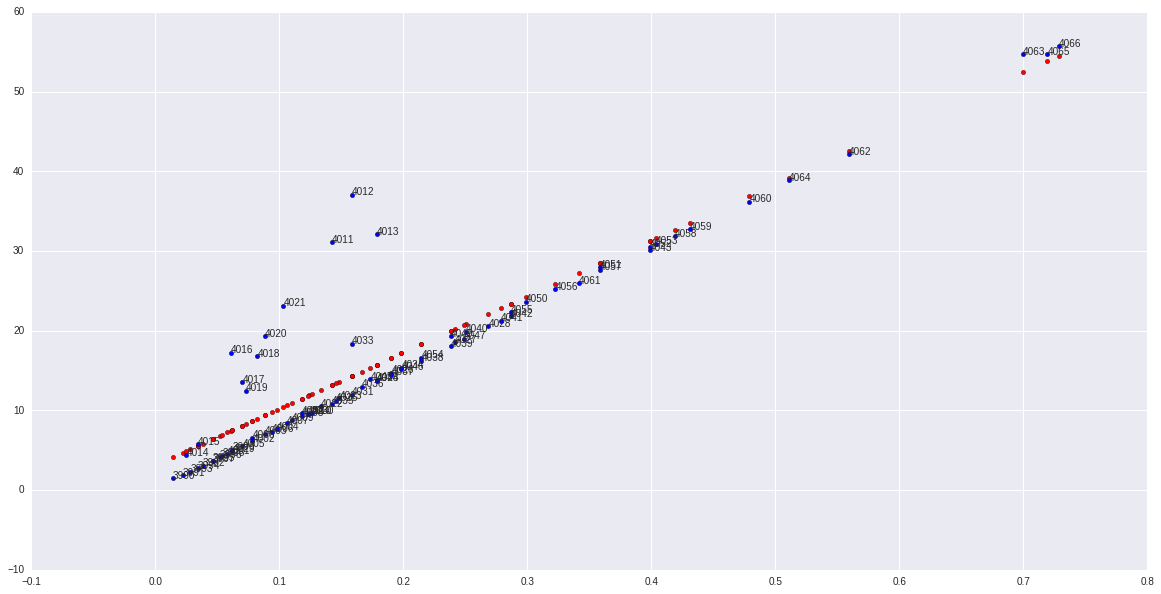

70


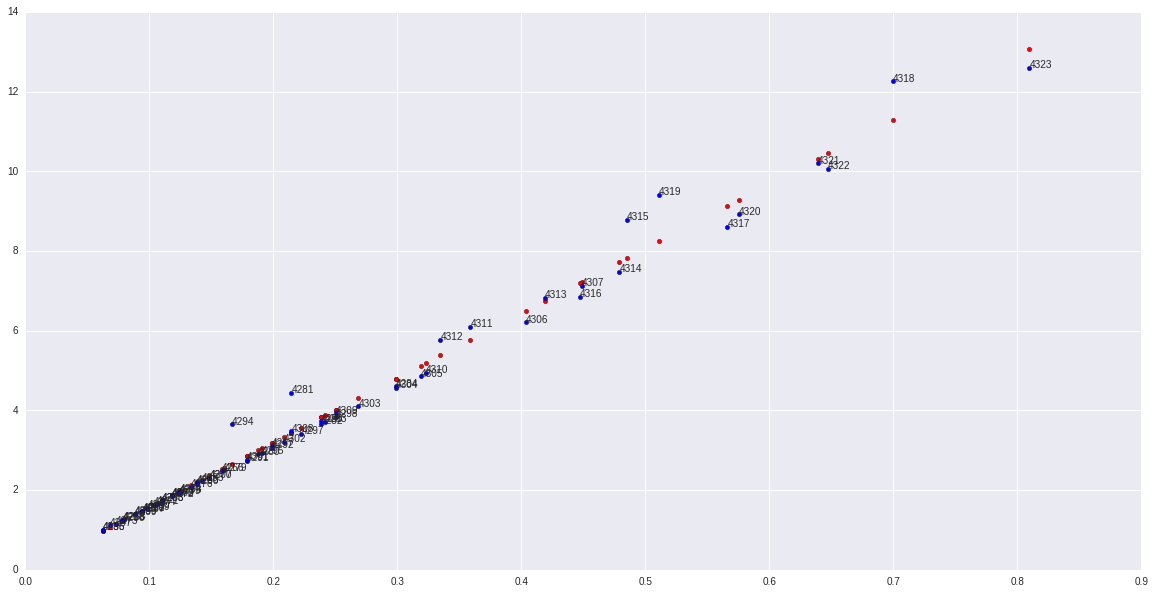

71


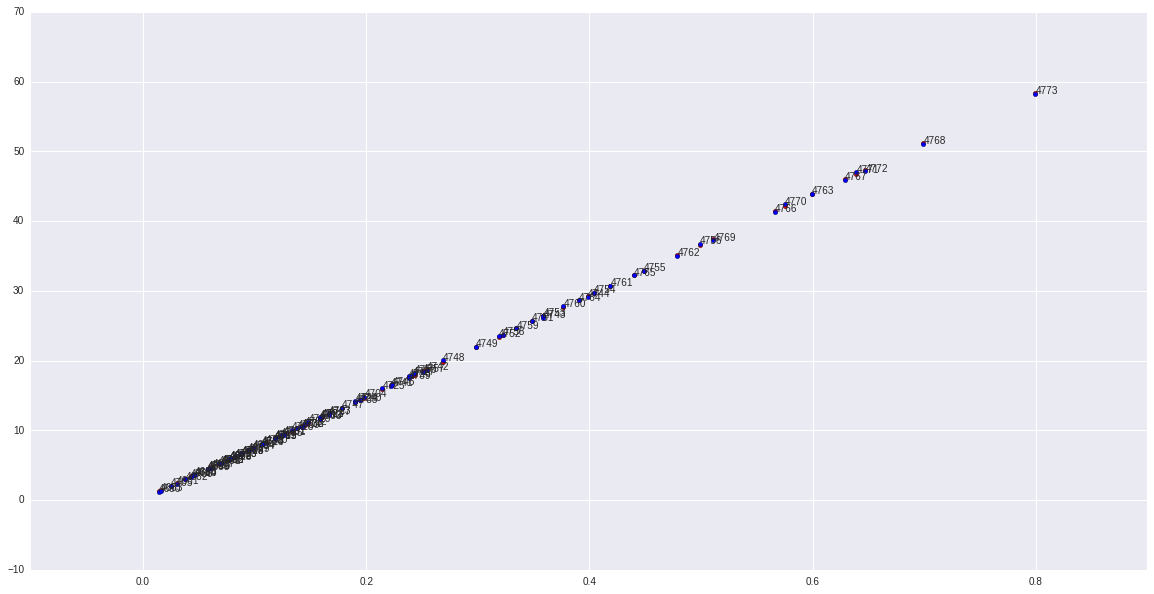

72


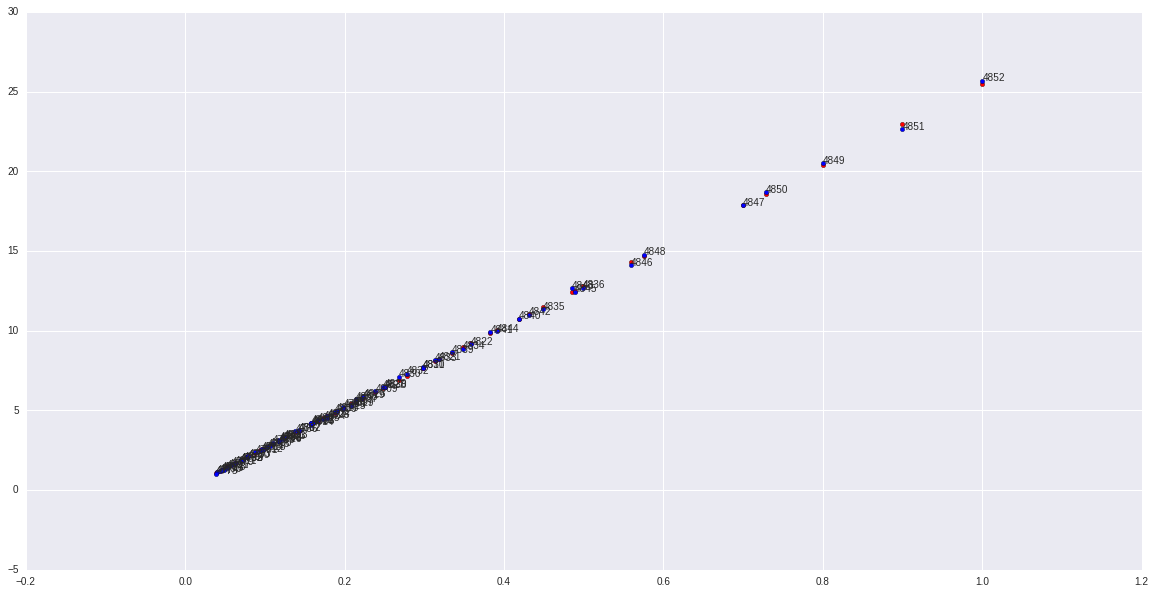

73


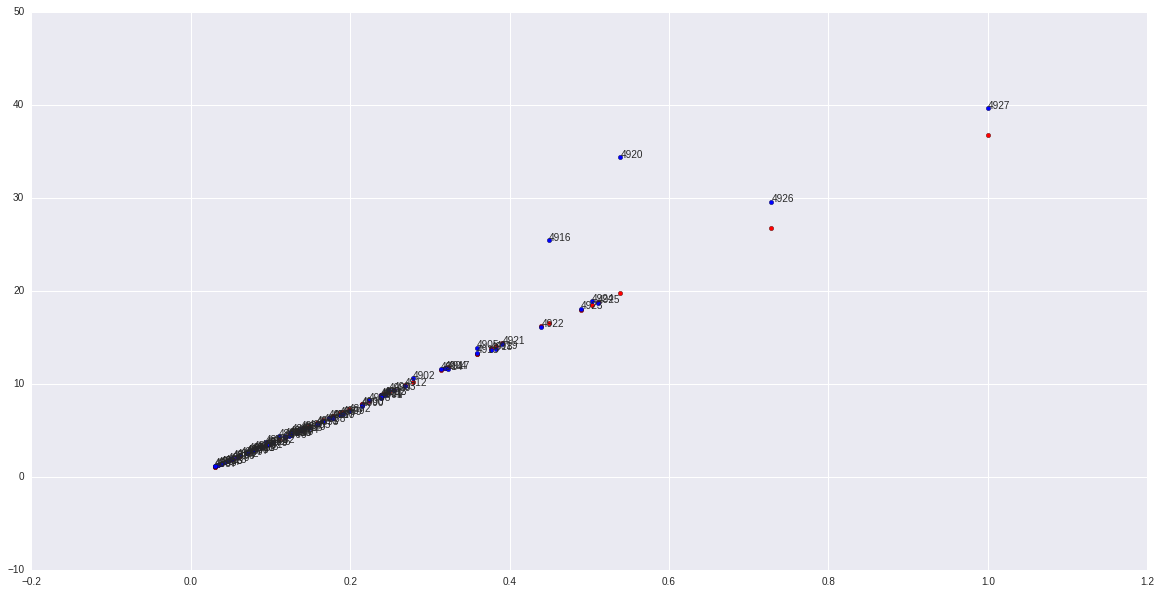

74


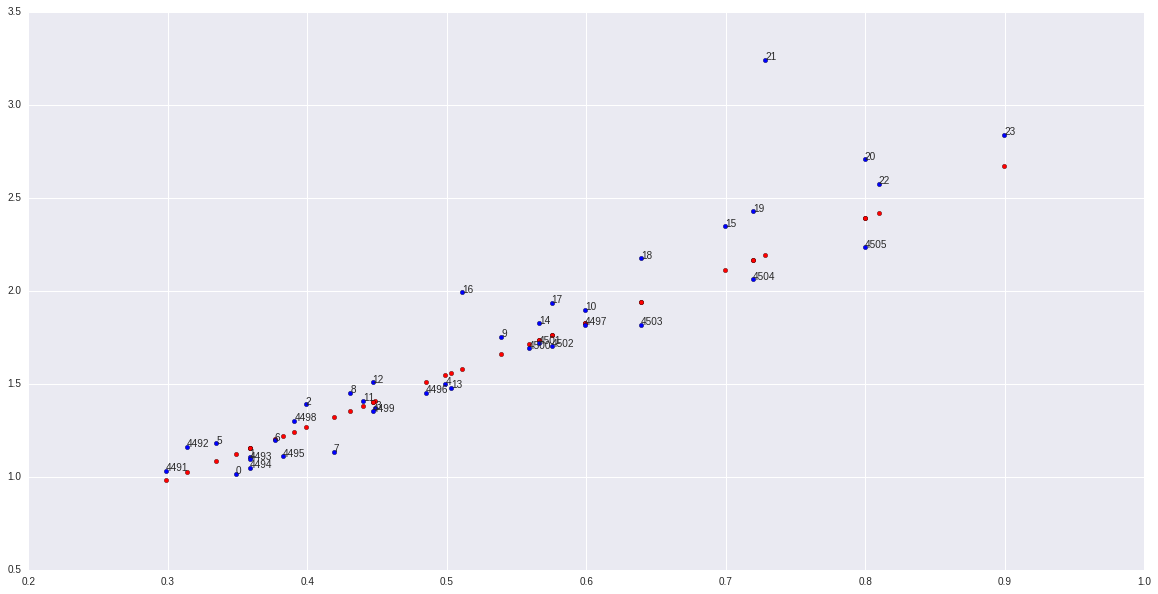

75


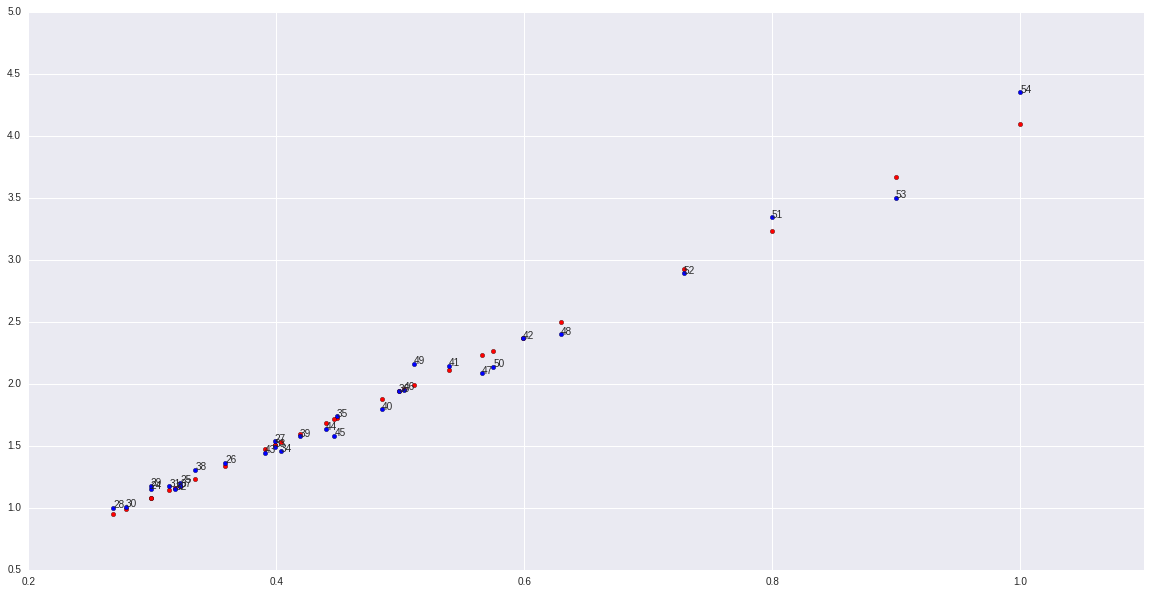

76


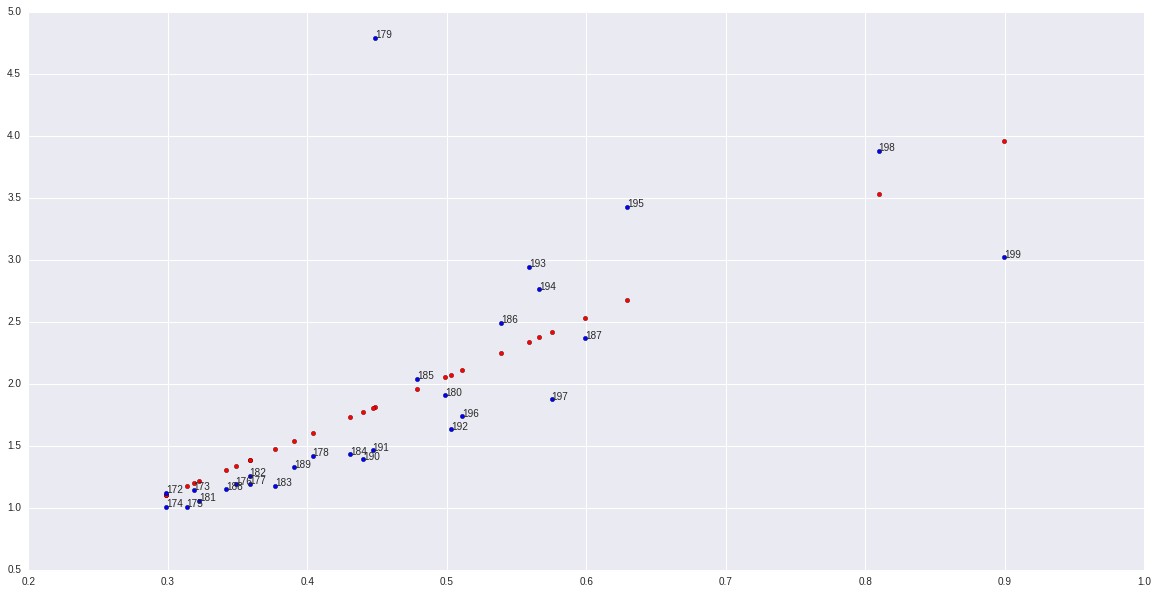

77


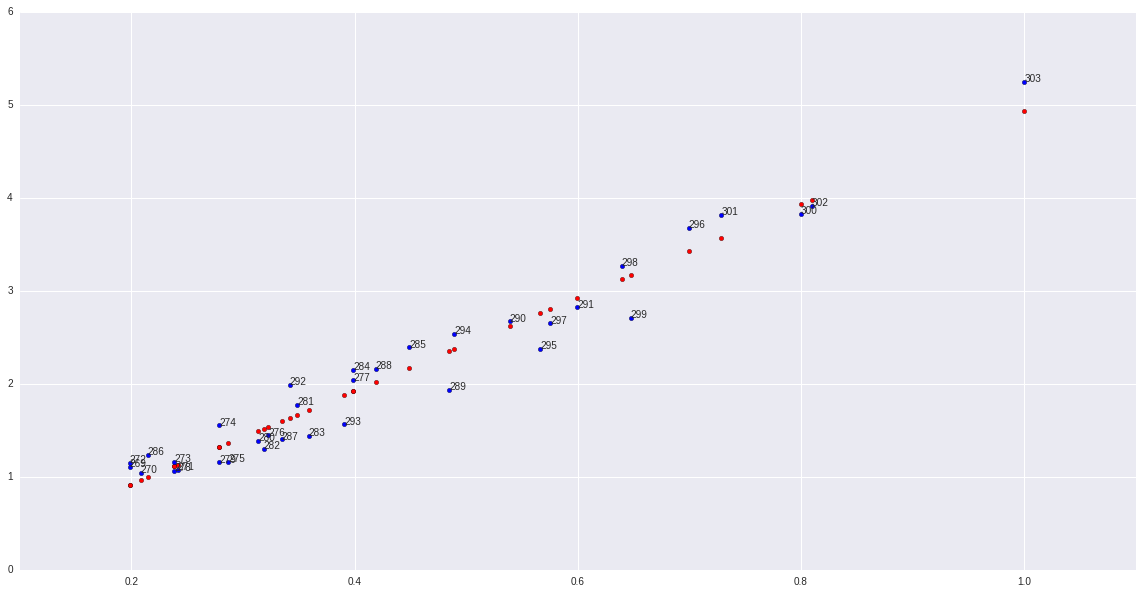

78


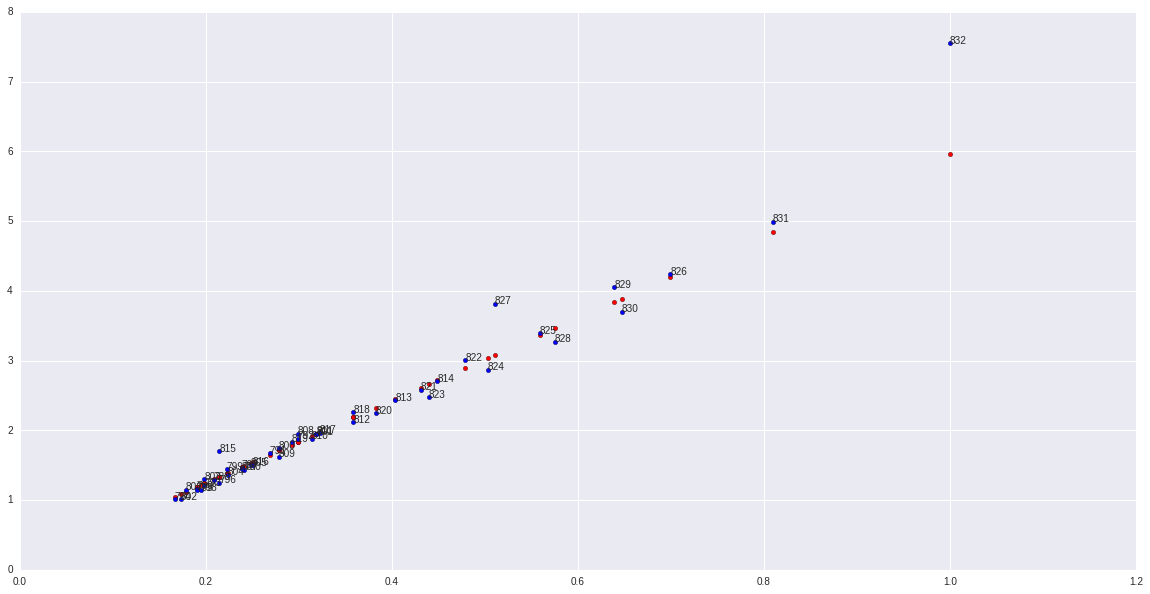

79


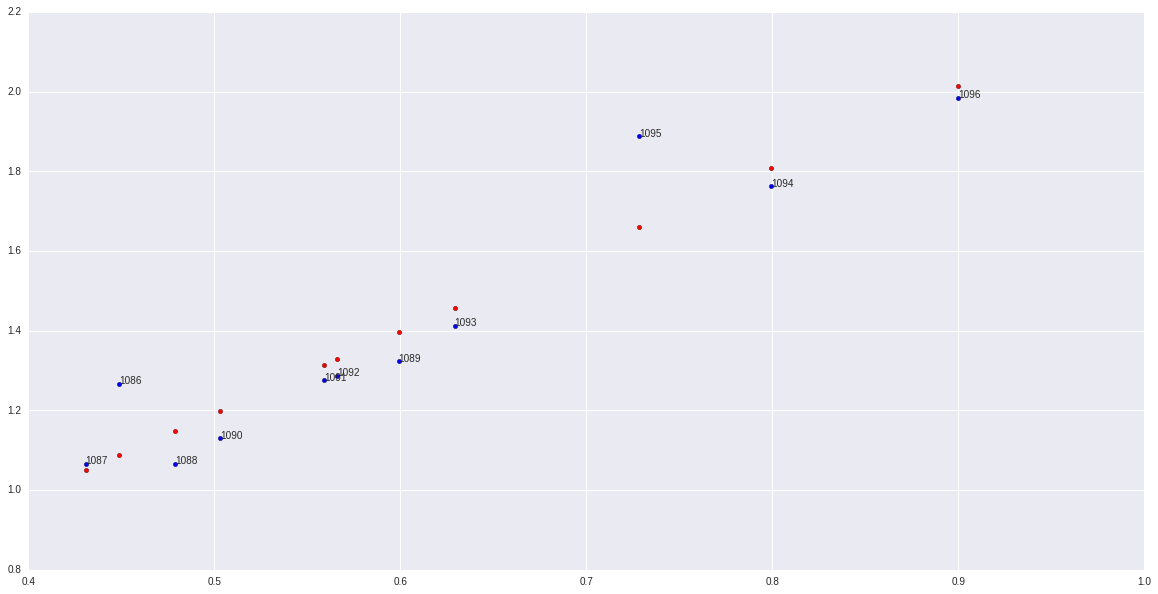

80


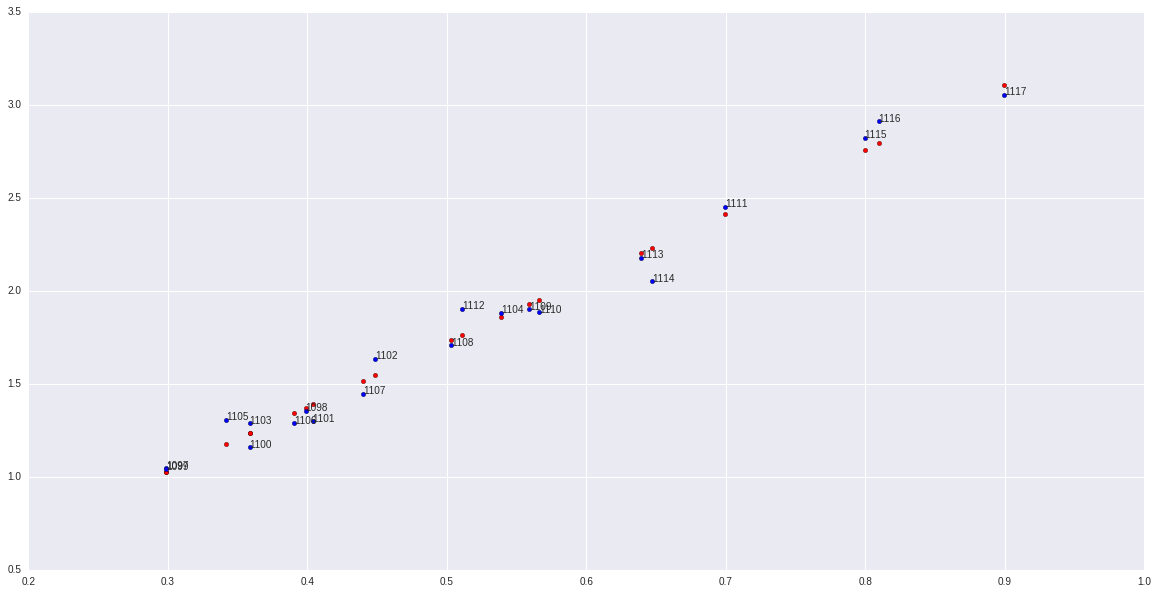

81


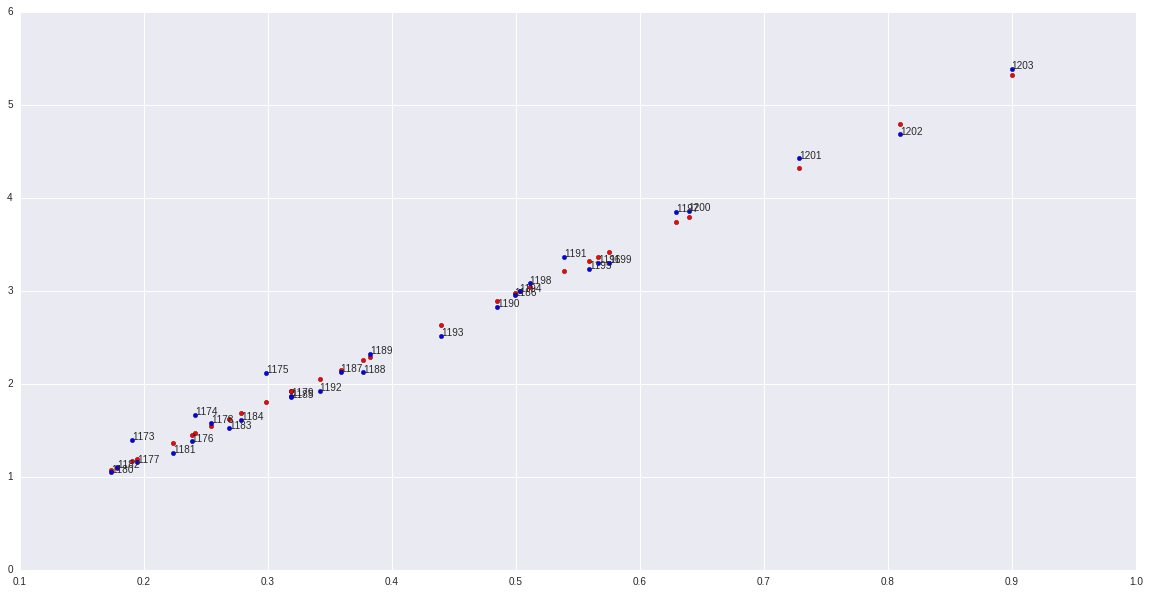

82


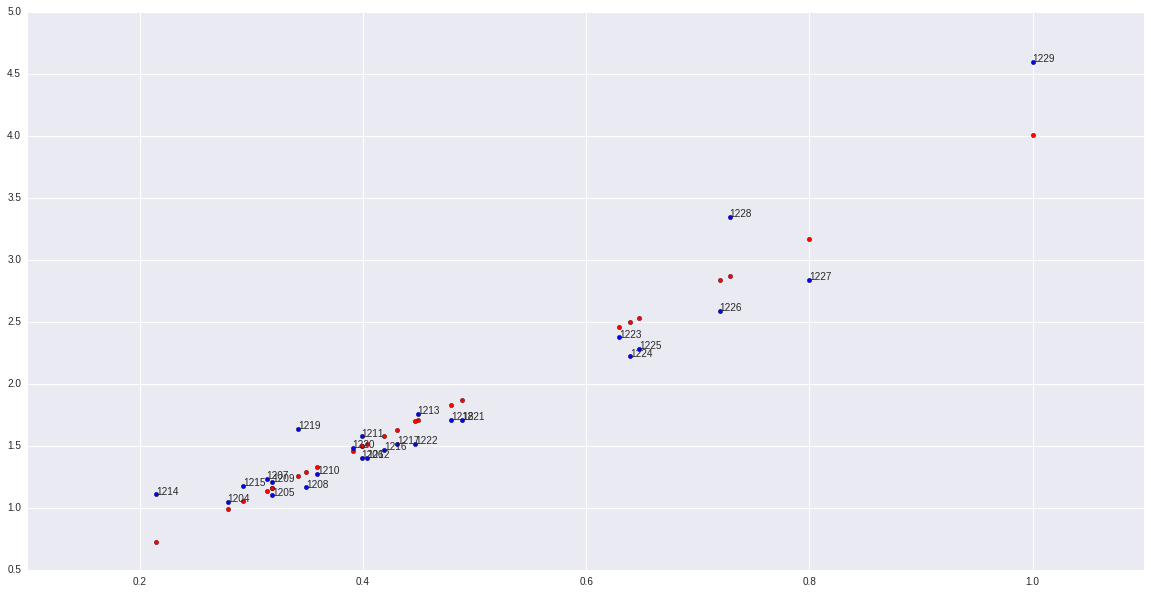

83


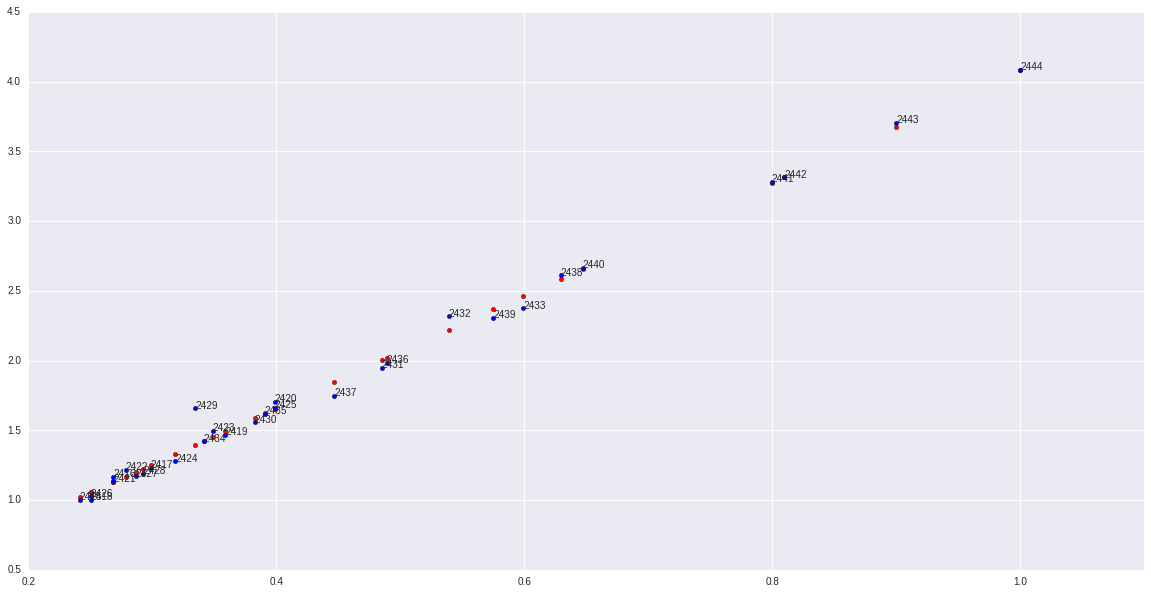

84


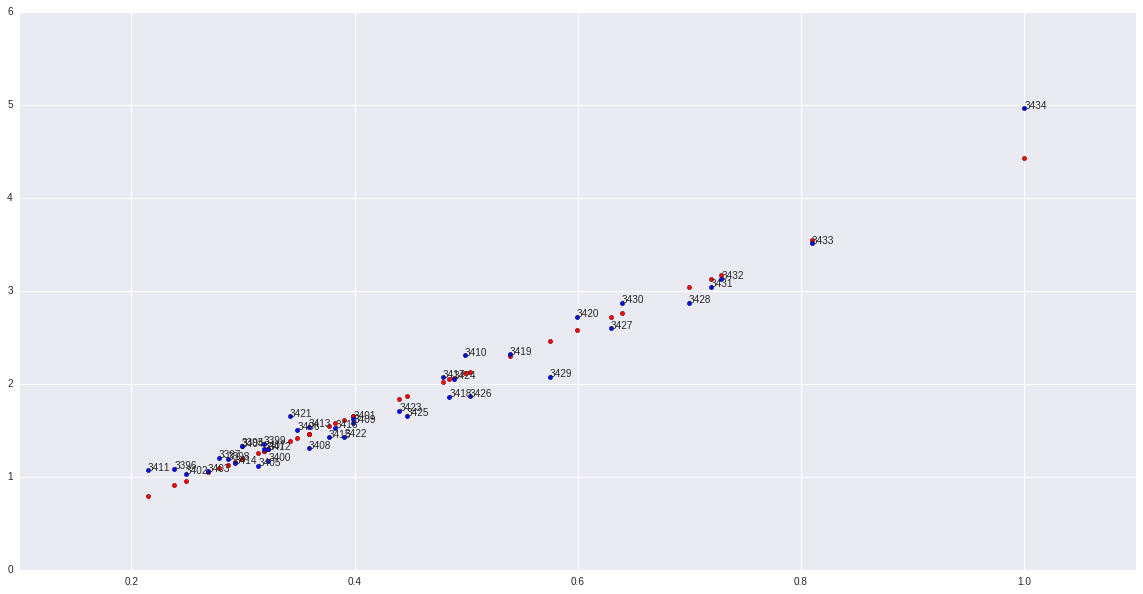

85


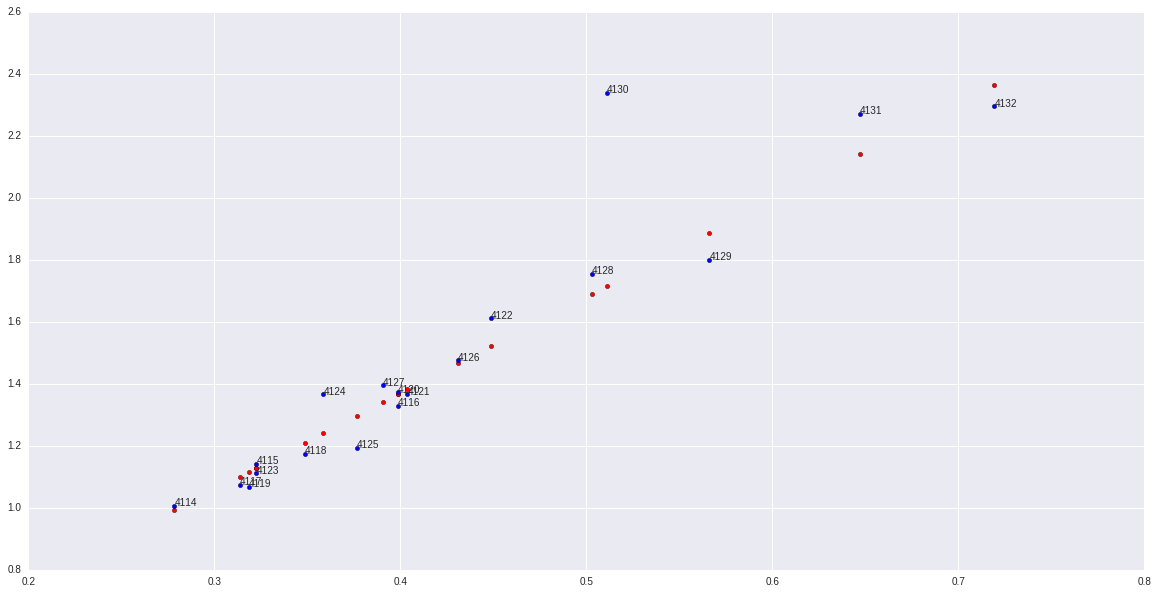

86


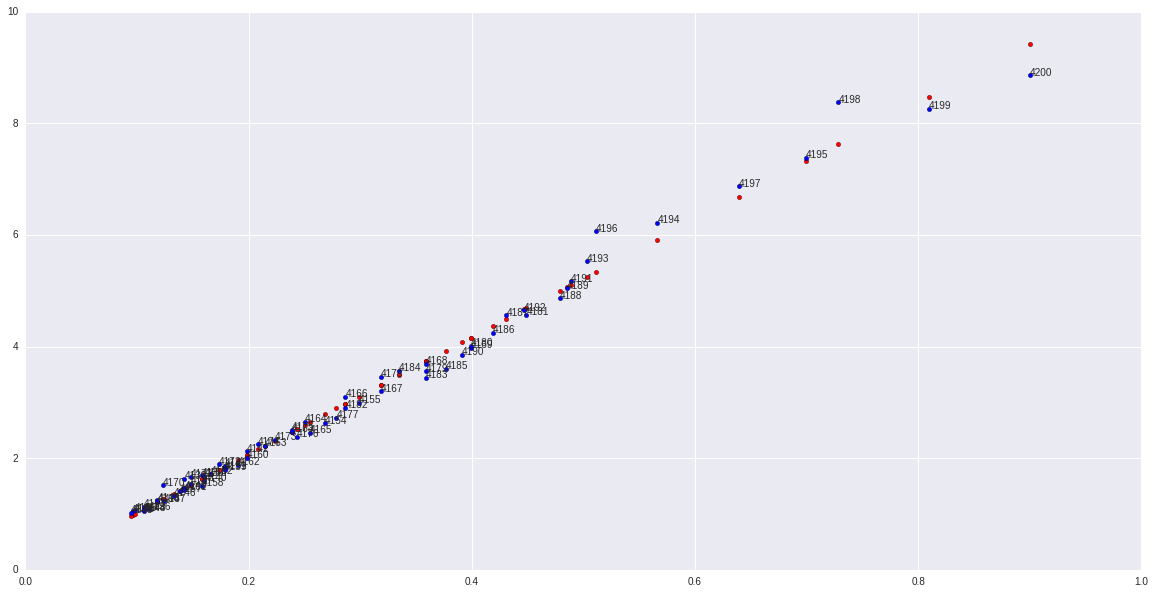

87


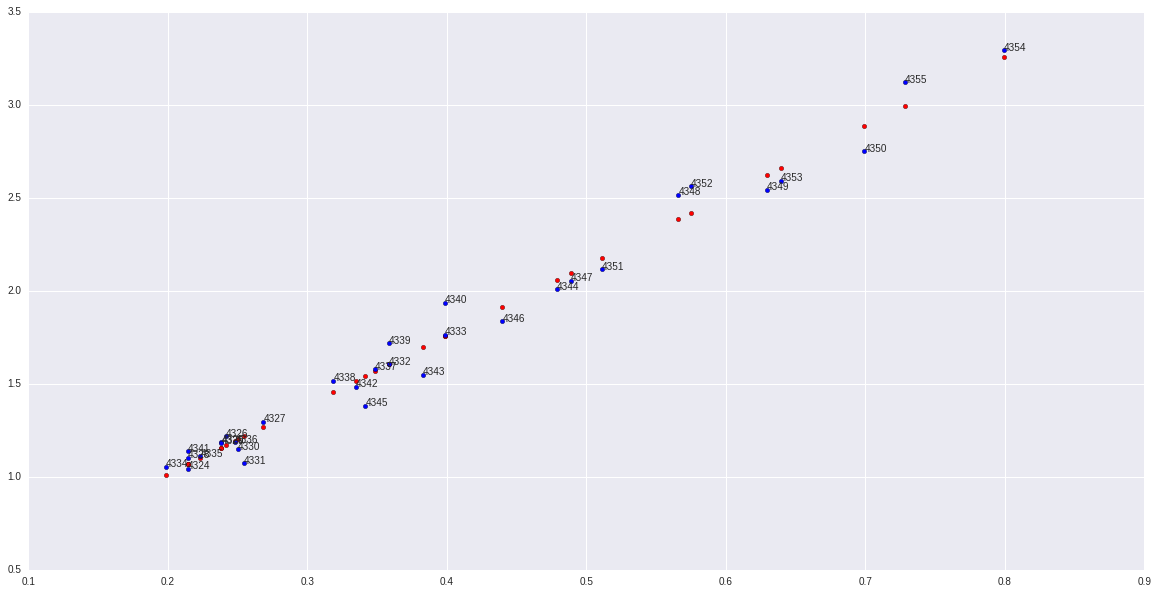

88


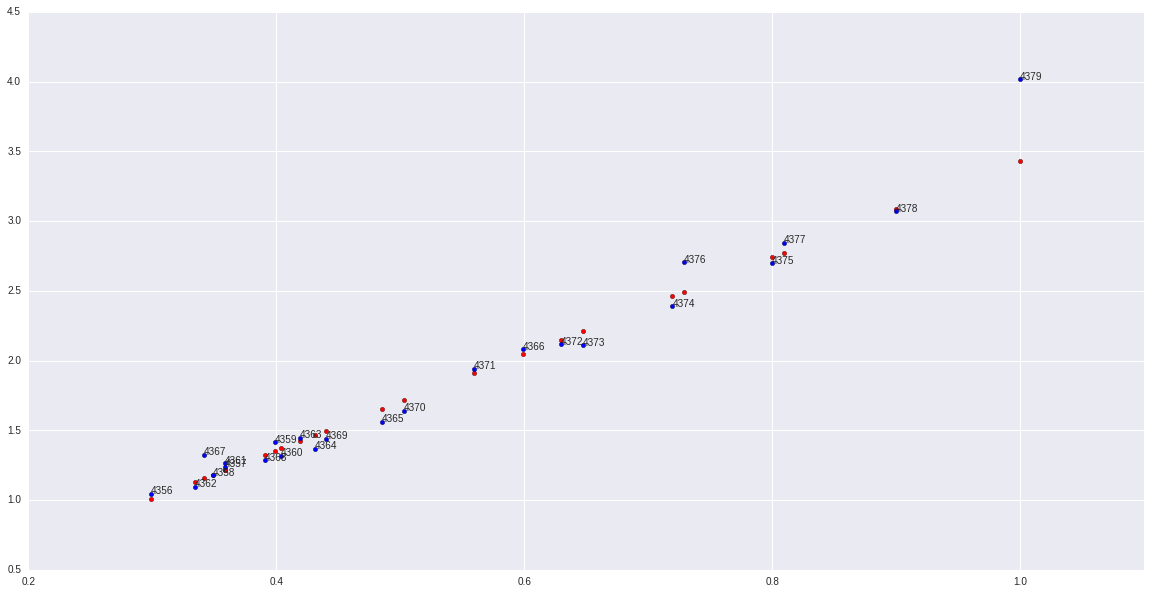

89


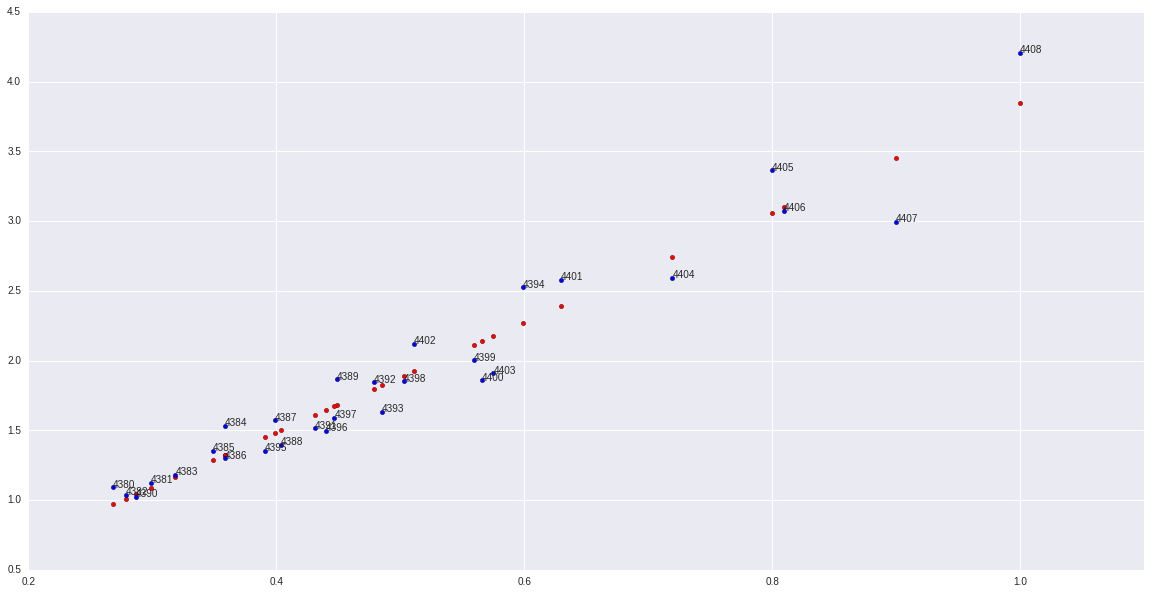

90


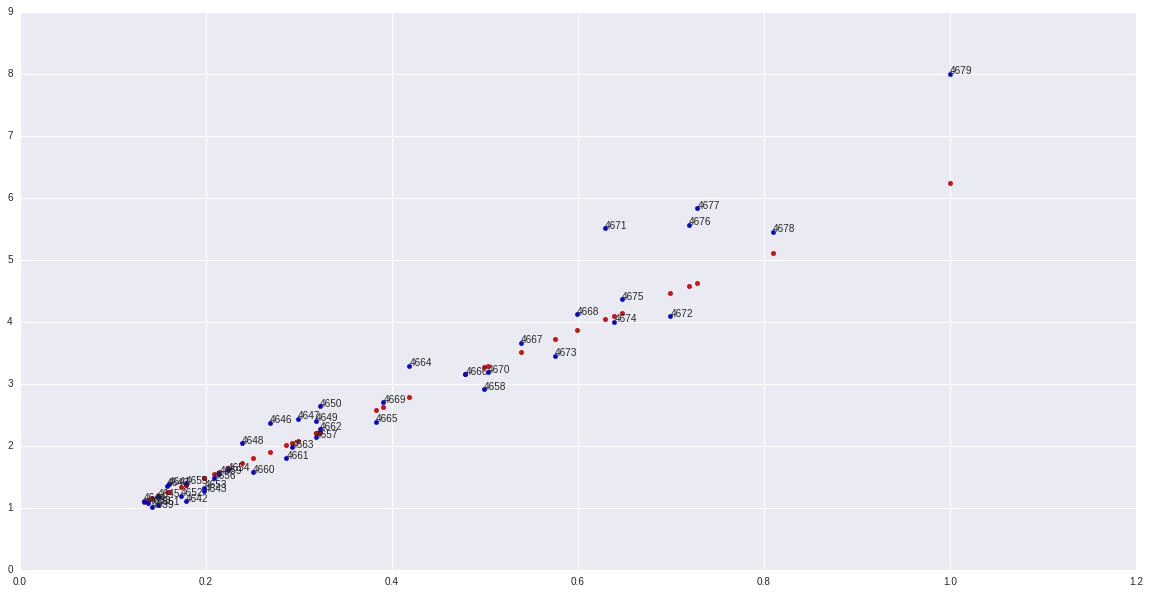

91


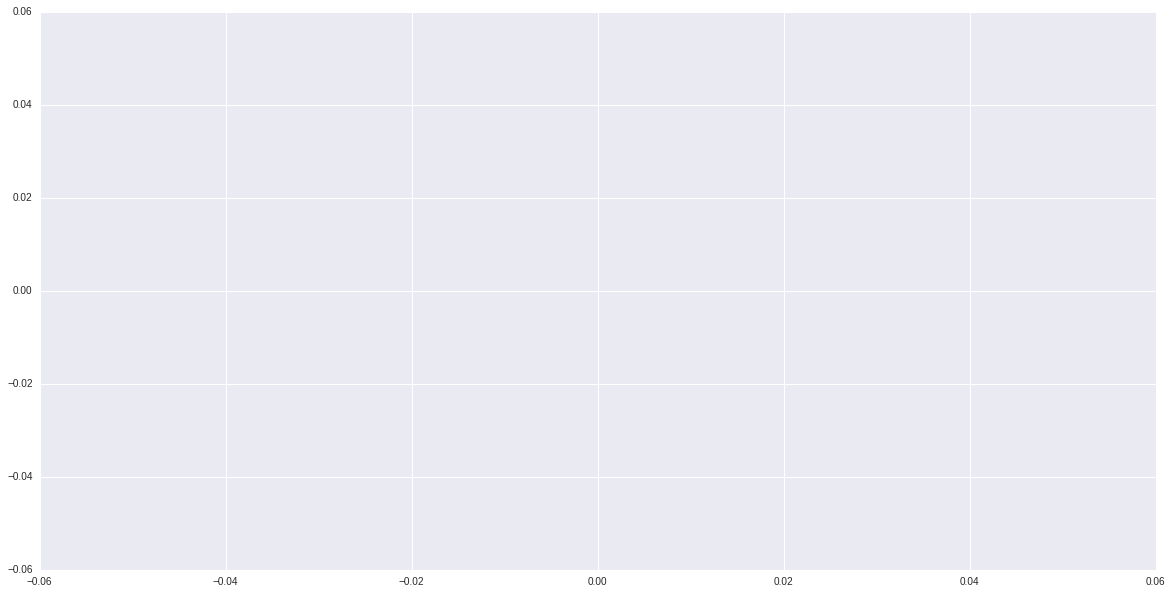

92


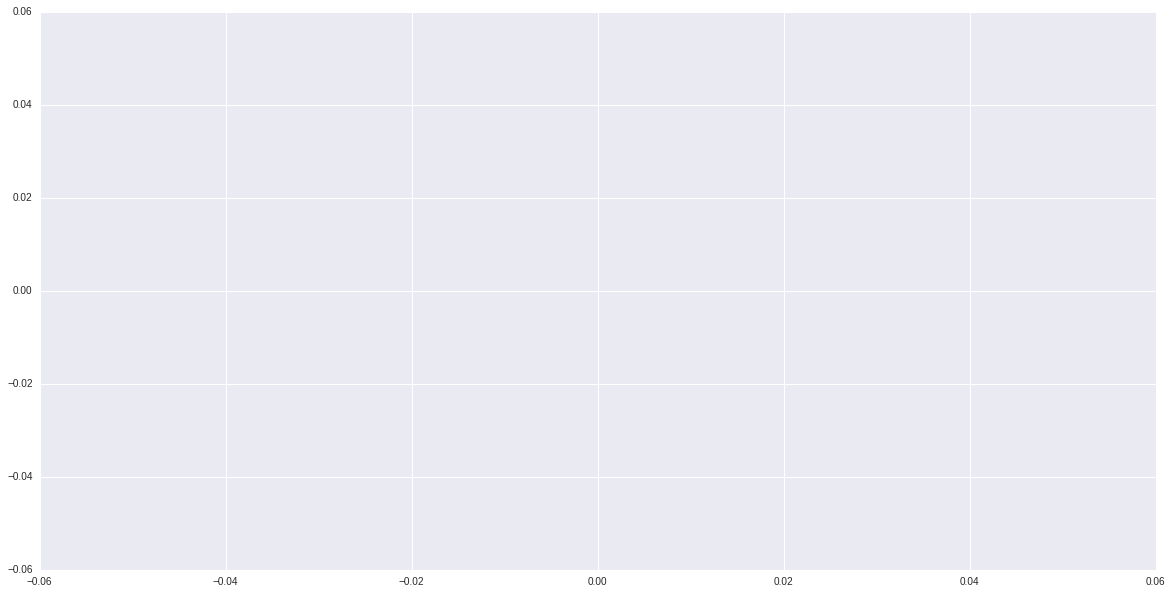

93


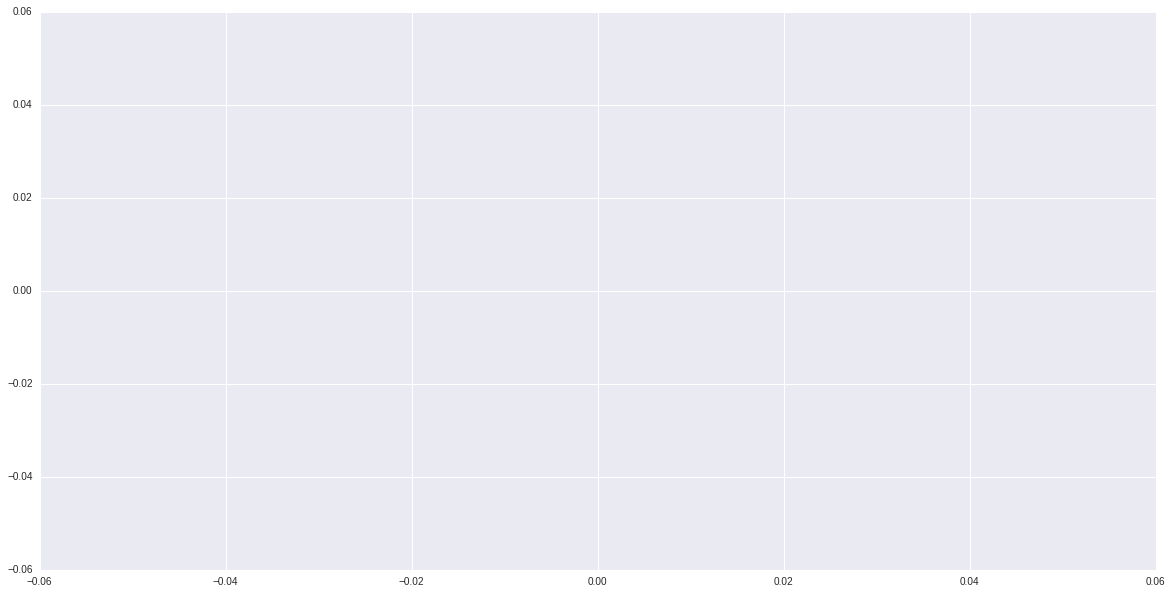

94


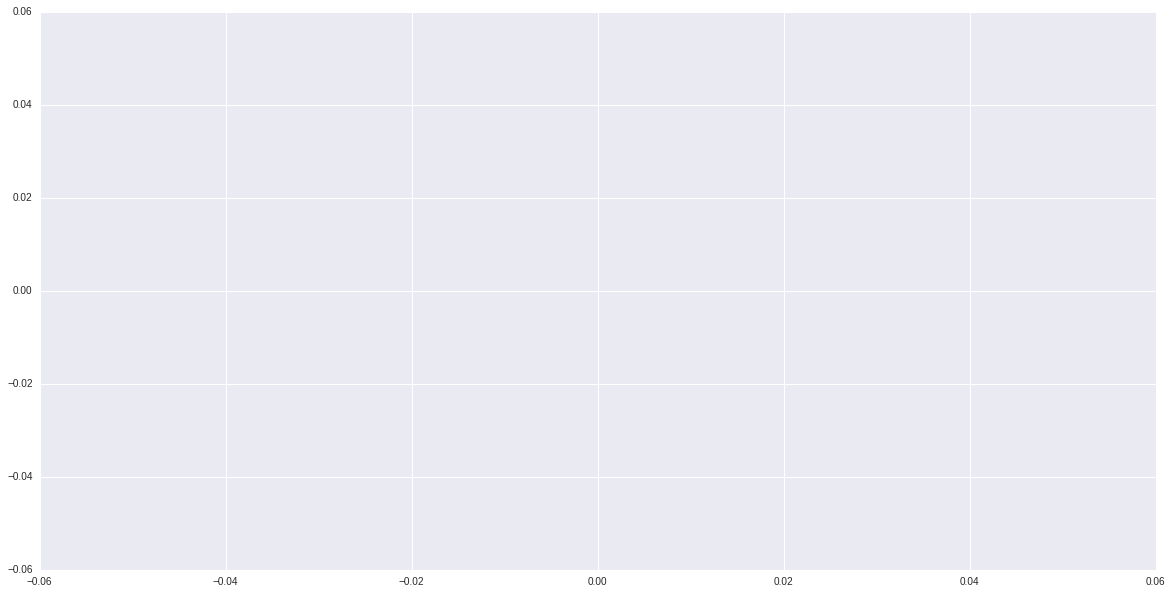

95


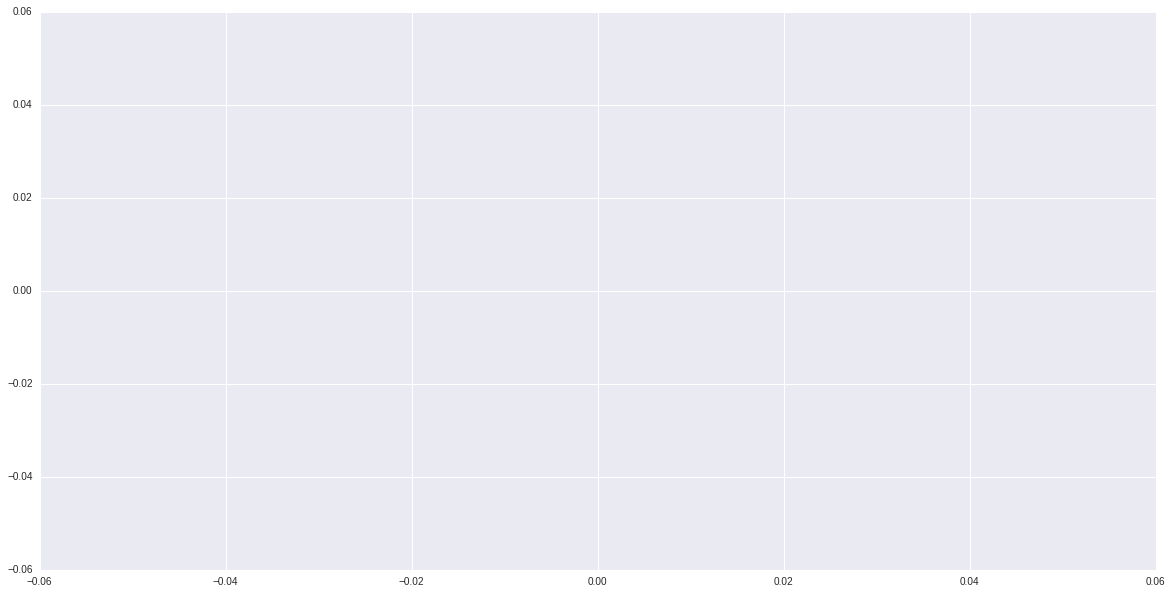

96


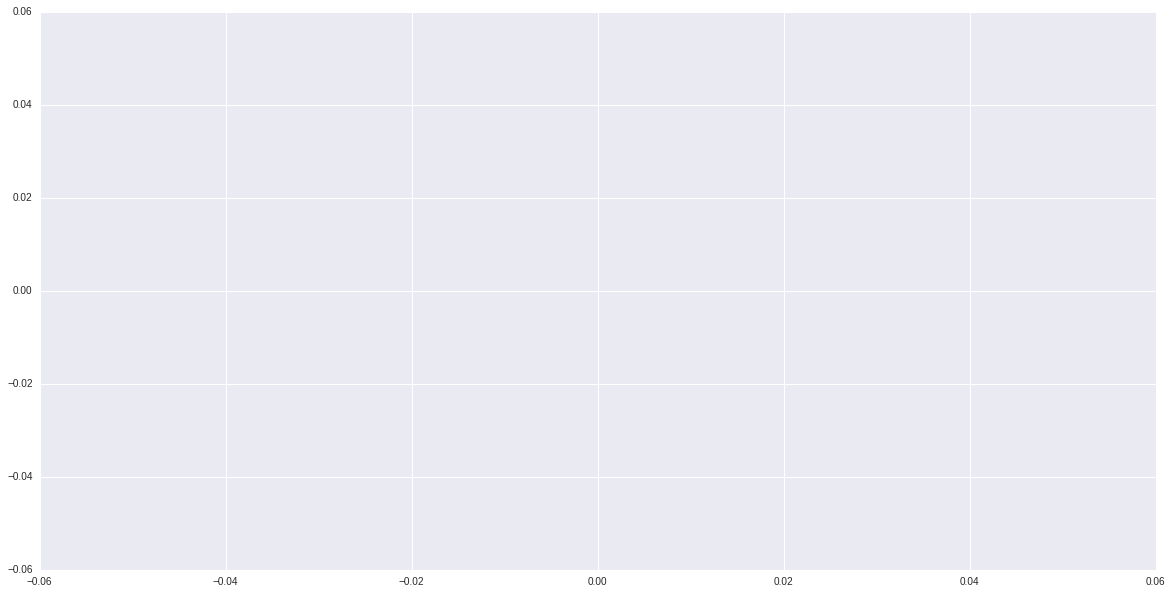

97


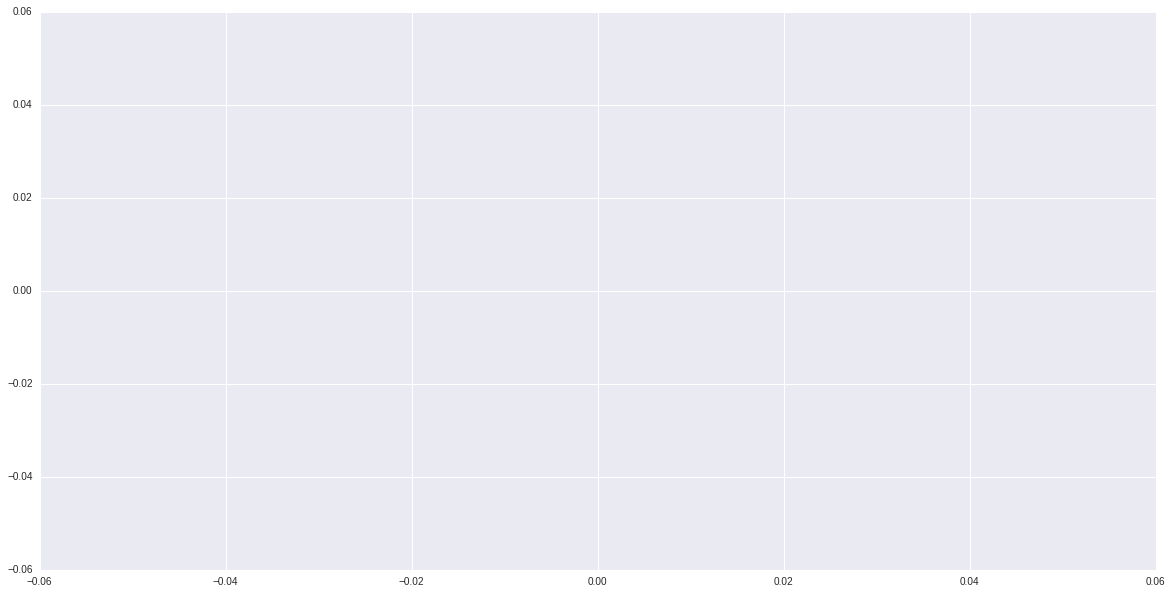

98


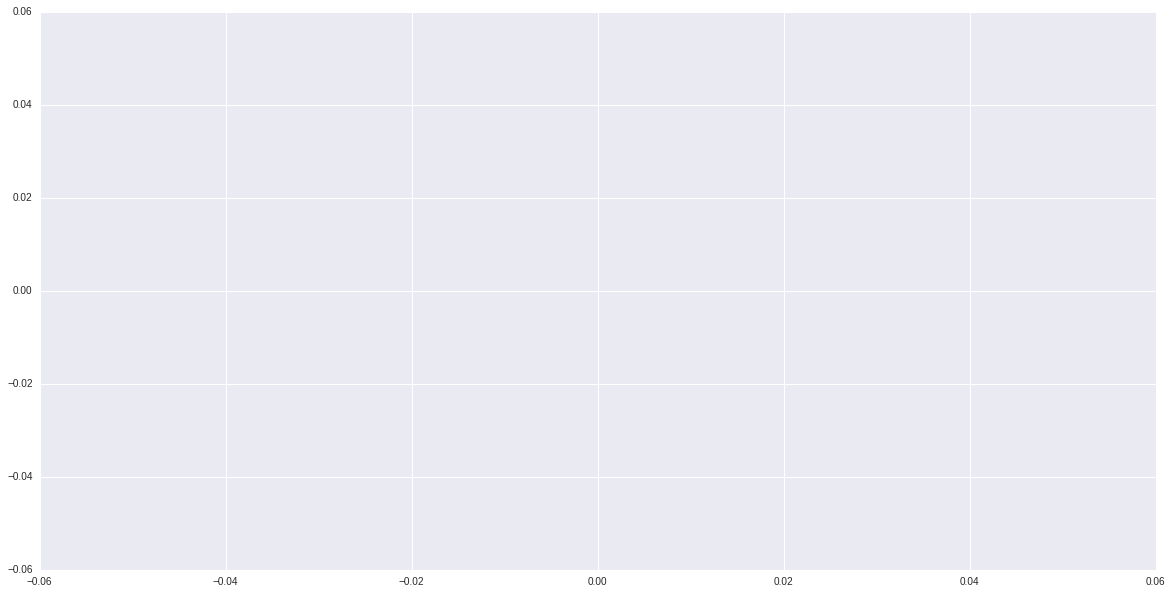

99


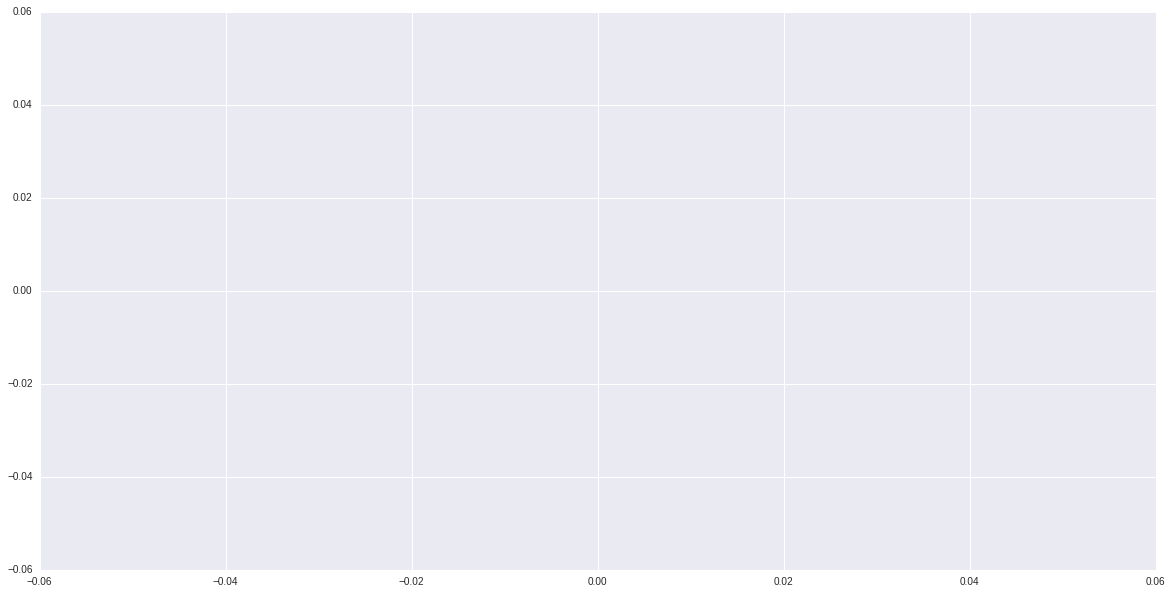

In [2102]:
draw_clust_pred(x_prep_validate, pred, y_prep_validate, 1.0, clusterer )
# draw_clust_pred(x_prep_train, pred, y_prep_train, 1.0, clusterer )

In [1266]:
def detect_outliers_and_drop(y_pred, y_true, threshold):
    res = np.logical_not((np.abs(y_pred - y_true)/y_true) > threshold)
#     print res.shape
    return np.where(res)[0]

In [1360]:
good_items = detect_outliers_and_drop(pred, y_prep_validate, 0.1)

In [1361]:
# x_train.iloc[outliers]

In [1362]:
len(good_items)

4108

In [1399]:
def get_cluster_good_items(x, y_pred, y_true, threshold, clust):
#     print 
    res = np.logical_not(np.logical_and((np.abs(y_pred - y_true)/y_true) > threshold, (x[:, 0] == clust).reshape(-1, 1)))
    return res

In [1400]:
def get_good_items(y_pred, y_true, threshold):
    res = np.logical_not((np.abs(y_pred - y_true)/y_true) > threshold)
    return res

In [1602]:
good31 = get_cluster_good_items(x_prep_validate, pred, y_prep_validate, 0.1, 31)

In [1603]:
# x_prep_validate.shape

In [1604]:
np.count_nonzero(good31)

4920

In [1605]:
# good31.shape

In [1606]:
good_items_loc = np.logical_and(good31, get_good_items(pred, y_prep_validate, 0.1))

In [1607]:
# good_items_loc.shape

In [1608]:
good_items = np.where(good_items_loc)[0]

In [1609]:
len(good_items)

3891

In [1706]:
cls.estimators[32].__dict__

{'_residues': 28596.078914606183,
 'coef_': array([ 99.40043927]),
 'copy_X': True,
 'fit_intercept': True,
 'intercept_': -4.3688681218503067,
 'n_jobs': 1,
 'normalize': False,
 'rank_': 1,
 'singular_': array([ 1.25238962])}

In [1729]:
# pred[tmp]

In [1730]:
# y_prep_train[tmp]

In [1738]:
good_items = np.where(np.logical_not(np.logical_and(y_prep_train > 100.0, (x_prep_train[:, 0] == 32).reshape(-1, 1)))) [0]

In [1789]:
# items_to_drop_clust = {}

In [1797]:
def add_bad_list(clust, thr):
    items_to_drop_clust[clust] = np.where((np.logical_and(y_prep_validate > thr, (x_prep_validate[:, 0] == clust).reshape(-1, 1))))[0]

In [2028]:
add_bad_list(1, 21.0)

In [2029]:
items_to_drop_clust

{1: array([268]),
 3: array([460, 463, 465, 466]),
 8: array([1271, 1272, 1273]),
 17: array([1799, 1803, 1804, 1805, 1806]),
 31: array([3014, 3015, 3017, 3021, 3025, 3028, 3032, 3033, 3034]),
 32: array([3457, 3504]),
 35: array([3905]),
 36: array([3936, 3944]),
 37: array([3977, 3986, 3987, 3988, 3989]),
 38: array([4109, 4110, 4111, 4112, 4113]),
 39: array([4255]),
 40: array([4487, 4488, 4489, 4490]),
 43: array([4981, 4987, 4988, 4990, 4991, 4992]),
 49: array([944]),
 52: array([1167, 1168, 1169, 1170, 1172]),
 54: array([1859, 1860, 1862, 1867]),
 56: array([2247, 2248, 2250, 2251]),
 57: array([2330]),
 59: array([2812, 2832, 2833]),
 61: array([3106, 3109, 3110, 3111, 3112, 3113, 3114]),
 64: array([3306, 3310, 3312]),
 73: array([4916, 4920, 4926, 4927]),
 74: array([  15,   16,   18,   19,   20,   21,   22,   23, 4504, 4505]),
 75: array([], dtype=int64),
 78: array([826, 829, 831, 832]),
 85: array([4130, 4131, 4132]),
 88: array([4378, 4379]),
 90: array([4671, 4676, 46

In [2034]:
def get_good_items():
    return x_train.index.drop(np.concatenate(items_to_drop_clust.values()))

In [2035]:
good_items = get_good_items()

In [2104]:
# import pickle

In [2105]:
# pickle.dump(items_to_drop_clust, open("items_to_drop_clust.pickle", "w"))

In [2114]:
manual_items[33] = \
[
    3530, 3531, 3524, 3541, 3548
]

[1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564]